In [1]:
# Sample API
import flowx

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = -0.5, 0.5
ymin, ymax = -0.5, 0.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf', 'ibmx', 'ibmy', 'delp']
face_vars     = ['velc', 'hvar']
ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']
imbound_vars  = ['ibmf', 'velc', 'ibmx', 'ibmy']

scalar_info   = dict(tmax = 5, dt = 0.001, Re = 100.0, Re_s = 10.0, mu_s = 1.0)

simulation_info = dict(with_ib = True, ib_type = 'visco', extrap_solid = 10, mappin_type='shapely')

particle_info = [dict(input='HDF5', file='sm_body.00001.h5')]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'],
                      ibmf = ['projection', 'projection', 'projection', 'projection'],
                      ibmx = ['projection', 'projection', 'projection', 'projection'],
                      ibmy = ['projection', 'projection', 'projection', 'projection'])

bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 1.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.domain.Domain(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson.Poisson(gridc, poisson_vars, poisson_info=simulation_info)

imbound = flowx.imbound.ImBound(domain_data_struct, imbound_vars, imbound_info=simulation_info)

ins = flowx.ins.IncompNS(poisson, imbound, domain_data_struct, ins_vars, ins_info=simulation_info)

In [3]:
imbound.map_to_grid()

Level Set Advection Time:  2.0458896160125732
------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5484237111057293e-11
Total poisson time : 0.0003914833068847656
Total INS time : 1.0430166721343994
Max, Min, U   : 2.0, -0.009552906204103992
Max, Min, V   : 0.02396714772440395, -0.02396714772440395
Max, Min, P   : 2.6819901736370393, -2.782122858835436
Max, Min, DIV : 2.5118795932144167e-15, -2.671474153004283e-15
Qin, Qout     : 0.0, 0.0




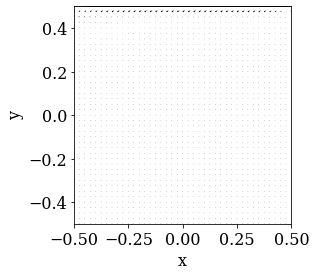

Level Set Advection Time:  0.0044820308685302734
------------ Time = 0.001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.50800142961916e-12
Total poisson time : 0.0003314018249511719
Total INS time : 0.0036368370056152344
Max, Min, U   : 2.0, -0.014553364608420166
Max, Min, V   : 0.03765620283884879, -0.03765620283884879
Max, Min, P   : 1.7148901689036353, -1.7771068856858054
Max, Min, DIV : 8.881784197001252e-16, -1.0581813203458523e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004455089569091797
------------ Time = 0.002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7604926278513186e-13
Total poisson time : 0.000240325927734375
Total INS time : 0.0035331249237060547
Max, Min, U   : 2.0, -0.019239892835103647
Max, Min, V   : 0.050827777922502426, -0.050827777922502426
Max, Min, P   : 1.6967947449513625, -1.7556063342814274
Max, Min, DIV : 4.996003610813204e-16, -3.0184188481996443e-16
Qin, Qout     :

Level Set Advection Time:  0.005259037017822266
------------ Time = 0.025000000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.147839906955824e-13
Total poisson time : 0.0002377033233642578
Total INS time : 0.0035173892974853516
Max, Min, U   : 2.0, -0.0759243816512295
Max, Min, V   : 0.21434124728488982, -0.21434124728488982
Max, Min, P   : 1.386562765510069, -1.232738258301327
Max, Min, DIV : 1.887379141862766e-15, -1.7763568394002505e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005452871322631836
------------ Time = 0.026000000000000016 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.656093037234111e-13
Total poisson time : 0.0003437995910644531
Total INS time : 0.00505828857421875
Max, Min, U   : 2.0, -0.07767446072288683
Max, Min, V   : 0.21792528250073834, -0.21792528250073834
Max, Min, P   : 1.3904136610233329, -1.208121365645482
Max, Min, DIV : 1.8257964584655895e-15, -1.980186847827525

Level Set Advection Time:  0.004892110824584961
------------ Time = 0.048000000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5192545803961146e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.003427267074584961
Max, Min, U   : 2.0, -0.10091596075446402
Max, Min, V   : 0.26724102661932486, -0.26724102661932486
Max, Min, P   : 1.2472980443791746, -1.0506434056150256
Max, Min, DIV : 3.3306690738754696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004393100738525391
------------ Time = 0.04900000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.748174051235234e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.003780364990234375
Max, Min, U   : 2.0, -0.10141343127692544
Max, Min, V   : 0.2685981758435207, -0.2685981758435207
Max, Min, P   : 1.2575336287566312, -1.0317001155550543
Max, Min, DIV : 3.608224830031759e-15, -3.608224830031759e

Level Set Advection Time:  0.004919767379760742
------------ Time = 0.07000000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.933264065087668e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.003447294235229492
Max, Min, U   : 2.0, -0.11658162261109149
Max, Min, V   : 0.28834605414657133, -0.28834605414657133
Max, Min, P   : 1.1651644031547173, -0.9938750916345801
Max, Min, DIV : 4.08006961549745e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043544769287109375
------------ Time = 0.07100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2076682771002265e-14
Total poisson time : 0.00024199485778808594
Total INS time : 0.004175901412963867
Max, Min, U   : 2.0, -0.1172467470158712
Max, Min, V   : 0.28898647899043217, -0.28898647899043217
Max, Min, P   : 1.1640149478880688, -0.9906682751068968
Max, Min, DIV : 2.8727020762175925e-15, -2.4424906541753

Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044019222259521484
------------ Time = 0.09400000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.558986206033165e-14
Total poisson time : 0.00023484230041503906
Total INS time : 0.004222869873046875
Max, Min, U   : 2.0, -0.1274246280441856
Max, Min, V   : 0.29955714414907875, -0.29955714414907875
Max, Min, P   : 1.207214710712165, -0.8736248236425393
Max, Min, DIV : 3.406996906818449e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004367828369140625
------------ Time = 0.09500000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.039280530251188e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0034215450286865234
Max, Min, U   : 2.0, -0.12767320739686536
Max, Min, V   : 0.2998829060887295, -0.2998829060887295
Max, Min, P   : 1.2273551568411938, -0.8511347643889907
Max, Min, DIV : 3.091277234190

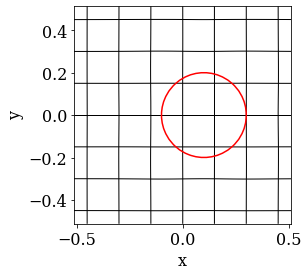

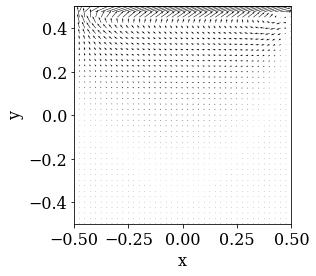

Level Set Advection Time:  0.00435638427734375
------------ Time = 0.10100000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.594577655891941e-13
Total poisson time : 0.00030875205993652344
Total INS time : 0.003530740737915039
Max, Min, U   : 2.0, -0.12888276206098692
Max, Min, V   : 0.30167430123049993, -0.30167430123049993
Max, Min, P   : 1.203578438961194, -0.8618849371275572
Max, Min, DIV : 3.885780586188048e-15, -3.3029134982598407e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005661964416503906
------------ Time = 0.10200000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.338199819419318e-13
Total poisson time : 0.00030422210693359375
Total INS time : 0.004500865936279297
Max, Min, U   : 2.0, -0.12903974483666136
Max, Min, V   : 0.30194793133397657, -0.30194793133397657
Max, Min, P   : 1.1939979235852647, -0.8694589338337809
Max, Min, DIV : 3.552713678800501e-15, -3.88578058618804

Level Set Advection Time:  0.005095005035400391
------------ Time = 0.1240000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.408784367587388e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.0036699771881103516
Max, Min, U   : 2.0, -0.13481816108564104
Max, Min, V   : 0.3066176266958659, -0.31885100956287854
Max, Min, P   : 1.164199036532144, -0.8642038768917724
Max, Min, DIV : 3.2057689836051395e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004361391067504883
------------ Time = 0.12500000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.847076755784854e-13
Total poisson time : 0.0002384185791015625
Total INS time : 0.0034873485565185547
Max, Min, U   : 2.0, -0.13517597728831665
Max, Min, V   : 0.3067814673954119, -0.31958588445618763
Max, Min, P   : 1.1506658256964082, -0.876476608404672
Max, Min, DIV : 3.552713678800501e-15, -4.038436252074007e

Level Set Advection Time:  0.0055119991302490234
------------ Time = 0.1470000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3082701227726814e-14
Total poisson time : 0.00025844573974609375
Total INS time : 0.00339508056640625
Max, Min, U   : 2.0, -0.14105104096540869
Max, Min, V   : 0.30968434821693697, -0.3335111688147791
Max, Min, P   : 1.1393478413990605, -0.8650929602133492
Max, Min, DIV : 3.6637359812630166e-15, -3.1086244689504383e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004723310470581055
------------ Time = 0.1480000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.625287860869253e-13
Total poisson time : 0.00031375885009765625
Total INS time : 0.0034983158111572266
Max, Min, U   : 2.0, -0.1412345429515438
Max, Min, V   : 0.3097903530696167, -0.33405586392121545
Max, Min, P   : 1.1516295023648058, -0.8519698631183877
Max, Min, DIV : 4.163336342344337e-15, -3.55271367880050

Level Set Advection Time:  0.00488591194152832
------------ Time = 0.17000000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1381526188159526e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003408670425415039
Max, Min, U   : 2.0, -0.14372269219946604
Max, Min, V   : 0.31172577072563235, -0.3451150371261197
Max, Min, P   : 1.0444245713556253, -0.9437099041387895
Max, Min, DIV : 3.3306690738754696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004662513732910156
------------ Time = 0.17100000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.235078293479298e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0034241676330566406
Max, Min, U   : 2.0, -0.14377200863754594
Max, Min, V   : 0.3117986898245137, -0.3457887175580797
Max, Min, P   : 1.0648863245200049, -0.9226639364335181
Max, Min, DIV : 3.344546861683284e-15, -3.982925100842749

Level Set Advection Time:  0.004366397857666016
------------ Time = 0.19400000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.631554536398296e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.004915952682495117
Max, Min, U   : 2.0, -0.14747405935315294
Max, Min, V   : 0.31581244852121826, -0.35980686199787804
Max, Min, P   : 0.9472437848871026, -1.0290210182178539
Max, Min, DIV : 3.5709282752982574e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004366636276245117
------------ Time = 0.19500000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.350973339869177e-14
Total poisson time : 0.00023484230041503906
Total INS time : 0.003771543502807617
Max, Min, U   : 2.0, -0.14768598230453964
Max, Min, V   : 0.3159999907093671, -0.36035810890154846
Max, Min, P   : 0.9456093172966198, -1.0302459699033677
Max, Min, DIV : 2.8171909249863347e-15, -3.885780586188

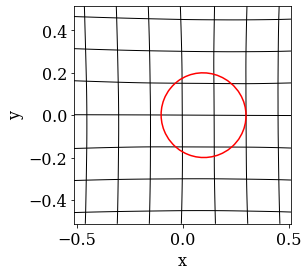

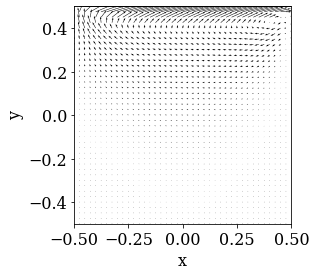

Level Set Advection Time:  0.004518032073974609
------------ Time = 0.20100000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3701857649679385e-13
Total poisson time : 0.00031280517578125
Total INS time : 0.003530740737915039
Max, Min, U   : 2.0, -0.14887266884848424
Max, Min, V   : 0.3170864663157212, -0.3635748527361017
Max, Min, P   : 0.9401725065907853, -1.033346276992139
Max, Min, DIV : 2.8302013510561608e-15, -3.8719027983802334e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004384279251098633
------------ Time = 0.20200000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.240971062093659e-14
Total poisson time : 0.0003192424774169922
Total INS time : 0.0034623146057128906
Max, Min, U   : 2.0, -0.14905655991034064
Max, Min, V   : 0.31726132818292047, -0.3640962970975627
Max, Min, P   : 0.9414051651841647, -1.0317433251968424
Max, Min, DIV : 3.552713678800501e-15, -3.941291737419306e-

Number of poisson iterations    : None
Final poisson residual : 2.356138640244864e-14
Total poisson time : 0.00023055076599121094
Total INS time : 0.003330707550048828
Max, Min, U   : 2.0, -0.15216443671312135
Max, Min, V   : 0.3207150350645128, -0.37461181154567286
Max, Min, P   : 0.8823618221768044, -1.0838411701267254
Max, Min, DIV : 4.232725281383409e-15, -4.017619570362285e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004399299621582031
------------ Time = 0.22500000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.961305890672527e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003335237503051758
Max, Min, U   : 2.0, -0.15226556761776744
Max, Min, V   : 0.3208559912019903, -0.3750498818137121
Max, Min, P   : 0.8956465080770363, -1.0702893027712364
Max, Min, DIV : 4.0245584642661925e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044057369232177734
------------ Time = 0.2

Level Set Advection Time:  0.004312992095947266
------------ Time = 0.2480000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.187676332951895e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.004117727279663086
Max, Min, U   : 2.0, -0.15374012816936627
Max, Min, V   : 0.3237826411520404, -0.3843078654238145
Max, Min, P   : 0.8266933385048445, -1.1340367040177648
Max, Min, DIV : 3.1086244689504383e-15, -3.858025010572419e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042989253997802734
------------ Time = 0.2490000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.072436336518062e-13
Total poisson time : 0.00023698806762695312
Total INS time : 0.0034329891204833984
Max, Min, U   : 2.0, -0.15376976564574238
Max, Min, V   : 0.32389751721065746, -0.3846776701715158
Max, Min, P   : 0.840919458589998, -1.11962072882454
Max, Min, DIV : 4.107825191113079e-15, -4.052314039881821e-15

Level Set Advection Time:  0.0043163299560546875
------------ Time = 0.2720000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.101223062111872e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0038106441497802734
Max, Min, U   : 2.0, -0.15679762558359353
Max, Min, V   : 0.32630321312832633, -0.39253618111772204
Max, Min, P   : 0.8013962633713602, -1.1554633482722554
Max, Min, DIV : 3.622102617839573e-15, -4.1043557441611256e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043103694915771484
------------ Time = 0.2730000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.061973437358198e-13
Total poisson time : 0.0002391338348388672
Total INS time : 0.0033922195434570312
Max, Min, U   : 2.0, -0.15697366989527556
Max, Min, V   : 0.32639844893229997, -0.3928518243645672
Max, Min, P   : 0.7934988166427541, -1.1632276791548655
Max, Min, DIV : 4.3576253716537394e-15, -4.260480856999

Level Set Advection Time:  0.004369258880615234
------------ Time = 0.2960000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6856104292158923e-13
Total poisson time : 0.0002567768096923828
Total INS time : 0.004183530807495117
Max, Min, U   : 2.0, -0.1604245275165983
Max, Min, V   : 0.3284071001655764, -0.39959171803059484
Max, Min, P   : 0.8538419619114516, -1.100332103492571
Max, Min, DIV : 3.816391647148976e-15, -3.573530360512223e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0068323612213134766
------------ Time = 0.2970000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6655257225123347e-13
Total poisson time : 0.000423431396484375
Total INS time : 0.006738185882568359
Max, Min, U   : 2.0, -0.1605496745873055
Max, Min, V   : 0.3284871841935351, -0.3998637391225314
Max, Min, P   : 0.8613541599203302, -1.0927292559146085
Max, Min, DIV : 3.83026943495679e-15, -4.218847493575595e-15
Qi

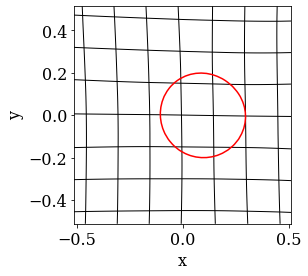

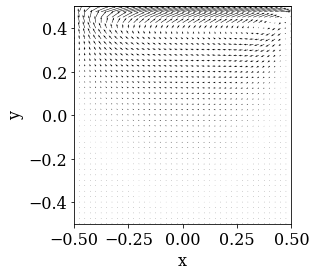

Level Set Advection Time:  0.004424333572387695
------------ Time = 0.3010000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1268764664925944e-13
Total poisson time : 0.00031566619873046875
Total INS time : 0.003952741622924805
Max, Min, U   : 2.0, -0.16103057083337993
Max, Min, V   : 0.3288020300987049, -0.4009356684150881
Max, Min, P   : 0.8582474618177145, -1.095488483640443
Max, Min, DIV : 3.941291737419306e-15, -3.2404634531246757e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004376411437988281
------------ Time = 0.3020000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.151716978113988e-13
Total poisson time : 0.0002448558807373047
Total INS time : 0.004132509231567383
Max, Min, U   : 2.0, -0.16114592831302027
Max, Min, V   : 0.32887939578734593, -0.4011996791229678
Max, Min, P   : 0.8338381351309792, -1.119814649371852
Max, Min, DIV : 3.9968028886505635e-15, -3.903127820947816e-1

Level Set Advection Time:  0.005034446716308594
------------ Time = 0.32400000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.643948195311322e-13
Total poisson time : 0.00030684471130371094
Total INS time : 0.0036284923553466797
Max, Min, U   : 2.0, -0.16321653410566864
Max, Min, V   : 0.33045661458116987, -0.4066347585274491
Max, Min, P   : 0.8079051501979406, -1.1442537697608735
Max, Min, DIV : 3.774758283725532e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004366636276245117
------------ Time = 0.32500000000000023 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.093309567610106e-14
Total poisson time : 0.0002906322479248047
Total INS time : 0.003746509552001953
Max, Min, U   : 2.0, -0.16329044562801942
Max, Min, V   : 0.3305230377184754, -0.4068658995165939
Max, Min, P   : 0.806119647936155, -1.1459858189095864
Max, Min, DIV : 3.774758283725532e-15, -3.885780586188048e-1

Total poisson time : 0.00024175643920898438
Total INS time : 0.0034346580505371094
Max, Min, U   : 2.0, -0.1644729606378473
Max, Min, V   : 0.33182528795335237, -0.4114350782856473
Max, Min, P   : 0.8020280274955099, -1.149198235293005
Max, Min, DIV : 3.3029134982598407e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004441499710083008
------------ Time = 0.34700000000000025 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.386648919458343e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.0038650035858154297
Max, Min, U   : 2.0, -0.16451254481397076
Max, Min, V   : 0.33188317670325623, -0.4116398697009076
Max, Min, P   : 0.8168524651357196, -1.134342791903316
Max, Min, DIV : 3.5388358909926865e-15, -3.497202527569243e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044171810150146484
------------ Time = 0.34800000000000025 ---------------
Number of poisson iterations    : None
Final poisson 

Level Set Advection Time:  0.005011558532714844
------------ Time = 0.36900000000000027 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.117567715440811e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0033457279205322266
Max, Min, U   : 2.0, -0.166816668991453
Max, Min, V   : 0.3330730452324898, -0.41588158208368214
Max, Min, P   : 0.8267337765132343, -1.1239906448087718
Max, Min, DIV : 3.9968028886505635e-15, -3.622102617839573e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004437685012817383
------------ Time = 0.3700000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0612107887829986e-13
Total poisson time : 0.00023651123046875
Total INS time : 0.0034322738647460938
Max, Min, U   : 2.0, -0.1669409982124785
Max, Min, V   : 0.3331235639586044, -0.4160630678500615
Max, Min, P   : 0.8215926374806022, -1.1291195671927796
Max, Min, DIV : 4.191091917959966e-15, -3.649858193455202e-15


Level Set Advection Time:  0.004942893981933594
------------ Time = 0.3920000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.301987879773096e-12
Total poisson time : 0.0002288818359375
Total INS time : 0.003461599349975586
Max, Min, U   : 2.0, -0.16933509675998126
Max, Min, V   : 0.33416545859732366, -0.41983180459883573
Max, Min, P   : 0.9084262203966901, -1.042194846128422
Max, Min, DIV : 3.615163723935666e-15, -3.712308238590367e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00439906120300293
------------ Time = 0.3930000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.357466501402255e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0035409927368164062
Max, Min, U   : 2.0, -0.1694288991030717
Max, Min, V   : 0.33420985164570516, -0.41999348246180346
Max, Min, P   : 0.917586749200759, -1.03303701203715
Max, Min, DIV : 3.608224830031759e-15, -3.969047313034935e-15
Qin,

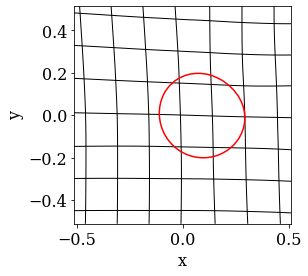

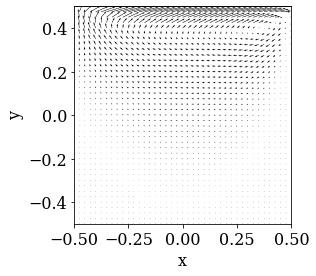

Level Set Advection Time:  0.00452113151550293
------------ Time = 0.4010000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5826874353541105e-13
Total poisson time : 0.00031948089599609375
Total INS time : 0.003677845001220703
Max, Min, U   : 2.0, -0.1701343086270256
Max, Min, V   : 0.3345564275257663, -0.42125883139588743
Max, Min, P   : 0.8606979135413662, -1.0899677642539198
Max, Min, DIV : 4.0245584642661925e-15, -3.3003114130458755e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00439143180847168
------------ Time = 0.4020000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.855281388267546e-13
Total poisson time : 0.00026535987854003906
Total INS time : 0.003844022750854492
Max, Min, U   : 2.0, -0.17021694135461649
Max, Min, V   : 0.3345987047775677, -0.4214135678983217
Max, Min, P   : 0.8334861648839144, -1.1171872185384897
Max, Min, DIV : 3.927413949611491e-15, -4.107825191113079e-1

Level Set Advection Time:  0.005138874053955078
------------ Time = 0.4240000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3935017429412836e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.003517627716064453
Max, Min, U   : 2.0, -0.1717374580753048
Max, Min, V   : 0.3354743347310008, -0.42463738656542394
Max, Min, P   : 0.8832759764063446, -1.0676901921972575
Max, Min, DIV : 3.70536934468646e-15, -4.100886297209172e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044023990631103516
------------ Time = 0.4250000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.883453800975693e-13
Total poisson time : 0.0002346038818359375
Total INS time : 0.0033712387084960938
Max, Min, U   : 2.0, -0.1717935591032325
Max, Min, V   : 0.335511796511249, -0.42477613402715353
Max, Min, P   : 0.8756382484564018, -1.0753428392015338
Max, Min, DIV : 3.552713678800501e-15, -3.1502578323738817e-15

Level Set Advection Time:  0.005008220672607422
------------ Time = 0.44700000000000034 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0662800216029547e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0033888816833496094
Max, Min, U   : 2.0, -0.1727628608313531
Max, Min, V   : 0.3362897097197017, -0.4276727885191741
Max, Min, P   : 0.8531421911730119, -1.0983408619139132
Max, Min, DIV : 3.677613769070831e-15, -3.913536161803677e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004366636276245117
------------ Time = 0.44800000000000034 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.227559357560644e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.0034530162811279297
Max, Min, U   : 2.0, -0.1727953141256757
Max, Min, V   : 0.3363230781232333, -0.4277977122799332
Max, Min, P   : 0.8776624072504566, -1.0738482740736823
Max, Min, DIV : 4.08006961549745e-15, -4.135580766728708e-15

Level Set Advection Time:  0.004999637603759766
------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0409523580591555e-13
Total poisson time : 0.0002353191375732422
Total INS time : 0.003772258758544922
Max, Min, U   : 2.0, -0.17386564320671258
Max, Min, V   : 0.3370176723659776, -0.4304107510420766
Max, Min, P   : 0.8214205481537767, -1.130764443636787
Max, Min, DIV : 4.277828091758806e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004677534103393555
------------ Time = 0.47100000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.204229190642761e-14
Total poisson time : 0.00024390220642089844
Total INS time : 0.0033881664276123047
Max, Min, U   : 2.0, -0.17396392774190717
Max, Min, V   : 0.33704754388471964, -0.4305236686364499
Max, Min, P   : 0.8235005225157684, -1.128719246847214
Max, Min, DIV : 3.969047313034935e-15, -3.920475055707584e

Level Set Advection Time:  0.005021095275878906
------------ Time = 0.4930000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.42633330587717e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.003391265869140625
Max, Min, U   : 2.0, -0.17589481595128703
Max, Min, V   : 0.3376705229903332, -0.4328894408337494
Max, Min, P   : 0.8834225217026617, -1.0696293734633124
Max, Min, DIV : 4.0592529337857286e-15, -3.4746511223815446e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004428386688232422
------------ Time = 0.4940000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.440611900007555e-13
Total poisson time : 0.00027942657470703125
Total INS time : 0.003664731979370117
Max, Min, U   : 2.0, -0.17597233865329978
Max, Min, V   : 0.3376973619994093, -0.43299183216606796
Max, Min, P   : 0.898337364236886, -1.0547551848657422
Max, Min, DIV : 4.014150123410332e-15, -4.232725281383409e-15

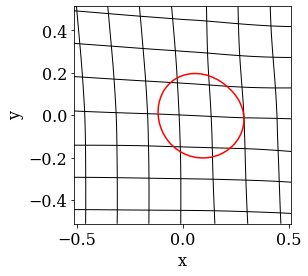

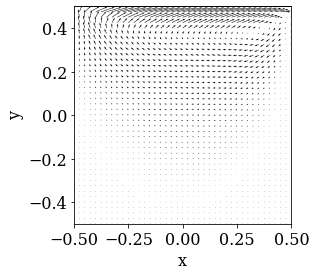

Level Set Advection Time:  0.004549503326416016
------------ Time = 0.5010000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3390410765895726e-14
Total poisson time : 0.0003116130828857422
Total INS time : 0.0035254955291748047
Max, Min, U   : 2.0, -0.17649088747411865
Max, Min, V   : 0.33788185308217766, -0.43369673429029293
Max, Min, P   : 0.9507768944334704, -1.0026065076826338
Max, Min, DIV : 3.58046925441613e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00446629524230957
------------ Time = 0.5020000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.03683772985413e-13
Total poisson time : 0.00025153160095214844
Total INS time : 0.0039937496185302734
Max, Min, U   : 2.0, -0.17656155751487784
Max, Min, V   : 0.3379077345468326, -0.4337957713842058
Max, Min, P   : 0.937011680773987, -1.0164141436492484
Max, Min, DIV : 4.218847493575595e-15, -4.107825191113079e-1

Level Set Advection Time:  0.005020856857299805
------------ Time = 0.5240000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.131486108495449e-13
Total poisson time : 0.00024700164794921875
Total INS time : 0.0034983158111572266
Max, Min, U   : 2.0, -0.17790822214046748
Max, Min, V   : 0.3384488535442844, -0.435874941268536
Max, Min, P   : 0.7304408694958616, -1.2239717379493025
Max, Min, DIV : 4.08006961549745e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004380226135253906
------------ Time = 0.5250000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.297414779226695e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.003362894058227539
Max, Min, U   : 2.0, -0.17796025375798566
Max, Min, V   : 0.3384722248319204, -0.43596511220315004
Max, Min, P   : 0.7085076761951776, -1.2459520076928858
Max, Min, DIV : 4.0245584642661925e-15, -3.552713678800501e-15

Level Set Advection Time:  0.004495143890380859
------------ Time = 0.5470000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1157455291959637e-13
Total poisson time : 0.00027441978454589844
Total INS time : 0.004217624664306641
Max, Min, U   : 2.0, -0.17891506461833542
Max, Min, V   : 0.3389617494024395, -0.4378608878551117
Max, Min, P   : 0.6348247439864615, -1.3207129658806722
Max, Min, DIV : 3.95516952522712e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004754781723022461
------------ Time = 0.5480000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.777253491930534e-14
Total poisson time : 0.0002810955047607422
Total INS time : 0.0034029483795166016
Max, Min, U   : 2.0, -0.1789500958270615
Max, Min, V   : 0.3389829233000346, -0.4379432120380564
Max, Min, P   : 0.6324626712082508, -1.3231257882588539
Max, Min, DIV : 2.7755575615628914e-15, -3.982925100842749e-15

Level Set Advection Time:  0.0049664974212646484
------------ Time = 0.5700000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4176286630193077e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0033740997314453125
Max, Min, U   : 2.0, -0.1795470667862285
Max, Min, V   : 0.3394270476080126, -0.439676081899109
Max, Min, P   : 0.5623792500691681, -1.3943572347109534
Max, Min, DIV : 4.440892098500626e-15, -4.0054765060304476e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004383563995361328
------------ Time = 0.5710000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.017815260106537e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0033702850341796875
Max, Min, U   : 2.0, -0.17956656982175884
Max, Min, V   : 0.339446290859823, -0.4397514320064173
Max, Min, P   : 0.582524242182787, -1.3742658321996946
Max, Min, DIV : 3.552713678800501e-15, -3.0253577421035516e-1

Level Set Advection Time:  0.004991292953491211
------------ Time = 0.5930000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.953475493657079e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003358602523803711
Max, Min, U   : 2.0, -0.1798401107308156
Max, Min, V   : 0.3398504504078291, -0.44133929926300947
Max, Min, P   : 0.4746657000077159, -1.4833001527079264
Max, Min, DIV : 4.218847493575595e-15, -4.15639744844043e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372596740722656
------------ Time = 0.5940000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.324393091632957e-13
Total poisson time : 0.00023651123046875
Total INS time : 0.0034885406494140625
Max, Min, U   : 2.0, -0.17984566329749074
Max, Min, V   : 0.3398679891231239, -0.4414084291052931
Max, Min, P   : 0.46036819246251165, -1.4976533005560722
Max, Min, DIV : 3.462508058049707e-15, -3.733124920302089e-15
Q

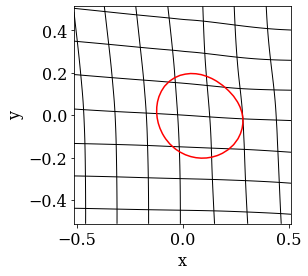

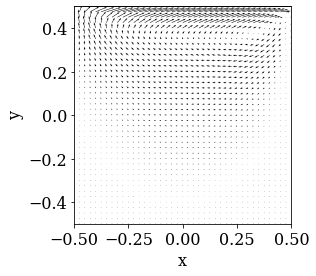

Level Set Advection Time:  0.0044596195220947266
------------ Time = 0.6010000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.2856388010418e-13
Total poisson time : 0.0003085136413574219
Total INS time : 0.0035245418548583984
Max, Min, U   : 2.0, -0.18021260309878226
Max, Min, V   : 0.33998883308328504, -0.4418852681953946
Max, Min, P   : 0.37587919591702373, -1.5825317441605165
Max, Min, DIV : 4.163336342344337e-15, -3.2725558374302466e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004444122314453125
------------ Time = 0.6020000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4913111610687187e-13
Total poisson time : 0.0002486705780029297
Total INS time : 0.004151821136474609
Max, Min, U   : 2.0, -0.18027766924450583
Max, Min, V   : 0.3400058250346752, -0.441952391847921
Max, Min, P   : 0.366572601253888, -1.5918950567780379
Max, Min, DIV : 3.9968028886505635e-15, -3.802513859341161e-1

Level Set Advection Time:  0.005007743835449219
------------ Time = 0.6240000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9720310335438344e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0033690929412841797
Max, Min, U   : 2.0, -0.18155828046392905
Max, Min, V   : 0.3403635065705827, -0.4433693018613027
Max, Min, P   : 0.1684065627400527, -1.7913153449518784
Max, Min, DIV : 3.3029134982598407e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004412412643432617
------------ Time = 0.6250000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.47867786204593e-14
Total poisson time : 0.00023627281188964844
Total INS time : 0.003496885299682617
Max, Min, U   : 2.0, -0.18160976605085352
Max, Min, V   : 0.3403790569385057, -0.44343108506615675
Max, Min, P   : 0.16616820973664104, -1.79361173855677
Max, Min, DIV : 4.11823353196894e-15, -3.864963904476326e-15

Level Set Advection Time:  0.005136966705322266
------------ Time = 0.6470000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.565914481416249e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.0037622451782226562
Max, Min, U   : 2.0, -0.1826000188011281
Max, Min, V   : 0.34070662049969735, -0.44473632900209087
Max, Min, P   : 0.10651422114961537, -1.8545561205504504
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004393577575683594
------------ Time = 0.6480000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.568845834605962e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.003509521484375
Max, Min, U   : 2.0, -0.18263871942826218
Max, Min, V   : 0.34072087442451, -0.44479329204422
Max, Min, P   : 0.10246226538194923, -1.8586673178753959
Max, Min, DIV : 4.107825191113079e-15, -3.747002708109903e-15
Qi

Level Set Advection Time:  0.005055427551269531
------------ Time = 0.6700000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.8907322697976566e-14
Total poisson time : 0.000240325927734375
Total INS time : 0.0033376216888427734
Max, Min, U   : 2.0, -0.18335825128644112
Max, Min, V   : 0.34102147914550035, -0.44599783125184767
Max, Min, P   : 0.03753107973751695, -1.924902650358444
Max, Min, DIV : 3.3931191190106347e-15, -3.642919299551295e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004395246505737305
------------ Time = 0.6710000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1396778525170692e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003348112106323242
Max, Min, U   : 2.0, -0.18338519230619604
Max, Min, V   : 0.3410345745277237, -0.4460504480187379
Max, Min, P   : 0.04073488219480742, -1.9217590084221923
Max, Min, DIV : 3.774758283725532e-15, -4.21884749357559

Level Set Advection Time:  0.005016326904296875
------------ Time = 0.6930000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.733059872395536e-14
Total poisson time : 0.00022745132446289062
Total INS time : 0.0040743350982666016
Max, Min, U   : 2.0, -0.18385494279108527
Max, Min, V   : 0.34131117388137355, -0.44716429008438335
Max, Min, P   : -0.10296025066474834, -2.06676754815409
Max, Min, DIV : 3.552713678800501e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004292726516723633
------------ Time = 0.6940000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2368752371849345e-14
Total poisson time : 0.00022912025451660156
Total INS time : 0.0032966136932373047
Max, Min, U   : 2.0, -0.18387084509474644
Max, Min, V   : 0.34132324243070483, -0.44721300027467353
Max, Min, P   : -0.10255512686652056, -2.0664232178133424
Max, Min, DIV : 3.885780586188048e-15, -3.5527136788

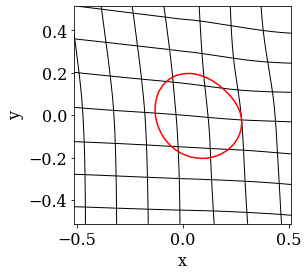

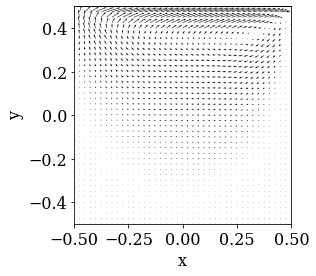

Level Set Advection Time:  0.00455784797668457
------------ Time = 0.7010000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0003289462488371e-12
Total poisson time : 0.0003094673156738281
Total INS time : 0.0035796165466308594
Max, Min, U   : 2.0, -0.18397003789727656
Max, Min, V   : 0.34140651788903076, -0.4475494470684341
Max, Min, P   : -0.12660670260935705, -2.090896951725323
Max, Min, DIV : 3.941291737419306e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004486560821533203
------------ Time = 0.7020000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.815714802601226e-13
Total poisson time : 0.00024271011352539062
Total INS time : 0.0037047863006591797
Max, Min, U   : 2.0, -0.18398243850406173
Max, Min, V   : 0.3414182450674135, -0.44759687273479903
Max, Min, P   : -0.1546033293696315, -2.1189501747578867
Max, Min, DIV : 2.886579864025407e-15, -3.6567970873591

Level Set Advection Time:  0.004323482513427734
------------ Time = 0.7250000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.495961908518495e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.004662990570068359
Max, Min, U   : 2.0, -0.1841611191233644
Max, Min, V   : 0.341677007501384, -0.44864578366947866
Max, Min, P   : -0.14930691393898934, -2.1150699606274457
Max, Min, DIV : 3.885780586188048e-15, -3.760880495917718e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004343748092651367
------------ Time = 0.7260000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.901450814930304e-15
Total poisson time : 0.00022864341735839844
Total INS time : 0.0033111572265625
Max, Min, U   : 2.0, -0.18417389394274197
Max, Min, V   : 0.3416877979452781, -0.44868962848717453
Max, Min, P   : -0.1494569672745764, -2.115284697428001
Max, Min, DIV : 4.274358644806853e-15, -4.08006961549745e-15


Level Set Advection Time:  0.004383087158203125
------------ Time = 0.7480000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.586683695275173e-14
Total poisson time : 0.0002315044403076172
Total INS time : 0.003908872604370117
Max, Min, U   : 2.0, -0.18435936908006673
Max, Min, V   : 0.3419161145557464, -0.44961936909902606
Max, Min, P   : -0.1231634860806341, -2.0903425267960762
Max, Min, DIV : 3.9968028886505635e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043926239013671875
------------ Time = 0.7490000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.783247053756005e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.003482341766357422
Max, Min, U   : 2.0, -0.18436358865973518
Max, Min, V   : 0.3419260947303942, -0.44966009754946495
Max, Min, P   : -0.1361531876921372, -2.1033938726683084
Max, Min, DIV : 3.774758283725532e-15, -3.82333054105288

Level Set Advection Time:  0.0050313472747802734
------------ Time = 0.7710000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0593590724144717e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.003623485565185547
Max, Min, U   : 2.0, -0.18461339687827813
Max, Min, V   : 0.34213745590535277, -0.4517909252042275
Max, Min, P   : -0.2887209374341697, -2.2572939212850756
Max, Min, DIV : 3.3306690738754696e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372596740722656
------------ Time = 0.7720000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.925689684116912e-13
Total poisson time : 0.00024199485778808594
Total INS time : 0.003432035446166992
Max, Min, U   : 2.0, -0.18465196356772817
Max, Min, V   : 0.34214670686017723, -0.451903446255624
Max, Min, P   : -0.2785139597721668, -2.247144847341476
Max, Min, DIV : 3.1086244689504383e-15, -3.9551695252271

Level Set Advection Time:  0.0043489933013916016
------------ Time = 0.7940000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.78590903175781e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.00432586669921875
Max, Min, U   : 2.0, -0.18541130019821359
Max, Min, V   : 0.34234298835048566, -0.4543055629833029
Max, Min, P   : -0.27252874721143955, -2.2424953861548955
Max, Min, DIV : 3.95516952522712e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004307270050048828
------------ Time = 0.7950000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.187119409505651e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.003574371337890625
Max, Min, U   : 2.0, -0.18544172398879658
Max, Min, V   : 0.34235158412362504, -0.4544114819141215
Max, Min, P   : -0.2584430691860997, -2.228470955927975
Max, Min, DIV : 3.1502578323738817e-15, -3.1502578323738817

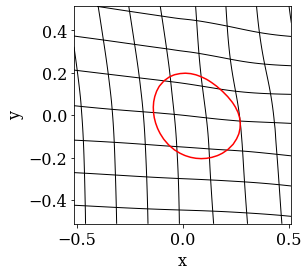

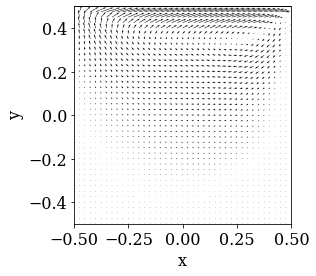

Level Set Advection Time:  0.004418611526489258
------------ Time = 0.8010000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.346127354169985e-14
Total poisson time : 0.0003075599670410156
Total INS time : 0.0035042762756347656
Max, Min, U   : 2.0, -0.18561688169139115
Max, Min, V   : 0.3424025850830382, -0.45504120606844123
Max, Min, P   : -0.2223287297028832, -2.192723820900571
Max, Min, DIV : 3.885780586188048e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004403829574584961
------------ Time = 0.8020000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.360260203289042e-13
Total poisson time : 0.0002529621124267578
Total INS time : 0.0034673213958740234
Max, Min, U   : 2.0, -0.1856448541914234
Max, Min, V   : 0.34241099069157765, -0.4551452034234278
Max, Min, P   : -0.20775764627069954, -2.178213888691894
Max, Min, DIV : 3.4139358007223564e-15, -4.084840105056386

Level Set Advection Time:  0.0051267147064208984
------------ Time = 0.8240000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2923073339349216e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.004092693328857422
Max, Min, U   : 2.0, -0.18617537952421226
Max, Min, V   : 0.34258932791480595, -0.45736602166348894
Max, Min, P   : -0.35960615688058567, -2.3313870957064684
Max, Min, DIV : 3.094746681142624e-15, -3.622102617839573e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004377603530883789
------------ Time = 0.8250000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.123172864476989e-13
Total poisson time : 0.00023651123046875
Total INS time : 0.0035321712493896484
Max, Min, U   : 2.0, -0.18619569575880648
Max, Min, V   : 0.3425971483181461, -0.4574640041221212
Max, Min, P   : -0.3729485535996906, -2.3447901572537346
Max, Min, DIV : 3.7192471324942744e-15, -4.32986979603811

Number of poisson iterations    : None
Final poisson residual : 8.204121178671911e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0034940242767333984
Max, Min, U   : 2.0, -0.18656697786656987
Max, Min, V   : 0.34276330590490084, -0.45955757978947553
Max, Min, P   : -0.43827296292349116, -2.4114250677163804
Max, Min, DIV : 3.7604468150487236e-15, -3.851086116668512e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004382610321044922
------------ Time = 0.8480000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2176182773765133e-14
Total poisson time : 0.00023031234741210938
Total INS time : 0.004015922546386719
Max, Min, U   : 2.0, -0.1865804905724428
Max, Min, V   : 0.3427705971816745, -0.45964998862596584
Max, Min, P   : -0.4375850007462899, -2.41079731151599
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004388093948364258
------------ Time = 0

Level Set Advection Time:  0.004372596740722656
------------ Time = 0.8710000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3041518693000394e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.004175901412963867
Max, Min, U   : 2.0, -0.18681138917792064
Max, Min, V   : 0.3429323657825793, -0.4617123190758305
Max, Min, P   : -0.6353786768352135, -2.6099664350480754
Max, Min, DIV : 3.552713678800501e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004393577575683594
------------ Time = 0.8720000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.300861402498377e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003426790237426758
Max, Min, U   : 2.0, -0.18681802520859458
Max, Min, V   : 0.3429391492401037, -0.4617993122127018
Max, Min, P   : -0.6607691079146554, -2.635416610494561
Max, Min, DIV : 3.9968028886505635e-15, -4.038436252074007e-1

Level Set Advection Time:  0.004395008087158203
------------ Time = 0.8950000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6123765736720054e-12
Total poisson time : 0.00023126602172851562
Total INS time : 0.004188060760498047
Max, Min, U   : 2.0, -0.18689654280305792
Max, Min, V   : 0.3430897890904169, -0.46374165219316205
Max, Min, P   : -0.8021255312164632, -2.778143570402765
Max, Min, DIV : 3.552713678800501e-15, -3.899658373995862e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043599605560302734
------------ Time = 0.8960000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7201214062329903e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.003337383270263672
Max, Min, U   : 2.0, -0.1868968386819478
Max, Min, V   : 0.3430961155616141, -0.4638236309565012
Max, Min, P   : -0.8093351211067572, -2.7853982020295613
Max, Min, DIV : 2.942091015256665e-15, -3.552713678800501

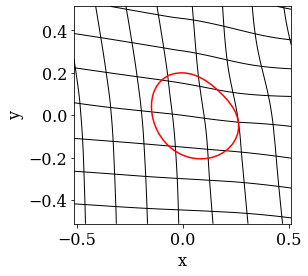

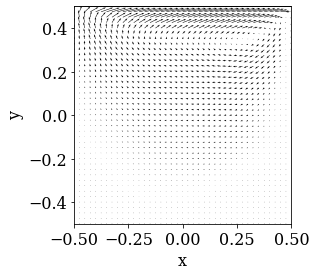

Level Set Advection Time:  0.004427433013916016
------------ Time = 0.9010000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.326106246171242e-13
Total poisson time : 0.0003151893615722656
Total INS time : 0.003630399703979492
Max, Min, U   : 2.0, -0.1868945497425171
Max, Min, V   : 0.34312747201329213, -0.4642305120215601
Max, Min, P   : -0.8056895572730233, -2.782046624866218
Max, Min, DIV : 2.886579864025407e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004402637481689453
------------ Time = 0.9020000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4795298628938735e-13
Total poisson time : 0.0002377033233642578
Total INS time : 0.0034646987915039062
Max, Min, U   : 2.0, -0.1868933449059218
Max, Min, V   : 0.3431336886799425, -0.46431128986820824
Max, Min, P   : -0.8016863754147024, -2.778102143906887
Max, Min, DIV : 4.246603069191224e-15, -3.3306690738754696e-1

Max, Min, P   : -0.9068501905635826, -2.8845604096833517
Max, Min, DIV : 3.608224830031759e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043833255767822266
------------ Time = 0.9250000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.360490144332863e-14
Total poisson time : 0.00023174285888671875
Total INS time : 0.003854990005493164
Max, Min, U   : 2.0, -0.18679941001837683
Max, Min, V   : 0.3432718539647149, -0.46611576298267915
Max, Min, P   : -0.9082414675906161, -2.886009907540085
Max, Min, DIV : 3.6637359812630166e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004364013671875
------------ Time = 0.9260000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.013557989938084e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.0033409595489501953
Max, Min, U   : 2.0, -0.18679253801408086
Max, Min, V   : 0.3432776

Level Set Advection Time:  0.004377841949462891
------------ Time = 0.9480000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.363955213182591e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.004095554351806641
Max, Min, U   : 2.0, -0.18658602897694462
Max, Min, V   : 0.34340129740114206, -0.46782249739604337
Max, Min, P   : -0.9828420960576828, -2.9619385087109986
Max, Min, DIV : 3.635980405647388e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004373073577880859
------------ Time = 0.9490000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.703792905978113e-15
Total poisson time : 0.0002295970916748047
Total INS time : 0.003344297409057617
Max, Min, U   : 2.0, -0.18657420771493352
Max, Min, V   : 0.3434067381121848, -0.46789458521706595
Max, Min, P   : -0.9830453692244476, -2.962199154329694
Max, Min, DIV : 4.163336342344337e-15, -3.913536161803677

Level Set Advection Time:  0.004381895065307617
------------ Time = 0.9710000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.806668999466595e-13
Total poisson time : 0.00024962425231933594
Total INS time : 0.004403352737426758
Max, Min, U   : 2.0, -0.18626792646436294
Max, Min, V   : 0.3435227576315158, -0.4694379623782283
Max, Min, P   : -0.9523742366410813, -2.932744473744209
Max, Min, DIV : 4.218847493575595e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043828487396240234
------------ Time = 0.9720000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.453143861781992e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0034351348876953125
Max, Min, U   : 2.0, -0.1862520353981043
Max, Min, V   : 0.34352786907403887, -0.46950622810579834
Max, Min, P   : -0.977457429842157, -2.9578843170408398
Max, Min, DIV : 3.4416913763379853e-15, -3.46250805804970

Final poisson residual : 4.5293188589813627e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0033483505249023438
Max, Min, U   : 2.0, -0.18585631834716793
Max, Min, V   : 0.34363696343662126, -0.4709684264808696
Max, Min, P   : -1.1464557969349602, -3.128096749640606
Max, Min, DIV : 4.440892098500626e-15, -3.70536934468646e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004349946975708008
------------ Time = 0.9950000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.030688531259208e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.004158973693847656
Max, Min, U   : 2.0, -0.18583630585351973
Max, Min, V   : 0.34364177313300287, -0.4710331291280163
Max, Min, P   : -1.1625806951603304, -3.144277454927202
Max, Min, DIV : 3.941291737419306e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004383087158203125
------------ Time = 0.9960000000000008 ---------------
Number of

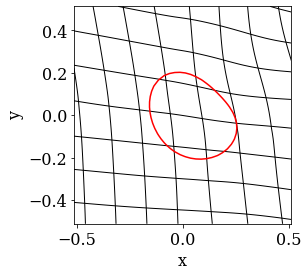

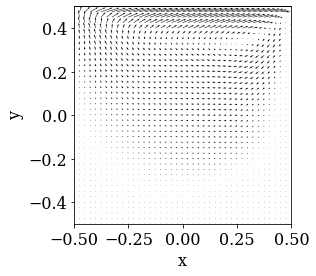

Level Set Advection Time:  0.004448413848876953
------------ Time = 1.0010000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.376505858280502e-13
Total poisson time : 0.00030732154846191406
Total INS time : 0.0035419464111328125
Max, Min, U   : 2.0, -0.18571354355356062
Max, Min, V   : 0.34367035352107733, -0.47141817678321685
Max, Min, P   : -1.214570924185273, -3.1965871011132134
Max, Min, DIV : 3.9968028886505635e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004389524459838867
------------ Time = 1.0020000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.894688848091707e-13
Total poisson time : 0.00024366378784179688
Total INS time : 0.0037195682525634766
Max, Min, U   : 2.0, -0.18569256721208788
Max, Min, V   : 0.3436750706092063, -0.47148182597846217
Max, Min, P   : -1.1949563717165121, -3.177028071284223
Max, Min, DIV : 4.2049697057677804e-15, -3.77475828372

Level Set Advection Time:  0.005028724670410156
------------ Time = 1.023999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.495512629787393e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.003777742385864258
Max, Min, U   : 2.0, -0.18523525845040886
Max, Min, V   : 0.34377587692660105, -0.4728458661679377
Max, Min, P   : -1.2517582435526127, -3.235027034187278
Max, Min, DIV : 3.3306690738754696e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00477147102355957
------------ Time = 1.024999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.502272088873267e-13
Total poisson time : 0.0002377033233642578
Total INS time : 0.003349781036376953
Max, Min, U   : 2.0, -0.18523747752582614
Max, Min, V   : 0.34378032898668015, -0.47290626482309805
Max, Min, P   : -1.227161060172614, -3.210484614236603
Max, Min, DIV : 4.178948853628128e-15, -3.95516952522712e-15
Q

Level Set Advection Time:  0.004412174224853516
------------ Time = 1.0479999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.420027792864602e-15
Total poisson time : 0.00022912025451660156
Total INS time : 0.0046808719635009766
Max, Min, U   : 2.0, -0.18523874726141346
Max, Min, V   : 0.3438795893464154, -0.4742581314701572
Max, Min, P   : -1.2406139213149483, -3.2251705124188748
Max, Min, DIV : 3.885780586188048e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043408870697021484
------------ Time = 1.0489999999999953 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.120874137165927e-12
Total poisson time : 0.0002319812774658203
Total INS time : 0.003856182098388672
Max, Min, U   : 2.0, -0.18523656410167053
Max, Min, V   : 0.34388377691800975, -0.47431533581983426
Max, Min, P   : -1.2716134683526485, -3.256223959044755
Max, Min, DIV : 3.4373545676480433e-15, -4.0245584642661

Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004378557205200195
------------ Time = 1.0719999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.991118966354568e-14
Total poisson time : 0.0002307891845703125
Total INS time : 0.00394749641418457
Max, Min, U   : 2.0, -0.1851382520782841
Max, Min, V   : 0.34397720370497287, -0.47559620542529385
Max, Min, P   : -1.3053414042965925, -3.291168630504617
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004396915435791016
------------ Time = 1.0729999999999926 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1470927866161274e-14
Total poisson time : 0.00023245811462402344
Total INS time : 0.0034189224243164062
Max, Min, U   : 2.0, -0.18513204247110215
Max, Min, V   : 0.3439811462575594, -0.4756504213717324
Max, Min, P   : -1.3058715

Level Set Advection Time:  0.005088090896606445
------------ Time = 1.0939999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5269041095703956e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.0033462047576904297
Max, Min, U   : 2.0, -0.1849628652409396
Max, Min, V   : 0.3440618015961209, -0.47676191857001077
Max, Min, P   : -1.35470371367886, -3.341648233056159
Max, Min, DIV : 3.497202527569243e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043792724609375
------------ Time = 1.0949999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.489182398364724e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.0033416748046875
Max, Min, U   : 2.0, -0.18495305238489035
Max, Min, V   : 0.34406553950314317, -0.47681357746399067
Max, Min, P   : -1.3505118085542425, -3.3375078472981263
Max, Min, DIV : 3.552713678800501e-15, -3.3306690738754696e-15


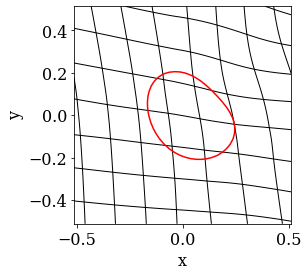

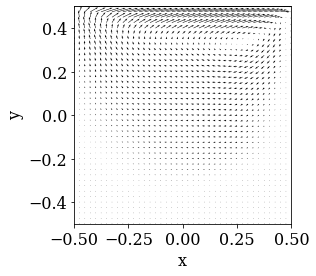

Level Set Advection Time:  0.0044765472412109375
------------ Time = 1.1009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.076604274419775e-13
Total poisson time : 0.00031256675720214844
Total INS time : 0.0035369396209716797
Max, Min, U   : 2.0, -0.18489095694373472
Max, Min, V   : 0.34408777527920176, -0.477121163384055
Max, Min, P   : -1.3586636954016886, -3.345967867279158
Max, Min, DIV : 3.9968028886505635e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004912376403808594
------------ Time = 1.1019999999999894 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.628427280743636e-13
Total poisson time : 0.00024080276489257812
Total INS time : 0.003535747528076172
Max, Min, U   : 2.0, -0.18488007675469417
Max, Min, V   : 0.34409144957984833, -0.4771720359263148
Max, Min, P   : -1.3349446221249957, -3.3222999851159765
Max, Min, DIV : 3.9968028886505635e-15, -4.052314039881

Level Set Advection Time:  0.004998445510864258
------------ Time = 1.123999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.966487650621242e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.0039038658142089844
Max, Min, U   : 2.0, -0.1846037040962913
Max, Min, V   : 0.3441700689469402, -0.47826363472926026
Max, Min, P   : -1.3527418515517275, -3.341216113344002
Max, Min, DIV : 3.774758283725532e-15, -3.4555691641457997e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004709005355834961
------------ Time = 1.124999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.683669926767963e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.0035333633422851562
Max, Min, U   : 2.0, -0.18458950993921192
Max, Min, V   : 0.3441735444110547, -0.47831202473964135
Max, Min, P   : -1.375782619434876, -3.3643072738188535
Max, Min, DIV : 3.70536934468646e-15, -3.9968028886505635e-


Level Set Advection Time:  0.004345893859863281
------------ Time = 1.1469999999999845 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.00582728810631e-13
Total poisson time : 0.0003197193145751953
Total INS time : 0.004284381866455078
Max, Min, U   : 2.0, -0.18427433344974722
Max, Min, V   : 0.3442479191800644, -0.4793505342222711
Max, Min, P   : -1.5596123122575514, -3.549214872734348
Max, Min, DIV : 3.635980405647388e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004364728927612305
------------ Time = 1.1479999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.056775605323249e-12
Total poisson time : 0.0002307891845703125
Total INS time : 0.004216432571411133
Max, Min, U   : 2.0, -0.1842661644237001
Max, Min, V   : 0.34425120905806267, -0.47939658329895074
Max, Min, P   : -1.5874441106708723, -3.5770900130562047
Max, Min, DIV : 3.677613769070831e-15, -3.969047313034935e-15


Total poisson time : 0.0002372264862060547
Total INS time : 0.0033206939697265625
Max, Min, U   : 2.0, -0.18406862120089137
Max, Min, V   : 0.34431854948569335, -0.4803412626591008
Max, Min, P   : -1.7284279693943077, -3.719059522408126
Max, Min, DIV : 3.9968028886505635e-15, -3.497202527569243e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372596740722656
------------ Time = 1.169999999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.722591568940466e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.004144906997680664
Max, Min, U   : 2.0, -0.1840581522481689
Max, Min, V   : 0.344321678105418, -0.48038521260744543
Max, Min, P   : -1.715176649792203, -3.70585616672903
Max, Min, DIV : 3.3029134982598407e-15, -5.329070518200751e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043675899505615234
------------ Time = 1.1709999999999818 ---------------
Number of poisson iterations    : None
Final poisson residua

Level Set Advection Time:  0.004358053207397461
------------ Time = 1.1929999999999794 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.366408626419097e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.004653215408325195
Max, Min, U   : 2.0, -0.18378772604292287
Max, Min, V   : 0.34439167748687305, -0.4813709016864416
Max, Min, P   : -1.8858302224509695, -3.8775920257405105
Max, Min, DIV : 3.4416913763379853e-15, -3.733124920302089e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004337310791015625
------------ Time = 1.1939999999999793 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9880794956767926e-13
Total poisson time : 0.00023698806762695312
Total INS time : 0.0037262439727783203
Max, Min, U   : 2.0, -0.18377478902604716
Max, Min, V   : 0.34439464064234004, -0.48141269412737536
Max, Min, P   : -1.896291671195853, -3.8881003482766685
Max, Min, DIV : 3.948230631323213e-15, -3.552713678800

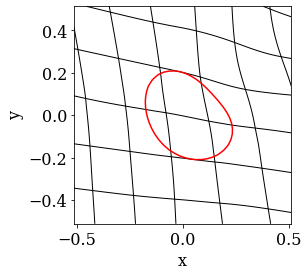

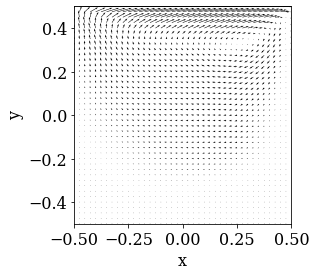

Level Set Advection Time:  0.004512786865234375
------------ Time = 1.2009999999999785 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.88501116736949e-13
Total poisson time : 0.0003094673156738281
Total INS time : 0.003523111343383789
Max, Min, U   : 2.0, -0.1836813942177389
Max, Min, V   : 0.3444151915123062, -0.48170280353709294
Max, Min, P   : -1.9036625482487606, -3.8957980175073463
Max, Min, DIV : 3.9968028886505635e-15, -3.219646771412954e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.007005929946899414
------------ Time = 1.2019999999999784 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0447264316473665e-13
Total poisson time : 0.00023937225341796875
Total INS time : 0.0039196014404296875
Max, Min, U   : 2.0, -0.18366765222071366
Max, Min, V   : 0.3444181003103727, -0.4817439020971854
Max, Min, P   : -1.8934012219394676, -3.8855831862280508
Max, Min, DIV : 3.219646771412954e-15, -3.83026943495679e-

Level Set Advection Time:  0.004304409027099609
------------ Time = 1.222999999999976 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.10055526199487e-13
Total poisson time : 0.0002357959747314453
Total INS time : 0.004017829895019531
Max, Min, U   : 2.0, -0.18336112534393553
Max, Min, V   : 0.34447788833428156, -0.4825881092623841
Max, Min, P   : -1.9817764386797756, -3.9749177822828585
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004323720932006836
------------ Time = 1.223999999999976 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.545525436381359e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0042781829833984375
Max, Min, U   : 2.0, -0.18334564780910007
Max, Min, V   : 0.3444806710867324, -0.48262742368056083
Max, Min, P   : -2.003748624219867, -3.996939609093581
Max, Min, DIV : 3.5041414214731503e-15, -3.774758283725532e-15

Level Set Advection Time:  0.0049364566802978516
------------ Time = 1.2459999999999736 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.945716703857433e-14
Total poisson time : 0.0002288818359375
Total INS time : 0.003706216812133789
Max, Min, U   : 2.0, -0.18298685523555636
Max, Min, V   : 0.34454053316437994, -0.48347293346674663
Max, Min, P   : -2.0769286752659935, -4.071063878304781
Max, Min, DIV : 4.218847493575595e-15, -4.139050213680662e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004395723342895508
------------ Time = 1.2469999999999735 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.225141791531921e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.0035986900329589844
Max, Min, U   : 2.0, -0.18296976703898654
Max, Min, V   : 0.3445431857674621, -0.4835104822247817
Max, Min, P   : -2.082613338928169, -4.076793542024381
Max, Min, DIV : 3.1086244689504383e-15, -4.218847493575595e-15

Level Set Advection Time:  0.004494190216064453
------------ Time = 1.268999999999971 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9867758134450842e-13
Total poisson time : 0.0002541542053222656
Total INS time : 0.004057884216308594
Max, Min, U   : 2.0, -0.1825737299649962
Max, Min, V   : 0.3446001009744175, -0.4843177347160342
Max, Min, P   : -2.238384468799041, -4.233542139515264
Max, Min, DIV : 3.3584246494910985e-15, -4.232725281383409e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004317045211791992
------------ Time = 1.269999999999971 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.161262567479415e-13
Total poisson time : 0.00023937225341796875
Total INS time : 0.0033690929412841797
Max, Min, U   : 2.0, -0.18255484956445597
Max, Min, V   : 0.3446026240776803, -0.48435358915184673
Max, Min, P   : -2.2276023505527522, -4.2228039880756345
Max, Min, DIV : 3.9968028886505635e-15, -3.635980405647388e-1

Level Set Advection Time:  0.005021095275878906
------------ Time = 1.2919999999999685 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.077034242053918e-16
Total poisson time : 0.00023126602172851562
Total INS time : 0.003463268280029297
Max, Min, U   : 2.0, -0.18212122884620588
Max, Min, V   : 0.34465685596302553, -0.4851247780179761
Max, Min, P   : -2.3236195715556613, -4.3197495304291955
Max, Min, DIV : 3.885780586188048e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372119903564453
------------ Time = 1.2929999999999684 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3737121912190374e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.0033800601959228516
Max, Min, U   : 2.0, -0.18210067186425175
Max, Min, V   : 0.34465926918922807, -0.4851590625068326
Max, Min, P   : -2.317311200665308, -4.313484149162979
Max, Min, DIV : 4.0245584642661925e-15, -3.6914915568786

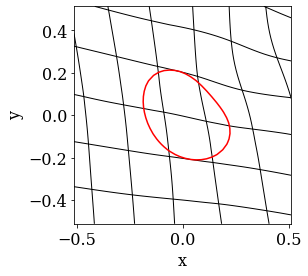

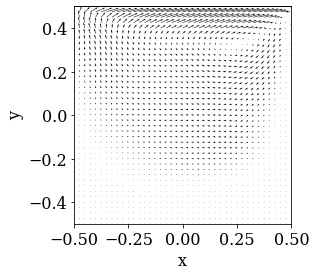

Level Set Advection Time:  0.00451970100402832
------------ Time = 1.3009999999999675 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.437259748201063e-14
Total poisson time : 0.0003139972686767578
Total INS time : 0.0035381317138671875
Max, Min, U   : 2.0, -0.18193433118791316
Max, Min, V   : 0.34467838905074083, -0.48543092551943434
Max, Min, P   : -2.432626454592358, -4.429127150096333
Max, Min, DIV : 4.3298697960381105e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004395008087158203
------------ Time = 1.3019999999999674 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2815125891750708e-12
Total poisson time : 0.0002391338348388672
Total INS time : 0.003377199172973633
Max, Min, U   : 2.0, -0.1819133884708863
Max, Min, V   : 0.3446807556443045, -0.4854646077027157
Max, Min, P   : -2.466888642598027, -4.4634318582788755
Max, Min, DIV : 3.774758283725532e-15, -3.802513859341161e-15

Level Set Advection Time:  0.004380464553833008
------------ Time = 1.3249999999999649 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.496949346446686e-14
Total poisson time : 0.00023174285888671875
Total INS time : 0.004178524017333984
Max, Min, U   : 2.0, -0.18141455504390394
Max, Min, V   : 0.34473383695322324, -0.4862214052379986
Max, Min, P   : -2.541464824063703, -4.538977326791393
Max, Min, DIV : 3.469446951953614e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004368305206298828
------------ Time = 1.3259999999999648 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6095786372727925e-14
Total poisson time : 0.00023126602172851562
Total INS time : 0.003755807876586914
Max, Min, U   : 2.0, -0.18139214861317457
Max, Min, V   : 0.3447360879632448, -0.4862535475800384
Max, Min, P   : -2.540748276564312, -4.538302620814306
Max, Min, DIV : 3.1086244689504383e-15, -3.552713678800501e-

Number of poisson iterations    : None
Final poisson residual : 7.938678972311998e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.0034067630767822266
Max, Min, U   : 2.0, -0.18088659612110006
Max, Min, V   : 0.344784487826952, -0.4869452533939809
Max, Min, P   : -2.6254369529115733, -4.623868738134959
Max, Min, DIV : 4.218847493575595e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004355430603027344
------------ Time = 1.3489999999999622 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.76949640073944e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.004757404327392578
Max, Min, U   : 2.0, -0.18086321216773774
Max, Min, V   : 0.34478663939197535, -0.48697601085711556
Max, Min, P   : -2.6516923417057625, -4.650162799039702
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004377126693725586
------------ Time = 1.34

Level Set Advection Time:  0.004316806793212891
------------ Time = 1.3709999999999598 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.966498599318595e-13
Total poisson time : 0.00024127960205078125
Total INS time : 0.004150390625
Max, Min, U   : 2.0, -0.18033638601109087
Max, Min, V   : 0.34483287900013276, -0.4876379825276297
Max, Min, P   : -2.6959664074861673, -4.69532579511522
Max, Min, DIV : 4.107825191113079e-15, -3.5388358909926865e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004327297210693359
------------ Time = 1.3719999999999597 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.15971959220598e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.0035991668701171875
Max, Min, U   : 2.0, -0.18031190092647364
Max, Min, V   : 0.34483493250248975, -0.4876674174537736
Max, Min, P   : -2.6874629003102646, -4.686861920359273
Max, Min, DIV : 4.440892098500626e-15, -3.885780586188048e-15
Qin,

Level Set Advection Time:  0.005048036575317383
------------ Time = 1.3939999999999573 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.210223337475723e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.0034592151641845703
Max, Min, U   : 2.0, -0.1797622365814572
Max, Min, V   : 0.344879073139968, -0.48830101754439587
Max, Min, P   : -2.7554063404067373, -4.755661676116504
Max, Min, DIV : 3.885780586188048e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004964351654052734
------------ Time = 1.3949999999999572 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6590503793549637e-13
Total poisson time : 0.000240325927734375
Total INS time : 0.0040323734283447266
Max, Min, U   : 2.0, -0.1797367668258468
Max, Min, V   : 0.34488103423236455, -0.4883291960929357
Max, Min, P   : -2.759734773475091, -4.76002948141247
Max, Min, DIV : 3.9968028886505635e-15, -3.6914915568786455e-1

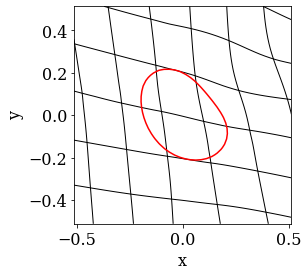

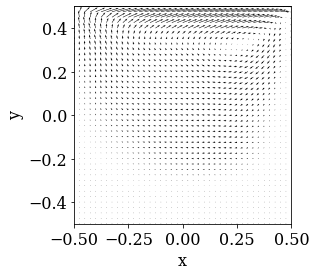

Level Set Advection Time:  0.004480123519897461
------------ Time = 1.4009999999999565 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0465054905037947e-13
Total poisson time : 0.00031948089599609375
Total INS time : 0.0035572052001953125
Max, Min, U   : 2.0, -0.1795837130879522
Max, Min, V   : 0.3448927491524333, -0.48849723523430977
Max, Min, P   : -2.8439435502164234, -4.844459748952011
Max, Min, DIV : 3.6637359812630166e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004399538040161133
------------ Time = 1.4019999999999564 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0438340306294713e-13
Total poisson time : 0.00024080276489257812
Total INS time : 0.00433349609375
Max, Min, U   : 2.0, -0.17955806484203524
Max, Min, V   : 0.3448946877678883, -0.4885250577755708
Max, Min, P   : -2.8411543626453066, -4.84170740190218
Max, Min, DIV : 4.3021142204224816e-15, -3.497202527569243e-15

Level Set Advection Time:  0.00505375862121582
------------ Time = 1.423999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.62330133419863e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.003340005874633789
Max, Min, U   : 2.0, -0.17924073427228743
Max, Min, V   : 0.34493643787909517, -0.4891243319582898
Max, Min, P   : -2.920664158584108, -4.922009716962148
Max, Min, DIV : 3.3306690738754696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004697084426879883
------------ Time = 1.4249999999999539 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5080386442623827e-13
Total poisson time : 0.00023818016052246094
Total INS time : 0.003461599349975586
Max, Min, U   : 2.0, -0.17922748395499208
Max, Min, V   : 0.3449382941228566, -0.4891509967059553
Max, Min, P   : -2.9303554793155193, -4.931738194157734
Max, Min, DIV : 3.219646771412954e-15, -4.107825191113079e-15


Level Set Advection Time:  0.0043833255767822266
------------ Time = 1.4479999999999513 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.429680439098916e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.004742622375488281
Max, Min, U   : 2.0, -0.17890777350413778
Max, Min, V   : 0.34497998824726533, -0.48975081208855165
Max, Min, P   : -3.103509650753458, -5.105729959752656
Max, Min, DIV : 4.107825191113079e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005081892013549805
------------ Time = 1.4489999999999512 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2579519085207713e-14
Total poisson time : 0.0002815723419189453
Total INS time : 0.004415750503540039
Max, Min, U   : 2.0, -0.1788932635763293
Max, Min, V   : 0.3449817581639403, -0.4897763142501673
Max, Min, P   : -3.1038087848051625, -5.106065157599607
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e-1

Level Set Advection Time:  0.0050048828125
------------ Time = 1.4709999999999488 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.300249391703905e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.0034360885620117188
Max, Min, U   : 2.0, -0.1785664546352339
Max, Min, V   : 0.34502019673959466, -0.49032674816707705
Max, Min, P   : -3.109743922766067, -5.112724564771096
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00465083122253418
------------ Time = 1.4719999999999487 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3902937296580625e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.0033140182495117188
Max, Min, U   : 2.0, -0.17855094126646723
Max, Min, V   : 0.3450219147621699, -0.4903512775486337
Max, Min, P   : -3.1213636817234014, -5.124365019727891
Max, Min, DIV : 4.107825191113079e-15, -3.6637359812630166e-15


Level Set Advection Time:  0.004345417022705078
------------ Time = 1.4949999999999461 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.908206357952295e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.0039000511169433594
Max, Min, U   : 2.0, -0.1781834465848816
Max, Min, V   : 0.345060496108558, -0.4909034767119885
Max, Min, P   : -3.333285969568869, -5.337070321010846
Max, Min, DIV : 3.774758283725532e-15, -3.7990444123892075e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004390716552734375
------------ Time = 1.495999999999946 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7737920560428415e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.003634214401245117
Max, Min, U   : 2.0, -0.1781671018702133
Max, Min, V   : 0.3450621343177583, -0.49092697235618976
Max, Min, P   : -3.3283337574129317, -5.332152536823679
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Qin,

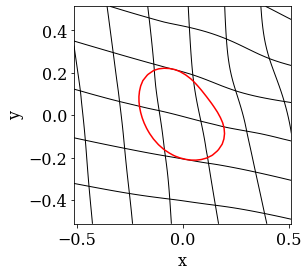

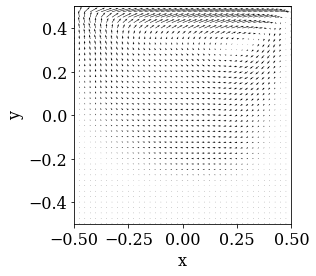

Level Set Advection Time:  0.004416942596435547
------------ Time = 1.5009999999999455 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4738468283970046e-13
Total poisson time : 0.0003039836883544922
Total INS time : 0.0035042762756347656
Max, Min, U   : 2.0, -0.17808472135566397
Max, Min, V   : 0.3450702780313593, -0.49104382170556543
Max, Min, P   : -3.363945044028486, -5.367935291130172
Max, Min, DIV : 4.163336342344337e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004375457763671875
------------ Time = 1.5019999999999454 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.86377506019371e-13
Total poisson time : 0.00023889541625976562
Total INS time : 0.0033969879150390625
Max, Min, U   : 2.0, -0.17806811547074203
Max, Min, V   : 0.34507189737069316, -0.4910670663646575
Max, Min, P   : -3.3444749413970936, -5.348499345979413
Max, Min, DIV : 4.107825191113079e-15, -4.274358644806853e-

Level Set Advection Time:  0.0051136016845703125
------------ Time = 1.523999999999943 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1283804750284785e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.0038089752197265625
Max, Min, U   : 2.0, -0.1777012857990254
Max, Min, V   : 0.3451069660966092, -0.49156870553112264
Max, Min, P   : -3.5457748813478447, -5.55049304300903
Max, Min, DIV : 4.163336342344337e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004342794418334961
------------ Time = 1.5249999999999428 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.850614047325846e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0035736560821533203
Max, Min, U   : 2.0, -0.1776845044065404
Max, Min, V   : 0.3451085306092638, -0.4915910629259003
Max, Min, P   : -3.5534285588717927, -5.558179732018868
Max, Min, DIV : 3.774758283725532e-15, -3.497202527569243e-15

Level Set Advection Time:  0.005005598068237305
------------ Time = 1.5469999999999404 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9464421132306103e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.0035049915313720703
Max, Min, U   : 2.0, -0.1773062995720133
Max, Min, V   : 0.34514219898154125, -0.4920731365519019
Max, Min, P   : -3.632129773063841, -5.637619606959159
Max, Min, DIV : 3.774758283725532e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043964385986328125
------------ Time = 1.5479999999999403 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3282498577255947e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003398895263671875
Max, Min, U   : 2.0, -0.1772887150962025
Max, Min, V   : 0.34514369514921917, -0.49209460790141485
Max, Min, P   : -3.6359131073832347, -5.641435605869195
Max, Min, DIV : 3.9968028886505635e-15, -4.163336342344337e-1

Level Set Advection Time:  0.0043354034423828125
------------ Time = 1.569999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.4489944064129495e-14
Total poisson time : 0.0002465248107910156
Total INS time : 0.004308938980102539
Max, Min, U   : 2.0, -0.17699415107499927
Max, Min, V   : 0.34517597178509896, -0.4925577518950523
Max, Min, P   : -3.7812405756340217, -5.787445543081883
Max, Min, DIV : 3.982925100842749e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004328012466430664
------------ Time = 1.5709999999999378 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.844217028160876e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0032958984375
Max, Min, U   : 2.0, -0.17698348130597485
Max, Min, V   : 0.3451774144673941, -0.49257840250210316
Max, Min, P   : -3.7625464320670585, -5.768782973770593
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15
Q

Level Set Advection Time:  0.004304409027099609
------------ Time = 1.5939999999999352 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.507288234161544e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.004576683044433594
Max, Min, U   : 2.0, -0.17673030160407904
Max, Min, V   : 0.345209934918358, -0.49304390688417316
Max, Min, P   : -3.799972009912343, -5.806893095006716
Max, Min, DIV : 4.107825191113079e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004269838333129883
------------ Time = 1.5949999999999351 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.041108450638587e-13
Total poisson time : 0.00022459030151367188
Total INS time : 0.0033719539642333984
Max, Min, U   : 2.0, -0.176719013572194
Max, Min, V   : 0.34521131903190544, -0.4930637381202339
Max, Min, P   : -3.8200850699143283, -5.827037803582097
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Q

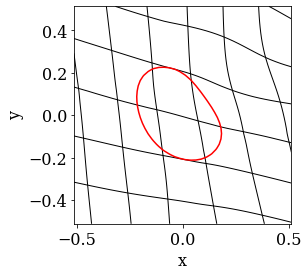

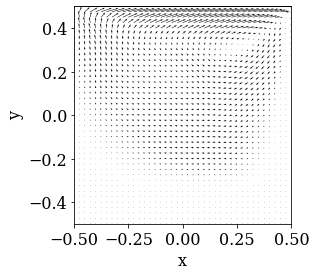

Level Set Advection Time:  0.004415035247802734
------------ Time = 1.6009999999999345 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2673938812015176e-13
Total poisson time : 0.0003020763397216797
Total INS time : 0.003503084182739258
Max, Min, U   : 2.0, -0.1766507115268496
Max, Min, V   : 0.3452195660753777, -0.49318200633507003
Max, Min, P   : -3.888343022089726, -5.895479633037625
Max, Min, DIV : 3.9968028886505635e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004339933395385742
------------ Time = 1.6019999999999344 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.537390326276398e-13
Total poisson time : 0.00024008750915527344
Total INS time : 0.003549814224243164
Max, Min, U   : 2.0, -0.1766392342164205
Max, Min, V   : 0.3452209311447218, -0.4932015985385014
Max, Min, P   : -3.894972001841946, -5.902139167897903
Max, Min, DIV : 3.83026943495679e-15, -3.774758283725532e-15
Qi

Max, Min, V   : 0.34525029343320607, -0.4936241164967532
Max, Min, P   : -4.011974286049834, -6.019777305464539
Max, Min, DIV : 3.845881946240581e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004334211349487305
------------ Time = 1.6249999999999318 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.691256948504836e-14
Total poisson time : 0.00024056434631347656
Total INS time : 0.0041081905364990234
Max, Min, U   : 2.0, -0.17637322196179603
Max, Min, V   : 0.34525160437066676, -0.493642955746305
Max, Min, P   : -4.013457966889212, -6.021286164585504
Max, Min, DIV : 3.594347042223944e-15, -3.427813588530171e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043256282806396484
------------ Time = 1.6259999999999317 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3570777869492316e-14
Total poisson time : 0.0002295970916748047
Total INS time : 0.003447294235229492
Max, Min, U 

Level Set Advection Time:  0.0043184757232666016
------------ Time = 1.6479999999999293 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1700577826541041e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.004060506820678711
Max, Min, U   : 2.0, -0.17609565002254643
Max, Min, V   : 0.3452813586464565, -0.49406832367676184
Max, Min, P   : -4.053039209309306, -6.061458910012063
Max, Min, DIV : 4.085273785925381e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043294429779052734
------------ Time = 1.6489999999999292 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.86463779472682e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.0034613609313964844
Max, Min, U   : 2.0, -0.17608340232404454
Max, Min, V   : 0.3452826347787326, -0.4940864816039073
Max, Min, P   : -4.071759463893717, -6.080207144697279
Max, Min, DIV : 4.399258735077183e-15, -3.877106968808164e-

Level Set Advection Time:  0.004309177398681641
------------ Time = 1.6719999999999267 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2430371771329307e-13
Total poisson time : 0.00022649765014648438
Total INS time : 0.0038645267486572266
Max, Min, U   : 2.0, -0.17579584471640985
Max, Min, V   : 0.3453112980653137, -0.49449586316907984
Max, Min, P   : -4.192900909277266, -6.201977775736769
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043163299560546875
------------ Time = 1.6729999999999265 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.584747040268234e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.003679513931274414
Max, Min, U   : 2.0, -0.17578309947555387
Max, Min, V   : 0.3453125159163593, -0.4945133091508873
Max, Min, P   : -4.199804148108144, -6.208907953639864
Max, Min, DIV : 3.2612801348363973e-15, -4.385380947269368e

Level Set Advection Time:  0.004319906234741211
------------ Time = 1.695999999999924 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.625216666566293e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.004031181335449219
Max, Min, U   : 2.0, -0.1754852010644456
Max, Min, V   : 0.34533992341741876, -0.49490668219619044
Max, Min, P   : -4.288509202057859, -6.298212334497066
Max, Min, DIV : 3.3029134982598407e-15, -3.698430450782553e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004337310791015625
------------ Time = 1.696999999999924 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.902825251466339e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.0035758018493652344
Max, Min, U   : 2.0, -0.1754722343947956
Max, Min, V   : 0.34534109346449693, -0.49492345797171144
Max, Min, P   : -4.280733209389116, -6.290462194400934
Max, Min, DIV : 4.246603069191224e-15, -3.9968028886505635e-1

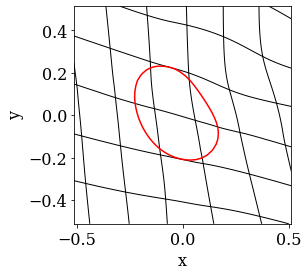

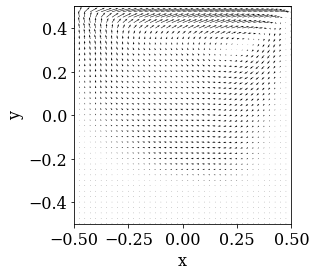

Level Set Advection Time:  0.0044858455657958984
------------ Time = 1.7009999999999235 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.023931540529789e-13
Total poisson time : 0.0003063678741455078
Total INS time : 0.0035064220428466797
Max, Min, U   : 2.0, -0.17542081814130844
Max, Min, V   : 0.34534575382139776, -0.49499028810036144
Max, Min, P   : -4.29137199815743, -6.301191717965828
Max, Min, DIV : 4.218847493575595e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004431486129760742
------------ Time = 1.7019999999999234 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.689482004890675e-13
Total poisson time : 0.00023865699768066406
Total INS time : 0.003407716751098633
Max, Min, U   : 2.0, -0.175407939162113
Max, Min, V   : 0.34534691287647434, -0.49500692498900833
Max, Min, P   : -4.310743376017175, -6.320589079790467
Max, Min, DIV : 3.774758283725532e-15, -3.608224830031759e-15

Level Set Advection Time:  0.004374265670776367
------------ Time = 1.7249999999999208 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.92491541033509e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.004794597625732422
Max, Min, U   : 2.0, -0.1751074933877649
Max, Min, V   : 0.3453729772840506, -0.4953820330996241
Max, Min, P   : -4.443051845232696, -6.453486710159005
Max, Min, DIV : 3.3653635433950058e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004354238510131836
------------ Time = 1.7259999999999207 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.426416342420502e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.00336456298828125
Max, Min, U   : 2.0, -0.17509425419478156
Max, Min, V   : 0.3453740853637896, -0.49539801867955496
Max, Min, P   : -4.4642861745054185, -6.474746862333616
Max, Min, DIV : 4.0245584642661925e-15, -3.608224830031759e-15
Qin,

Level Set Advection Time:  0.004358053207397461
------------ Time = 1.7489999999999182 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1975520498413487e-13
Total poisson time : 0.00023436546325683594
Total INS time : 0.0041179656982421875
Max, Min, U   : 2.0, -0.1747857052446716
Max, Min, V   : 0.34539908443226064, -0.49575865465404234
Max, Min, P   : -4.542981755772938, -6.554016820615165
Max, Min, DIV : 3.941291737419306e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043294429779052734
------------ Time = 1.749999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4258108739159636e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0033485889434814453
Max, Min, U   : 2.0, -0.17477214271448738
Max, Min, V   : 0.3454001482348275, -0.4957740275408084
Max, Min, P   : -4.536289558108172, -6.547349539006108
Max, Min, DIV : 4.052314039881821e-15, -4.163336342344337e

Level Set Advection Time:  0.004380702972412109
------------ Time = 1.7729999999999155 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6185459640153186e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.003996372222900391
Max, Min, U   : 2.0, -0.17446250093455223
Max, Min, V   : 0.34542436044247976, -0.49612152131040166
Max, Min, P   : -4.653328474265704, -6.664924232393075
Max, Min, DIV : 3.802513859341161e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004336357116699219
------------ Time = 1.7739999999999154 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.099780981732391e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.003361940383911133
Max, Min, U   : 2.0, -0.17444900068898384
Max, Min, V   : 0.3454253924660872, -0.49613634738903245
Max, Min, P   : -4.673050699621987, -6.684670853473054
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e

Total INS time : 0.0034308433532714844
Max, Min, U   : 2.0, -0.17414979901153646
Max, Min, V   : 0.34544773762630154, -0.4964568764345246
Max, Min, P   : -4.713467789047055, -6.725560213348039
Max, Min, DIV : 3.7192471324942744e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004336118698120117
------------ Time = 1.796999999999913 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0998837287306903e-13
Total poisson time : 0.00023174285888671875
Total INS time : 0.0039043426513671875
Max, Min, U   : 2.0, -0.17413613894225635
Max, Min, V   : 0.34544874012890625, -0.4964712024642165
Max, Min, P   : -4.721426496510934, -6.733545335839759
Max, Min, DIV : 3.885780586188048e-15, -4.093947403305265e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00434565544128418
------------ Time = 1.7979999999999128 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4190586470220817e-13
Total poisson

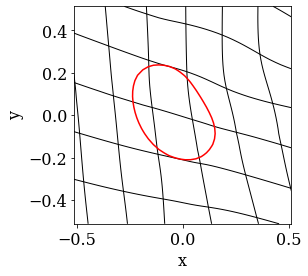

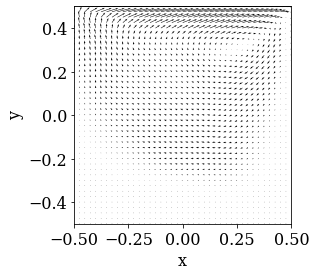

Level Set Advection Time:  0.004419088363647461
------------ Time = 1.8009999999999124 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.646313969298017e-13
Total poisson time : 0.0003120899200439453
Total INS time : 0.0035161972045898438
Max, Min, U   : 2.0, -0.17408145871117542
Max, Min, V   : 0.34545273045601604, -0.49652827913198055
Max, Min, P   : -4.778337877603378, -6.790543595366967
Max, Min, DIV : 3.6637359812630166e-15, -3.712308238590367e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043790340423583984
------------ Time = 1.8019999999999123 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.152572084051923e-13
Total poisson time : 0.0002357959747314453
Total INS time : 0.0033822059631347656
Max, Min, U   : 2.0, -0.17406773889640648
Max, Min, V   : 0.3454537343465996, -0.4965425198079072
Max, Min, P   : -4.791549973567145, -6.803760381293323
Max, Min, DIV : 4.274358644806853e-15, -3.9968028886505635e

Level Set Advection Time:  0.00435638427734375
------------ Time = 1.8249999999999098 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.662519182252441e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.004675626754760742
Max, Min, U   : 2.0, -0.17375581982781085
Max, Min, V   : 0.3454763556899219, -0.49686420283146404
Max, Min, P   : -4.802212125689392, -6.81492020816613
Max, Min, DIV : 3.3584246494910985e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004354715347290039
------------ Time = 1.8259999999999097 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5650687107538266e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003340005874633789
Max, Min, U   : 2.0, -0.17374223685331008
Max, Min, V   : 0.34547731748207583, -0.4968779316091382
Max, Min, P   : -4.795398883650489, -6.808129585313145
Max, Min, DIV : 4.163336342344337e-15, -3.6914915568786455e-15


Level Set Advection Time:  0.004952192306518555
------------ Time = 1.8479999999999073 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.204169531270794e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.003437042236328125
Max, Min, U   : 2.0, -0.17344192220274104
Max, Min, V   : 0.34549804804349743, -0.4971746471866953
Max, Min, P   : -4.8761261564179, -6.889359254204188
Max, Min, DIV : 4.218847493575595e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00435328483581543
------------ Time = 1.8489999999999072 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.132550685554629e-14
Total poisson time : 0.0002295970916748047
Total INS time : 0.003369569778442383
Max, Min, U   : 2.0, -0.17342821118333582
Max, Min, V   : 0.3454989716259023, -0.49718789629802396
Max, Min, P   : -4.8738294738466985, -6.887084418023544
Max, Min, DIV : 4.440892098500626e-15, -4.2049697057677804e-15
Q

Level Set Advection Time:  0.00497746467590332
------------ Time = 1.8709999999999047 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.622121690452018e-14
Total poisson time : 0.00022649765014648438
Total INS time : 0.0033407211303710938
Max, Min, U   : 2.0, -0.173125513072938
Max, Min, V   : 0.34551887027464695, -0.49747418846209523
Max, Min, P   : -4.892514279735207, -6.906237665115503
Max, Min, DIV : 3.9968028886505635e-15, -4.191091917959966e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004362821578979492
------------ Time = 1.8719999999999046 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2423543955824657e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.003452777862548828
Max, Min, U   : 2.0, -0.17311171235469766
Max, Min, V   : 0.34551975609520097, -0.4974869685282256
Max, Min, P   : -4.889021269589021, -6.902765504622531
Max, Min, DIV : 4.107825191113079e-15, -3.9968028886505635e-

Level Set Advection Time:  0.00497889518737793
------------ Time = 1.8939999999999022 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.178368532275828e-14
Total poisson time : 0.00022792816162109375
Total INS time : 0.0034339427947998047
Max, Min, U   : 2.0, -0.17287186244055883
Max, Min, V   : 0.34553894721942074, -0.4977634101501912
Max, Min, P   : -4.926651913800301, -6.940831655150397
Max, Min, DIV : 3.608224830031759e-15, -2.8935187579293142e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004354715347290039
------------ Time = 1.894999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0221622525466811e-12
Total poisson time : 0.0002281665802001953
Total INS time : 0.0034322738647460938
Max, Min, U   : 2.0, -0.17286709332913908
Max, Min, V   : 0.34553980521606475, -0.4977757624808315
Max, Min, P   : -4.953896017873593, -6.968094993658983
Max, Min, DIV : 3.774758283725532e-15, -3.941291737419306e-1

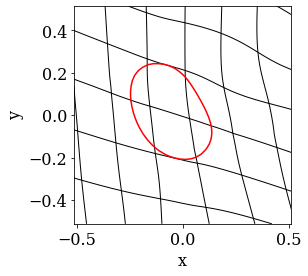

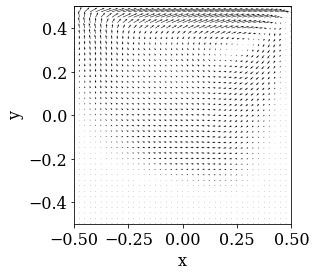

Level Set Advection Time:  0.00452876091003418
------------ Time = 1.9009999999999014 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.071987880017156e-13
Total poisson time : 0.0003094673156738281
Total INS time : 0.003506898880004883
Max, Min, U   : 2.0, -0.17283826209985872
Max, Min, V   : 0.3455449205983342, -0.49784947718988
Max, Min, P   : -4.894704305903754, -6.9090257634778265
Max, Min, DIV : 3.497202527569243e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004415273666381836
------------ Time = 1.9019999999999013 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.043482550712237e-14
Total poisson time : 0.0002510547637939453
Total INS time : 0.003575563430786133
Max, Min, U   : 2.0, -0.1728334215420415
Max, Min, V   : 0.34554576777718365, -0.497861696678692
Max, Min, P   : -4.892216602427094, -6.906558327610473
Max, Min, DIV : 3.6637359812630166e-15, -3.802513859341161e-15
Qin, 

Level Set Advection Time:  0.0049397945404052734
------------ Time = 1.923999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2948353365643533e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0035240650177001953
Max, Min, U   : 2.0, -0.17273078832543534
Max, Min, V   : 0.3455642729461025, -0.4981265222549659
Max, Min, P   : -5.033413350186173, -7.048161453673929
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004350900650024414
------------ Time = 1.9249999999998988 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.657128270580071e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.00341796875
Max, Min, U   : 2.0, -0.17272613844242374
Max, Min, V   : 0.34556510079536423, -0.498138366152225
Max, Min, P   : -5.018427015921939, -7.03319446233833
Max, Min, DIV : 3.774758283725532e-15, -3.3480163086352377e-15
Qin, Qo

Level Set Advection Time:  0.004976034164428711
------------ Time = 1.9469999999998964 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.513187015191857e-13
Total poisson time : 0.00023794174194335938
Total INS time : 0.003656625747680664
Max, Min, U   : 2.0, -0.17339177161502176
Max, Min, V   : 0.3455830649527178, -0.49839487018617723
Max, Min, P   : -4.999946089057757, -7.015079057799231
Max, Min, DIV : 3.219646771412954e-15, -3.802513859341161e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004307985305786133
------------ Time = 1.9479999999998963 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.915769425122889e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0033359527587890625
Max, Min, U   : 2.0, -0.17343873358768236
Max, Min, V   : 0.34558386629406246, -0.49840633789274874
Max, Min, P   : -5.0185684609212515, -7.033719600024567
Max, Min, DIV : 4.052314039881821e-15, -4.0245584642661925

Level Set Advection Time:  0.0049152374267578125
------------ Time = 1.9699999999998938 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.026968551055796e-13
Total poisson time : 0.00023245811462402344
Total INS time : 0.003350496292114258
Max, Min, U   : 2.0, -0.17441896309916177
Max, Min, V   : 0.3456013838393666, -0.4986551046131457
Max, Min, P   : -5.2290734885003385, -7.244557594394916
Max, Min, DIV : 3.677613769070831e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004511833190917969
------------ Time = 1.9709999999998937 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.081550235903745e-13
Total poisson time : 0.00024390220642089844
Total INS time : 0.003617525100708008
Max, Min, U   : 2.0, -0.17446124353556566
Max, Min, V   : 0.345602170513369, -0.4986662477853372
Max, Min, P   : -5.245186233418576, -7.260687445535746
Max, Min, DIV : 3.747002708109903e-15, -3.6637359812630166e-1

Level Set Advection Time:  0.0050373077392578125
------------ Time = 1.9929999999998913 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2945277111397844e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0034973621368408203
Max, Min, U   : 2.0, -0.1753359937933657
Max, Min, V   : 0.3456190849879979, -0.49890732598652365
Max, Min, P   : -5.255666126791992, -7.271548809773435
Max, Min, DIV : 4.107825191113079e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004332304000854492
------------ Time = 1.9939999999998912 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.33104169579651e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.004002094268798828
Max, Min, U   : 2.0, -0.1753732720272718
Max, Min, V   : 0.34561983702575433, -0.4989181009546414
Max, Min, P   : -5.270386777004051, -7.286286879554797
Max, Min, DIV : 3.247402347028583e-15, -3.816391647148976e-15

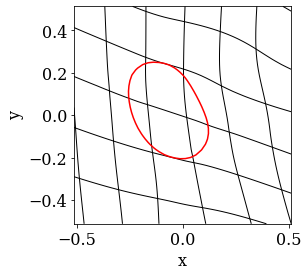

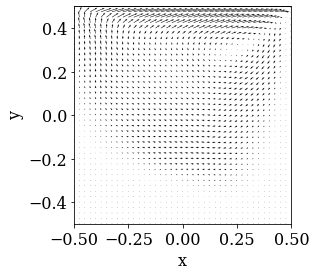

Level Set Advection Time:  0.004458189010620117
------------ Time = 2.0009999999998906 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.700450712706234e-13
Total poisson time : 0.00031304359436035156
Total INS time : 0.003560304641723633
Max, Min, U   : 2.0, -0.17562836066733445
Max, Min, V   : 0.34562506842426627, -0.4989931012749606
Max, Min, P   : -5.327968150642454, -7.343999724651218
Max, Min, DIV : 3.552713678800501e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004495143890380859
------------ Time = 2.0019999999998905 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5845513797915816e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.0036745071411132812
Max, Min, U   : 2.0, -0.17566397037006803
Max, Min, V   : 0.34562581043405993, -0.49900375350702947
Max, Min, P   : -5.335060699321934, -7.351109711467078
Max, Min, DIV : 3.497202527569243e-15, -4.381911500317415e

Level Set Advection Time:  0.005139589309692383
------------ Time = 2.023999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5357402410162934e-14
Total poisson time : 0.0002391338348388672
Total INS time : 0.003314495086669922
Max, Min, U   : 2.0, -0.17628107532889262
Max, Min, V   : 0.3456418759985528, -0.4992344334640623
Max, Min, P   : -5.502536171625467, -7.518948047553494
Max, Min, DIV : 4.107825191113079e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004340648651123047
------------ Time = 2.024999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6295921647438423e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.0033140182495117188
Max, Min, U   : 2.0, -0.17630709781698395
Max, Min, V   : 0.3456425918331677, -0.4992447470502814
Max, Min, P   : -5.506843409974417, -7.52327207875737
Max, Min, DIV : 3.9968028886505635e-15, -3.4416913763379853e-15


Level Set Advection Time:  0.00431513786315918
------------ Time = 2.0469999999998856 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5618302388301055e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.004013776779174805
Max, Min, U   : 2.0, -0.17728371159405476
Max, Min, V   : 0.3456580878005086, -0.4994680848519685
Max, Min, P   : -5.62544951380688, -7.642222249962085
Max, Min, DIV : 4.107825191113079e-15, -4.0245584642661925e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00438380241394043
------------ Time = 2.0479999999998855 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.302071184056956e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0038213729858398438
Max, Min, U   : 2.0, -0.17733457669964023
Max, Min, V   : 0.34565877851483595, -0.4994780710233079
Max, Min, P   : -5.6087503118629485, -7.625539708026913
Max, Min, DIV : 3.2751579226442118e-15, -4.107825191113079e-1

Level Set Advection Time:  0.004929304122924805
------------ Time = 2.069999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.4870752389719004e-14
Total poisson time : 0.00022649765014648438
Total INS time : 0.0039806365966796875
Max, Min, U   : 2.0, -0.17839082613609195
Max, Min, V   : 0.3456736718409162, -0.499694154632932
Max, Min, P   : -5.823930548976671, -7.841067478536962
Max, Min, DIV : 2.9976021664879227e-15, -3.524958103184872e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004288673400878906
------------ Time = 2.070999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.208360614639782e-13
Total poisson time : 0.00022602081298828125
Total INS time : 0.003643512725830078
Max, Min, U   : 2.0, -0.1784319073820634
Max, Min, V   : 0.3456743400504951, -0.49970382654643153
Max, Min, P   : -5.807127433791683, -7.824280032155864
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e-15


Level Set Advection Time:  0.004328250885009766
------------ Time = 2.0929999999998805 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.91079552878221e-13
Total poisson time : 0.00039505958557128906
Total INS time : 0.004204273223876953
Max, Min, U   : 2.0, -0.17929166690346704
Max, Min, V   : 0.34568874065173555, -0.4999131417731345
Max, Min, P   : -6.007151584117051, -8.02460997885934
Max, Min, DIV : 3.83026943495679e-15, -3.469446951953614e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004313945770263672
------------ Time = 2.0939999999998804 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.81485272576276e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0033037662506103516
Max, Min, U   : 2.0, -0.1793292202140979
Max, Min, V   : 0.3456893821485411, -0.4999225005751798
Max, Min, P   : -6.025732041847722, -8.04320604406328
Max, Min, DIV : 3.0808688933348094e-15, -4.218847493575595e-15
Qin, 

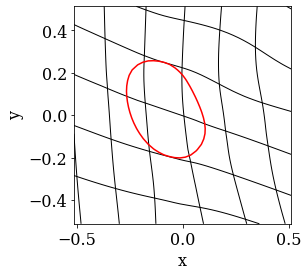

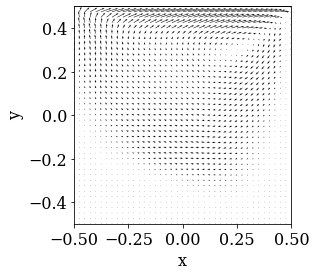

Level Set Advection Time:  0.004597187042236328
------------ Time = 2.1009999999998796 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.476795620350213e-13
Total poisson time : 0.0003025531768798828
Total INS time : 0.003536701202392578
Max, Min, U   : 2.0, -0.17958819111331184
Max, Min, V   : 0.3456938543748063, -0.4999876705863998
Max, Min, P   : -6.118612251266207, -8.13616308296754
Max, Min, DIV : 3.83026943495679e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004391193389892578
------------ Time = 2.1019999999998795 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.996720763567043e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.004435539245605469
Max, Min, U   : 2.0, -0.1796208172860364
Max, Min, V   : 0.34569448822729304, -0.49999692600345175
Max, Min, P   : -6.13912969535157, -8.156695844195367
Max, Min, DIV : 3.774758283725532e-15, -4.052314039881821e-15
Qin,

Level Set Advection Time:  0.004922628402709961
------------ Time = 2.123999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.88794985338674e-12
Total poisson time : 0.00022721290588378906
Total INS time : 0.003454446792602539
Max, Min, U   : 2.0, -0.18029519049107998
Max, Min, V   : 0.34570830144230197, -0.500197653797805
Max, Min, P   : -6.372569068341113, -8.390424535544247
Max, Min, DIV : 2.914335439641036e-15, -3.0253577421035516e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043485164642333984
------------ Time = 2.124999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0653426070207205e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.0033147335052490234
Max, Min, U   : 2.0, -0.1803252853440852
Max, Min, V   : 0.34570893291627347, -0.5002066752164699
Max, Min, P   : -6.36977787526097, -8.387625648621471
Max, Min, DIV : 3.816391647148976e-15, -4.107825191113079e-15
Qi

Level Set Advection Time:  0.00437164306640625
------------ Time = 2.1469999999998746 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.454284541967255e-14
Total poisson time : 0.00023412704467773438
Total INS time : 0.004008293151855469
Max, Min, U   : 2.0, -0.1809011241021012
Max, Min, V   : 0.34572256714439964, -0.5004022855883674
Max, Min, P   : -6.579983255586722, -8.598112574891662
Max, Min, DIV : 4.107825191113079e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004389047622680664
------------ Time = 2.1479999999998745 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.016614265855125e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.003449678421020508
Max, Min, U   : 2.0, -0.1809307411105824
Max, Min, V   : 0.34572317460625485, -0.500411044240413
Max, Min, P   : -6.595664520494148, -8.61380715198155
Max, Min, DIV : 3.774758283725532e-15, -3.1155633628543455e-15
Qi

Level Set Advection Time:  0.00494384765625
------------ Time = 2.169999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.55533598273172e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.003457307815551758
Max, Min, U   : 2.0, -0.18154500226612358
Max, Min, V   : 0.3457363528203181, -0.5006010494449307
Max, Min, P   : -6.833578536855112, -8.85200456960264
Max, Min, DIV : 4.163336342344337e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043833255767822266
------------ Time = 2.170999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0227694473974387e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.0037479400634765625
Max, Min, U   : 2.0, -0.18157108119208631
Max, Min, V   : 0.3457369413416293, -0.5006095608597919
Max, Min, P   : -6.838644013648546, -8.857083366011565
Max, Min, DIV : 4.163336342344337e-15, -4.08006961549745e-15
Qin, Qou

Level Set Advection Time:  0.0050013065338134766
------------ Time = 2.1929999999998695 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5711340761504736e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.0033473968505859375
Max, Min, U   : 2.0, -0.1820902945931669
Max, Min, V   : 0.3457500051218965, -0.5007951440719568
Max, Min, P   : -6.965568422051599, -8.984244652809116
Max, Min, DIV : 4.163336342344337e-15, -4.3021142204224816e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044002532958984375
------------ Time = 2.1939999999998694 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.180200761502972e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.004436016082763672
Max, Min, U   : 2.0, -0.18211176493184966
Max, Min, V   : 0.3457505862097714, -0.5008034594862829
Max, Min, P   : -6.9487489916581415, -8.967429861647453
Max, Min, DIV : 4.440892098500626e-15, -3.552713678800501e-

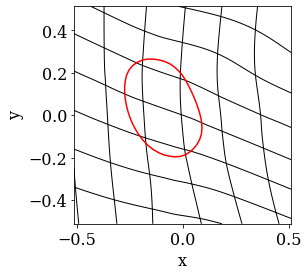

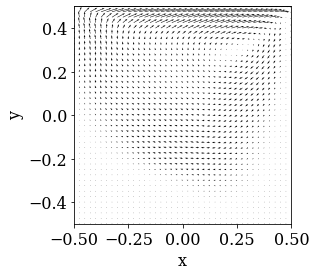

Level Set Advection Time:  0.004442453384399414
------------ Time = 2.2009999999998686 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.994180705643174e-13
Total poisson time : 0.0003123283386230469
Total INS time : 0.003518819808959961
Max, Min, U   : 2.0, -0.18225090625208928
Max, Min, V   : 0.3457546280412764, -0.5008613821680518
Max, Min, P   : -7.034976715095204, -9.053745040141086
Max, Min, DIV : 4.107825191113079e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004416704177856445
------------ Time = 2.2019999999998685 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7444500031390584e-15
Total poisson time : 0.00023984909057617188
Total INS time : 0.004170894622802734
Max, Min, U   : 2.0, -0.18226637397740791
Max, Min, V   : 0.3457552043571906, -0.500869623198058
Max, Min, P   : -7.035036379290423, -9.053816912836144
Max, Min, DIV : 3.608224830031759e-15, -3.7192471324942744e-15


Level Set Advection Time:  0.0043048858642578125
------------ Time = 2.223999999999866 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6500645450640946e-14
Total poisson time : 0.000743865966796875
Total INS time : 0.004691362380981445
Max, Min, U   : 2.0, -0.18257736558045004
Max, Min, V   : 0.3457675808235882, -0.5010482044603711
Max, Min, P   : -7.218380868067641, -9.237419534450853
Max, Min, DIV : 3.9968028886505635e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042989253997802734
------------ Time = 2.224999999999866 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0339490816745606e-13
Total poisson time : 0.0005199909210205078
Total INS time : 0.0037059783935546875
Max, Min, U   : 2.0, -0.18259030527698772
Max, Min, V   : 0.3457681305119388, -0.5010561990728875
Max, Min, P   : -7.221102548192065, -9.240152472576556
Max, Min, DIV : 3.552713678800501e-15, -3.858025010572419e-15


Level Set Advection Time:  0.004296064376831055
------------ Time = 2.2479999999998634 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2963057761374364e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.004035234451293945
Max, Min, U   : 2.0, -0.18319566127858386
Max, Min, V   : 0.34578051041986047, -0.5012372272197535
Max, Min, P   : -7.4291753369782265, -9.448414483068706
Max, Min, DIV : 3.566591466608315e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00433802604675293
------------ Time = 2.2489999999998633 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3217976014727457e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.003591775894165039
Max, Min, U   : 2.0, -0.18322543264099392
Max, Min, V   : 0.3457810386405137, -0.5012449787318028
Max, Min, P   : -7.425521544858179, -9.444770492927136
Max, Min, DIV : 4.218847493575595e-15, -4.107825191113079e-1

Level Set Advection Time:  0.004317045211791992
------------ Time = 2.271999999999861 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.234638039038249e-13
Total poisson time : 0.00022602081298828125
Total INS time : 0.004264116287231445
Max, Min, U   : 2.0, -0.1838621430647086
Max, Min, V   : 0.3457930794058243, -0.5014209590665151
Max, Min, P   : -7.607754827161585, -9.627217800953401
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004326343536376953
------------ Time = 2.2729999999998607 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0556725133778928e-14
Total poisson time : 0.00022530555725097656
Total INS time : 0.0035338401794433594
Max, Min, U   : 2.0, -0.1838883177498624
Max, Min, V   : 0.34579359176978, -0.5014284948054161
Max, Min, P   : -7.608027721557895, -9.627500992349264
Max, Min, DIV : 3.989863994746656e-15, -3.9968028886505635e-15
Qin

Level Set Advection Time:  0.0043222904205322266
------------ Time = 2.295999999999858 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0950420419144995e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.0039060115814208984
Max, Min, U   : 2.0, -0.1844568499676478
Max, Min, V   : 0.3458052883591658, -0.5015996375398399
Max, Min, P   : -7.740672756809529, -9.760353223562625
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004307270050048828
------------ Time = 2.296999999999858 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.927929864622112e-14
Total poisson time : 0.00023365020751953125
Total INS time : 0.0036432743072509766
Max, Min, U   : 2.0, -0.18448107778171283
Max, Min, V   : 0.34580580156968216, -0.5016070104648473
Max, Min, P   : -7.742526704463356, -9.76219493690638
Max, Min, DIV : 3.885780586188048e-15, -3.2751579226442118e-1

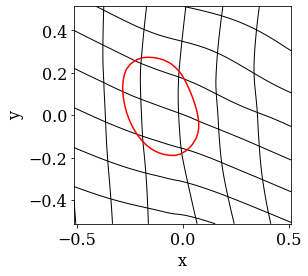

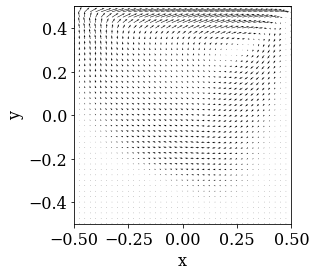

Level Set Advection Time:  0.0044078826904296875
------------ Time = 2.3009999999998576 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.83819066716532e-13
Total poisson time : 0.00032138824462890625
Total INS time : 0.003510713577270508
Max, Min, U   : 2.0, -0.18457637382685355
Max, Min, V   : 0.3458078434211885, -0.5016364165292556
Max, Min, P   : -7.7549866296202214, -9.774693264573564
Max, Min, DIV : 3.552713678800501e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043866634368896484
------------ Time = 2.3019999999998575 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.531246543115109e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.003543376922607422
Max, Min, U   : 2.0, -0.18459980577040266
Max, Min, V   : 0.3458083512789652, -0.501643746534776
Max, Min, P   : -7.748061549030646, -9.767777718884886
Max, Min, DIV : 3.316791286067655e-15, -3.9968028886505635e-1

Level Set Advection Time:  0.00489497184753418
------------ Time = 2.323999999999855 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.000482841905922e-12
Total poisson time : 0.00022482872009277344
Total INS time : 0.0037658214569091797
Max, Min, U   : 2.0, -0.18506218429856816
Max, Min, V   : 0.34581934261452446, -0.5018030102325439
Max, Min, P   : -7.853290555064439, -9.87320541845031
Max, Min, DIV : 4.052314039881821e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004389286041259766
------------ Time = 2.324999999999855 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3755563531617715e-13
Total poisson time : 0.00022673606872558594
Total INS time : 0.003442049026489258
Max, Min, U   : 2.0, -0.18507803729461503
Max, Min, V   : 0.34581983594767235, -0.5018101646424981
Max, Min, P   : -7.8599173014746775, -9.879841747001876
Max, Min, DIV : 3.7192471324942744e-15, -3.9968028886505635e-1

Level Set Advection Time:  0.005017518997192383
------------ Time = 2.3459999999998526 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.876257097426135e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0033605098724365234
Max, Min, U   : 2.0, -0.18536430999754197
Max, Min, V   : 0.3458300111621566, -0.501958568575569
Max, Min, P   : -8.037667478418877, -10.057768411007416
Max, Min, DIV : 3.83026943495679e-15, -3.941291737419306e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004380226135253906
------------ Time = 2.3469999999998525 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1199604382441745e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.003820180892944336
Max, Min, U   : 2.0, -0.18537691571780707
Max, Min, V   : 0.34583048840968694, -0.5019655515003708
Max, Min, P   : -8.045888471064561, -10.065998120533727
Max, Min, DIV : 3.3306690738754696e-15, -3.6637359812630166e-



Level Set Advection Time:  0.0043566226959228516
------------ Time = 2.36999999999985 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.842204870714959e-14
Total poisson time : 0.000232696533203125
Total INS time : 0.003877401351928711
Max, Min, U   : 2.0, -0.18566053691010068
Max, Min, V   : 0.3458412216687928, -0.5021239045471061
Max, Min, P   : -8.148050128927935, -10.16835360027907
Max, Min, DIV : 4.163336342344337e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00435185432434082
------------ Time = 2.37099999999985 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.994606580997122e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.003312826156616211
Max, Min, U   : 2.0, -0.18567232003921405
Max, Min, V   : 0.3458416756031198, -0.5021306851291878
Max, Min, P   : -8.16907741967574, -10.189389562260478
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15
Qin,

Level Set Advection Time:  0.004294157028198242
------------ Time = 2.3919999999998476 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3626189456039177e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.004056692123413086
Max, Min, U   : 2.0, -0.1858840499084143
Max, Min, V   : 0.34585108352820654, -0.502271350467066
Max, Min, P   : -8.339828352650628, -10.360306395458638
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004294633865356445
------------ Time = 2.3929999999998475 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2834220811679028e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.003282785415649414
Max, Min, U   : 2.0, -0.18589098326255135
Max, Min, V   : 0.3458515274023626, -0.5022779736584361
Max, Min, P   : -8.343294324505012, -10.363780194143565
Max, Min, DIV : 3.552713678800501e-15, -3.83026943495679e-15


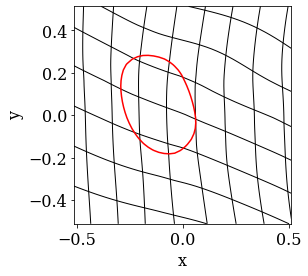

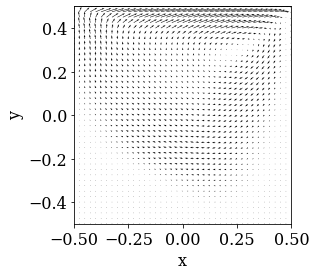

Level Set Advection Time:  0.0044403076171875
------------ Time = 2.4009999999998466 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5848851666076926e-13
Total poisson time : 0.0003085136413574219
Total INS time : 0.0034868717193603516
Max, Min, U   : 2.0, -0.1859432902458701
Max, Min, V   : 0.3458550522669723, -0.5023306880703013
Max, Min, P   : -8.454458699443506, -10.475011407993888
Max, Min, DIV : 4.135580766728708e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004377126693725586
------------ Time = 2.4019999999998465 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.921319324663313e-13
Total poisson time : 0.0002372264862060547
Total INS time : 0.003462553024291992
Max, Min, U   : 2.0, -0.1859494774085845
Max, Min, V   : 0.3458554950815963, -0.5023372570305293
Max, Min, P   : -8.473755956368626, -10.49431042858149
Max, Min, DIV : 3.0531133177191805e-15, -3.0531133177191805e-15
Qi

Max, Min, DIV : 3.6637359812630166e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004307270050048828
------------ Time = 2.424999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1522528538207459e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.0038824081420898438
Max, Min, U   : 2.0, -0.186052155612901
Max, Min, V   : 0.3458653638282758, -0.5024859890576104
Max, Min, P   : -8.789557308400848, -10.810265008786109
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004318952560424805
------------ Time = 2.425999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7783372285322416e-14
Total poisson time : 0.00022649765014648438
Total INS time : 0.003309965133666992
Max, Min, U   : 2.0, -0.18605558606661823
Max, Min, V   : 0.3458657841612269, -0.5024923655166065
Max, Min, P   : -8.78856326

Level Set Advection Time:  0.00434112548828125
------------ Time = 2.4479999999998414 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1496653497891572e-14
Total poisson time : 0.0002281665802001953
Total INS time : 0.003933429718017578
Max, Min, U   : 2.0, -0.18628046327556202
Max, Min, V   : 0.34587500525850223, -0.5026312255868789
Max, Min, P   : -9.091870155719182, -11.11269014624135
Max, Min, DIV : 3.9968028886505635e-15, -3.677613769070831e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004366397857666016
------------ Time = 2.4489999999998413 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0909435203982121e-12
Total poisson time : 0.00022649765014648438
Total INS time : 0.0034418106079101562
Max, Min, U   : 2.0, -0.1862950853189756
Max, Min, V   : 0.34587542068421234, -0.5026374704571049
Max, Min, P   : -9.122650116679779, -11.143476813900387
Max, Min, DIV : 2.886579864025407e-15, -4.274358644806853e-

Level Set Advection Time:  0.004343986511230469
------------ Time = 2.4719999999998388 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.79707549275343e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.00398707389831543
Max, Min, U   : 2.0, -0.1866398463663961
Max, Min, V   : 0.3458848820667782, -0.5027795252435259
Max, Min, P   : -9.323663136768234, -11.344605477020965
Max, Min, DIV : 3.3306690738754696e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004349231719970703
------------ Time = 2.4729999999998387 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6258516323611068e-12
Total poisson time : 0.00022864341735839844
Total INS time : 0.0034160614013671875
Max, Min, U   : 2.0, -0.18665451041363032
Max, Min, V   : 0.345885291452108, -0.5027856410340809
Max, Min, P   : -9.363977405243862, -11.384920161466662
Max, Min, DIV : 3.885780586188048e-15, -3.833738881908744e-15

Level Set Advection Time:  0.00433039665222168
------------ Time = 2.495999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.658301821806378e-14
Total poisson time : 0.00022745132446289062
Total INS time : 0.003917694091796875
Max, Min, U   : 2.0, -0.18693393318813262
Max, Min, V   : 0.34589477205920405, -0.5029253617283592
Max, Min, P   : -9.537010291764505, -11.558017304769836
Max, Min, DIV : 4.052314039881821e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00431513786315918
------------ Time = 2.496999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.280845336039114e-13
Total poisson time : 0.0002262592315673828
Total INS time : 0.0034110546112060547
Max, Min, U   : 2.0, -0.18694599934130524
Max, Min, V   : 0.34589517816258275, -0.5029313765742713
Max, Min, P   : -9.548104908791345, -11.569116466251653
Max, Min, DIV : 3.927413949611491e-15, -3.885780586188048e-15


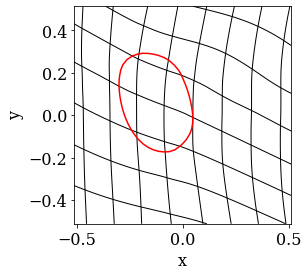

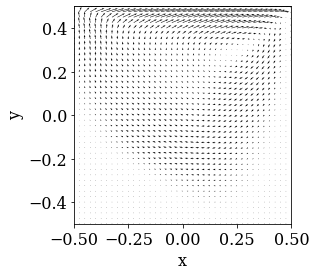

Level Set Advection Time:  0.004380941390991211
------------ Time = 2.5009999999998356 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.348426079528569e-13
Total poisson time : 0.00030517578125
Total INS time : 0.003483295440673828
Max, Min, U   : 2.0, -0.18699377885529544
Max, Min, V   : 0.3458967940041917, -0.502955375012956
Max, Min, P   : -9.603307023390746, -11.624336358417983
Max, Min, DIV : 3.5110803153770576e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005774259567260742
------------ Time = 2.5019999999998355 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.050355619175177e-12
Total poisson time : 0.0003275871276855469
Total INS time : 0.004022836685180664
Max, Min, U   : 2.0, -0.1870055964375974
Max, Min, V   : 0.34589719587925594, -0.5029613594120012
Max, Min, P   : -9.631470754306756, -11.652504433117963
Max, Min, DIV : 3.6637359812630166e-15, -3.552713678800501e-15
Qin,

Level Set Advection Time:  0.004500150680541992
------------ Time = 2.523999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0927089045748324e-13
Total poisson time : 0.0006494522094726562
Total INS time : 0.003892183303833008
Max, Min, U   : 2.0, -0.1871637707517766
Max, Min, V   : 0.3459057988136463, -0.5030913681568125
Max, Min, P   : -9.856429899514684, -11.87745892286596
Max, Min, DIV : 3.83026943495679e-15, -3.649858193455202e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004320621490478516
------------ Time = 2.524999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.279267270196452e-14
Total poisson time : 0.00022721290588378906
Total INS time : 0.0036542415618896484
Max, Min, U   : 2.0, -0.1871672534622958
Max, Min, V   : 0.3459061774912631, -0.503097194744453
Max, Min, P   : -9.858691597705898, -11.879715739926114
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15
Qin,

Number of poisson iterations    : None
Final poisson residual : 8.144210033243803e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0034842491149902344
Max, Min, U   : 2.0, -0.18722218467476967
Max, Min, V   : 0.34591440854578065, -0.5032239875825572
Max, Min, P   : -10.157819771586855, -12.178911261557207
Max, Min, DIV : 3.552713678800501e-15, -3.5110803153770576e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043413639068603516
------------ Time = 2.5479999999998304 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.108058506604213e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.004061460494995117
Max, Min, U   : 2.0, -0.1872240471089423
Max, Min, V   : 0.34591477729651987, -0.5032296867716762
Max, Min, P   : -10.178818362185346, -12.199912442828985
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004673957824707031
------------ Time = 2

Level Set Advection Time:  0.0048825740814208984
------------ Time = 2.569999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1098929507894004e-13
Total poisson time : 0.00022554397583007812
Total INS time : 0.003496885299682617
Max, Min, U   : 2.0, -0.18726425153394446
Max, Min, V   : 0.3459227963864249, -0.5033537716249858
Max, Min, P   : -10.37054910302311, -12.391783744851754
Max, Min, DIV : 3.83026943495679e-15, -4.3021142204224816e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004313945770263672
------------ Time = 2.570999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.717599130381246e-13
Total poisson time : 0.00022530555725097656
Total INS time : 0.003569364547729492
Max, Min, U   : 2.0, -0.18726597317923907
Max, Min, V   : 0.34592315602646895, -0.5033593523492527
Max, Min, P   : -10.383010870792104, -12.404249365855271
Max, Min, DIV : 3.1086244689504383e-15, -3.6914915568786455

Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00430607795715332
------------ Time = 2.5939999999998253 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3853576234819877e-14
Total poisson time : 0.00022840499877929688
Total INS time : 0.0041217803955078125
Max, Min, U   : 2.0, -0.18726203339619715
Max, Min, V   : 0.34593140772689, -0.5034866326400396
Max, Min, P   : -10.57847656106469, -12.599792037587175
Max, Min, DIV : 3.6914915568786455e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004429340362548828
------------ Time = 2.5949999999998252 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0749785720747674e-12
Total poisson time : 0.00022792816162109375
Total INS time : 0.003697633743286133
Max, Min, U   : 2.0, -0.18726129770914365
Max, Min, V   : 0.3459317607561232, -0.5034921080471645
Max, Min, P   : -10.607331933659163, -12.628650442385531
Max, Min, DIV : 3.88578058618804

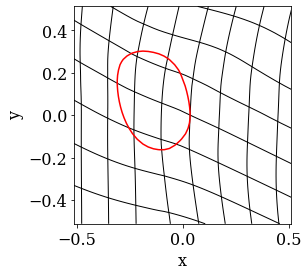

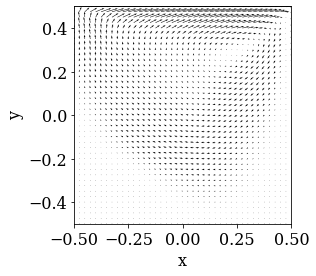

Level Set Advection Time:  0.004488706588745117
------------ Time = 2.6009999999998246 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.246678469989408e-13
Total poisson time : 0.0003039836883544922
Total INS time : 0.0035195350646972656
Max, Min, U   : 2.0, -0.18727903420334657
Max, Min, V   : 0.34593387067853965, -0.5035248623944686
Max, Min, P   : -10.704315382903921, -12.725664126185963
Max, Min, DIV : 3.6637359812630166e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005053043365478516
------------ Time = 2.6019999999998245 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.85274102504274e-13
Total poisson time : 0.00023818016052246094
Total INS time : 0.003567934036254883
Max, Min, U   : 2.0, -0.1872917057322387
Max, Min, V   : 0.3459342212621446, -0.503530305936202
Max, Min, P   : -10.72290330381204, -12.74425033728174
Max, Min, DIV : 3.3306690738754696e-15, -3.164135620181696e-1

Level Set Advection Time:  0.005055665969848633
------------ Time = 2.623999999999822 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4909495269414385e-14
Total poisson time : 0.0002269744873046875
Total INS time : 0.003339052200317383
Max, Min, U   : 2.0, -0.1875422414898568
Max, Min, V   : 0.3459418574804408, -0.5036889336685139
Max, Min, P   : -10.91570848297633, -12.937145057285209
Max, Min, DIV : 4.135580766728708e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004372596740722656
------------ Time = 2.624999999999822 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.506547114078242e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.0036437511444091797
Max, Min, U   : 2.0, -0.18754930831939137
Max, Min, V   : 0.34594220771511663, -0.5036973077504783
Max, Min, P   : -10.900214807269185, -12.921645065330418
Max, Min, DIV : 3.497202527569243e-15, -3.552713678800501e-15


Max, Min, DIV : 3.83026943495679e-15, -4.246603069191224e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004366397857666016
------------ Time = 2.6469999999998195 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1378378437067385e-12
Total poisson time : 0.00022840499877929688
Total INS time : 0.003778219223022461
Max, Min, U   : 2.0, -0.18770223053152713
Max, Min, V   : 0.3459496851606228, -0.5038796054144578
Max, Min, P   : -11.158196264847593, -13.179681585999122
Max, Min, DIV : 3.635980405647388e-15, -3.0531133177191805e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00436854362487793
------------ Time = 2.6479999999998194 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.225700891046745e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.0033648014068603516
Max, Min, U   : 2.0, -0.18770902693097027
Max, Min, V   : 0.3459500175911329, -0.5038878094729256
Max, Min, P   : -11.149366

Level Set Advection Time:  0.00436854362487793
------------ Time = 2.669999999999817 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.435053251816648e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.00380706787109375
Max, Min, U   : 2.0, -0.1878465761500522
Max, Min, V   : 0.34595725635171304, -0.5040667411857771
Max, Min, P   : -11.28445431999815, -13.305986481400893
Max, Min, DIV : 3.3306690738754696e-15, -3.247402347028583e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043752193450927734
------------ Time = 2.670999999999817 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6405236610579376e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.0034401416778564453
Max, Min, U   : 2.0, -0.18785178772364558
Max, Min, V   : 0.34595758437234436, -0.5040748120497045
Max, Min, P   : -11.291775057119095, -13.313309016238588
Max, Min, DIV : 3.774758283725532e-15, -3.885780586188048e-15
Q

Level Set Advection Time:  0.005034685134887695
------------ Time = 2.6919999999998145 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.668955232963299e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.003535747528076172
Max, Min, U   : 2.0, -0.18795399082579695
Max, Min, V   : 0.3459643454067378, -0.504242801841747
Max, Min, P   : -11.53946148102546, -13.561010068924942
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044078826904296875
------------ Time = 2.6929999999998144 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5164313691731363e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0039904117584228516
Max, Min, U   : 2.0, -0.1879585264883683
Max, Min, V   : 0.3459646655500145, -0.5042507424484423
Max, Min, P   : -11.546112501539325, -13.567661849289076
Max, Min, DIV : 3.608224830031759e-15, -4.163336342344337e-

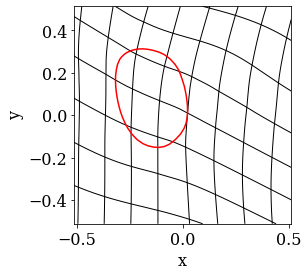

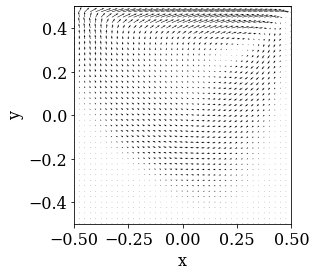

Level Set Advection Time:  0.00448918342590332
------------ Time = 2.7009999999998136 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2972083041102145e-12
Total poisson time : 0.0003254413604736328
Total INS time : 0.0036020278930664062
Max, Min, U   : 2.0, -0.18798193866996096
Max, Min, V   : 0.3459672708431152, -0.5043142298314033
Max, Min, P   : -11.574397182046047, -13.595879681281723
Max, Min, DIV : 3.885780586188048e-15, -4.08006961549745e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004386425018310547
------------ Time = 2.7019999999998134 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.391310210474164e-13
Total poisson time : 0.0002574920654296875
Total INS time : 0.004181385040283203
Max, Min, U   : 2.0, -0.18798407757203717
Max, Min, V   : 0.3459675974702882, -0.5043221495952416
Max, Min, P   : -11.580782341801612, -13.60226484311926
Max, Min, DIV : 2.9698465908722937e-15, -3.6637359812630166e-1

Level Set Advection Time:  0.004402637481689453
------------ Time = 2.724999999999811 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.504062098425394e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.00419926643371582
Max, Min, U   : 2.0, -0.18799118903226858
Max, Min, V   : 0.34597494285672925, -0.5045026902199665
Max, Min, P   : -11.757175696100902, -13.778652976591887
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004377126693725586
------------ Time = 2.725999999999811 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6064968205625166e-12
Total poisson time : 0.00023055076599121094
Total INS time : 0.0034596920013427734
Max, Min, U   : 2.0, -0.18799061090729333
Max, Min, V   : 0.34597525588620653, -0.5045104713231734
Max, Min, P   : -11.798377119056983, -13.819855619216908
Max, Min, DIV : 4.218847493575595e-15, -3.7192471324942744

Number of poisson iterations    : None
Final poisson residual : 1.5703277030141283e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.003821134567260742
Max, Min, U   : 2.0, -0.18797856919901962
Max, Min, V   : 0.3459820043204292, -0.5046801640530195
Max, Min, P   : -11.950355097976487, -13.971853844249445
Max, Min, DIV : 3.6637359812630166e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043756961822509766
------------ Time = 2.7489999999998083 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.075142543771474e-13
Total poisson time : 0.000240325927734375
Total INS time : 0.004010438919067383
Max, Min, U   : 2.0, -0.18797803115565823
Max, Min, V   : 0.3459823051583073, -0.5046878099482199
Max, Min, P   : -11.947511334665194, -13.969010636335414
Max, Min, DIV : 3.247402347028583e-15, -2.7755575615628914e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004357576370239258
------------ Time = 2.7

Level Set Advection Time:  0.00481104850769043
------------ Time = 2.7719999999998057 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.205459590728932e-13
Total poisson time : 0.00023818016052246094
Total INS time : 0.004332304000854492
Max, Min, U   : 2.0, -0.18810727282193912
Max, Min, V   : 0.3459891270241527, -0.504862178090049
Max, Min, P   : -12.17088024965764, -14.192369900585105
Max, Min, DIV : 3.524958103184872e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005264997482299805
------------ Time = 2.7729999999998056 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.26663559902121e-13
Total poisson time : 0.0002856254577636719
Total INS time : 0.004224061965942383
Max, Min, U   : 2.0, -0.18811590801560926
Max, Min, V   : 0.34598942043474945, -0.5048696998989073
Max, Min, P   : -12.156538352314412, -14.178027449370934
Max, Min, DIV : 3.774758283725532e-15, -3.608224830031759e-15
Q

Level Set Advection Time:  0.005070209503173828
------------ Time = 2.7939999999998033 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.776763511194013e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.0034437179565429688
Max, Min, U   : 2.0, -0.18828722910430692
Max, Min, V   : 0.3459954664545203, -0.5050263510772097
Max, Min, P   : -12.303236644926132, -14.324681643292637
Max, Min, DIV : 3.566591466608315e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004417896270751953
------------ Time = 2.794999999999803 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3178168559582214e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.003367900848388672
Max, Min, U   : 2.0, -0.1882949813342944
Max, Min, V   : 0.34599574909954195, -0.5050337488332234
Max, Min, P   : -12.306923499414255, -14.328377499940057
Max, Min, DIV : 3.774758283725532e-15, -4.163336342344337e-

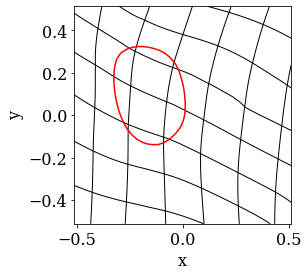

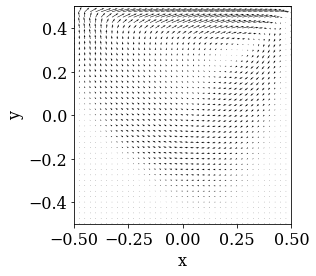

Level Set Advection Time:  0.00449824333190918
------------ Time = 2.8009999999998025 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.964394286877814e-13
Total poisson time : 0.0003070831298828125
Total INS time : 0.003545999526977539
Max, Min, U   : 2.0, -0.18834060360906013
Max, Min, V   : 0.34599743402076805, -0.5050780137776772
Max, Min, P   : -12.361889302546192, -14.383332959339393
Max, Min, DIV : 4.107825191113079e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00445103645324707
------------ Time = 2.8019999999998024 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.562092760703828e-13
Total poisson time : 0.00024008750915527344
Total INS time : 0.003497600555419922
Max, Min, U   : 2.0, -0.18834805881135364
Max, Min, V   : 0.3459977132269944, -0.5050853715528767
Max, Min, P   : -12.387366775226923, -14.408810159720481
Max, Min, DIV : 3.101685575046531e-15, -3.885780586188048e-15

Max, Min, P   : -12.706036358275938, -14.72751339782488
Max, Min, DIV : 3.608224830031759e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043871402740478516
------------ Time = 2.8249999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3646458567226556e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0042285919189453125
Max, Min, U   : 2.0, -0.1884481688456463
Max, Min, V   : 0.3460044526301636, -0.5052546970442754
Max, Min, P   : -12.715277282992535, -14.736770307218952
Max, Min, DIV : 3.608224830031759e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004367828369140625
------------ Time = 2.8259999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6209837085088161e-12
Total poisson time : 0.0002338886260986328
Total INS time : 0.0033571720123291016
Max, Min, U   : 2.0, -0.1884514773919934
Max, Min, V   : 0.3460047408978

Level Set Advection Time:  0.004419088363647461
------------ Time = 2.8469999999997975 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.194082337130725e-13
Total poisson time : 0.00022840499877929688
Total INS time : 0.003336668014526367
Max, Min, U   : 2.0, -0.18851528574177473
Max, Min, V   : 0.34601055021904503, -0.5054140440971322
Max, Min, P   : -13.0673397253598, -15.088838925811025
Max, Min, DIV : 3.774758283725532e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00436711311340332
------------ Time = 2.8479999999997974 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.327079036270661e-13
Total poisson time : 0.0002288818359375
Total INS time : 0.0041539669036865234
Max, Min, U   : 2.0, -0.1885180568821903
Max, Min, V   : 0.3460108183518132, -0.5054212165481329
Max, Min, P   : -13.05834906050238, -15.079846141292986
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin

Level Set Advection Time:  0.005068540573120117
------------ Time = 2.869999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.137250588156219e-13
Total poisson time : 0.00023293495178222656
Total INS time : 0.0033605098724365234
Max, Min, U   : 2.0, -0.188575284195718
Max, Min, V   : 0.34601644135447074, -0.5055771101072937
Max, Min, P   : -13.200202384768682, -15.22162136972938
Max, Min, DIV : 4.218847493575595e-15, -3.469446951953614e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004405975341796875
------------ Time = 2.870999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0168983098988927e-12
Total poisson time : 0.00022912025451660156
Total INS time : 0.00348663330078125
Max, Min, U   : 2.0, -0.18857770528738063
Max, Min, V   : 0.34601668747180053, -0.5055841144284243
Max, Min, P   : -13.228067134318955, -15.249482530170162
Max, Min, DIV : 3.524958103184872e-15, -3.608224830031759e-15

Level Set Advection Time:  0.0051043033599853516
------------ Time = 2.8929999999997924 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.738987281924455e-14
Total poisson time : 0.0002281665802001953
Total INS time : 0.0033593177795410156
Max, Min, U   : 2.0, -0.18860291628103387
Max, Min, V   : 0.3460221254579483, -0.5057371458540489
Max, Min, P   : -13.438517605273724, -15.459961132805544
Max, Min, DIV : 3.5180192092809648e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004385232925415039
------------ Time = 2.8939999999997923 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4978069131460993e-13
Total poisson time : 0.0002353191375732422
Total INS time : 0.0033502578735351562
Max, Min, U   : 2.0, -0.18860231175435777
Max, Min, V   : 0.3460223682437827, -0.5057440416805529
Max, Min, P   : -13.448063009558624, -15.469506803259259
Max, Min, DIV : 3.969047313034935e-15, -4.44089209850062

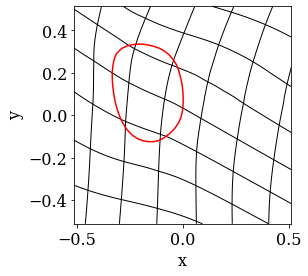

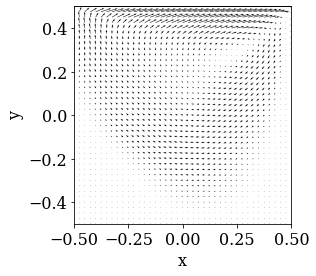

Level Set Advection Time:  0.004413127899169922
------------ Time = 2.9009999999997915 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3147896887808917e-12
Total poisson time : 0.00031495094299316406
Total INS time : 0.003583669662475586
Max, Min, U   : 2.0, -0.18859419387153561
Max, Min, V   : 0.3460240504141113, -0.5057921401992309
Max, Min, P   : -13.483411309622936, -15.504859665998868
Max, Min, DIV : 4.107825191113079e-15, -3.469446951953614e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004393100738525391
------------ Time = 2.9019999999997914 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.424353800864811e-13
Total poisson time : 0.00023627281188964844
Total INS time : 0.003471851348876953
Max, Min, U   : 2.0, -0.18859258409488586
Max, Min, V   : 0.3460242897291188, -0.505798991214096
Max, Min, P   : -13.498247989578266, -15.51971197508726
Max, Min, DIV : 3.747002708109903e-15, -3.497202527569243e-1

Level Set Advection Time:  0.005162715911865234
------------ Time = 2.923999999999789 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.819254980938241e-14
Total poisson time : 0.00023126602172851562
Total INS time : 0.003592967987060547
Max, Min, U   : 2.0, -0.18855744035235963
Max, Min, V   : 0.3460294218141361, -0.5059482148987646
Max, Min, P   : -13.757566282753384, -15.778971663100593
Max, Min, DIV : 3.3306690738754696e-15, -3.969047313034935e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004375457763671875
------------ Time = 2.924999999999789 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.951912985844776e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.004103422164916992
Max, Min, U   : 2.0, -0.18855586403057875
Max, Min, V   : 0.3460296505128695, -0.5059549344498133
Max, Min, P   : -13.783158703875527, -15.80456146765998
Max, Min, DIV : 3.3306690738754696e-15, -3.6637359812630166e-

Level Set Advection Time:  0.004365444183349609
------------ Time = 2.9469999999997865 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7400955947491708e-13
Total poisson time : 0.0002353191375732422
Total INS time : 0.003838777542114258
Max, Min, U   : 2.0, -0.18852138887947234
Max, Min, V   : 0.34603449292877436, -0.5061010718654658
Max, Min, P   : -13.989264911202481, -16.01064226578902
Max, Min, DIV : 3.747002708109903e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004369258880615234
------------ Time = 2.9479999999997863 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4720979272249274e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.00335693359375
Max, Min, U   : 2.0, -0.18851984056193116
Max, Min, V   : 0.3460347055073387, -0.506107638757867
Max, Min, P   : -13.982382860789738, -16.003759923759127
Max, Min, DIV : 3.552713678800501e-15, -3.6637359812630166e-15


Level Set Advection Time:  0.004224538803100586
------------ Time = 2.969999999999784 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.346912368419204e-13
Total poisson time : 0.0002269744873046875
Total INS time : 0.004625558853149414
Max, Min, U   : 2.0, -0.18848202876155692
Max, Min, V   : 0.3460392066233094, -0.506250333152083
Max, Min, P   : -14.16874503010839, -16.190073458964584
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004243373870849609
------------ Time = 2.970999999999784 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9964970815752155e-13
Total poisson time : 0.00022554397583007812
Total INS time : 0.0037660598754882812
Max, Min, U   : 2.0, -0.1884795153904439
Max, Min, V   : 0.3460394057913817, -0.506256746073265
Max, Min, P   : -14.173790890109172, -16.195118748271106
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-15


Level Set Advection Time:  0.004849672317504883
------------ Time = 2.9939999999997813 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.354590590681381e-13
Total poisson time : 0.00022745132446289062
Total INS time : 0.0038187503814697266
Max, Min, U   : 2.0, -0.18841258520445128
Max, Min, V   : 0.34604398569808337, -0.5064029330751718
Max, Min, P   : -14.425627538686012, -16.446974989762424
Max, Min, DIV : 3.5110803153770576e-15, -3.3029134982598407e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042455196380615234
------------ Time = 2.994999999999781 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.213847915206038e-13
Total poisson time : 0.00023055076599121094
Total INS time : 0.0038805007934570312
Max, Min, U   : 2.0, -0.1884091107249015
Max, Min, V   : 0.3460441851496226, -0.5064092347424348
Max, Min, P   : -14.434521457253211, -16.45585498546227
Max, Min, DIV : 3.774758283725532e-15, -3.99680288865056

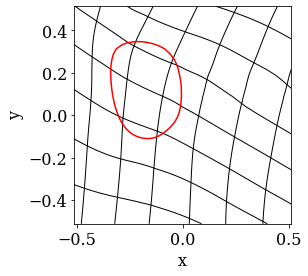

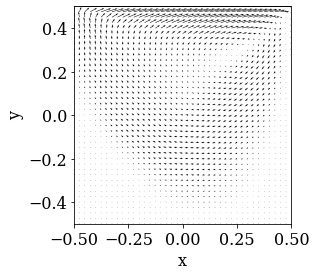

Level Set Advection Time:  0.004305362701416016
------------ Time = 3.0009999999997805 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.272261554039205e-13
Total poisson time : 0.0002951622009277344
Total INS time : 0.0034618377685546875
Max, Min, U   : 2.0, -0.18838853812517667
Max, Min, V   : 0.34604536255396806, -0.5064468994326108
Max, Min, P   : -14.511216237147222, -16.532549285297957
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004263162612915039
------------ Time = 3.0019999999997804 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4132299061803964e-12
Total poisson time : 0.00023055076599121094
Total INS time : 0.00415492057800293
Max, Min, U   : 2.0, -0.1883851668355777
Max, Min, V   : 0.3460455549409342, -0.5064531497669619
Max, Min, P   : -14.550520098402018, -16.571854769437312
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635

Level Set Advection Time:  0.004600048065185547
------------ Time = 3.024999999999778 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.206928266696655e-13
Total poisson time : 0.0002262592315673828
Total INS time : 0.0035734176635742188
Max, Min, U   : 2.0, -0.1883106391684212
Max, Min, V   : 0.3460497336999298, -0.5065948794180801
Max, Min, P   : -14.781621587516822, -16.802991358749253
Max, Min, DIV : 3.1086244689504383e-15, -2.8171909249863347e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004225730895996094
------------ Time = 3.0259999999997778 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0281918666102222e-12
Total poisson time : 0.00022149085998535156
Total INS time : 0.0036487579345703125
Max, Min, U   : 2.0, -0.18830761943416915
Max, Min, V   : 0.3460499066434237, -0.5066009561660952
Max, Min, P   : -14.809399082914126, -16.830743831977713
Max, Min, DIV : 3.524958103184872e-15, -3.413935800722356

Final poisson residual : 1.6242601785504521e-12
Total poisson time : 0.00022077560424804688
Total INS time : 0.004023551940917969
Max, Min, U   : 2.0, -0.18823785993387737
Max, Min, V   : 0.3460533711415855, -0.5067268683853302
Max, Min, P   : -15.049991180356537, -17.071375796039607
Max, Min, DIV : 3.9968028886505635e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004297971725463867
------------ Time = 3.0479999999997753 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9860911080287355e-13
Total poisson time : 0.00021982192993164062
Total INS time : 0.0041086673736572266
Max, Min, U   : 2.0, -0.18823410206330754
Max, Min, V   : 0.34605352648058574, -0.5067327767658879
Max, Min, P   : -15.057922362499298, -17.07930659545726
Max, Min, DIV : 3.941291737419306e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004200935363769531
------------ Time = 3.0489999999997752 ---------------
Numb


Level Set Advection Time:  0.004189968109130859
------------ Time = 3.0719999999997727 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.630346651549798e-13
Total poisson time : 0.00022029876708984375
Total INS time : 0.0037801265716552734
Max, Min, U   : 2.0, -0.18814419283039954
Max, Min, V   : 0.3460569217949558, -0.506871805239929
Max, Min, P   : -15.278678094053818, -17.300196982077473
Max, Min, DIV : 3.982925100842749e-15, -3.802513859341161e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004175662994384766
------------ Time = 3.0729999999997726 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.488531859185674e-13
Total poisson time : 0.0002181529998779297
Total INS time : 0.0037872791290283203
Max, Min, U   : 2.0, -0.18814059273882633
Max, Min, V   : 0.3460570528701973, -0.5068774897716354
Max, Min, P   : -15.269204651016846, -17.290725311598365
Max, Min, DIV : 3.3306690738754696e-15, -3.497202527569243

Level Set Advection Time:  0.004192829132080078
------------ Time = 3.09599999999977 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.621058432581347e-14
Total poisson time : 0.0002200603485107422
Total INS time : 0.004210948944091797
Max, Min, U   : 2.0, -0.1880461332731084
Max, Min, V   : 0.346059777592464, -0.5070056046382622
Max, Min, P   : -15.481864907570987, -17.503423122848517
Max, Min, DIV : 4.107825191113079e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004178047180175781
------------ Time = 3.09699999999977 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.871416240647304e-12
Total poisson time : 0.0002186298370361328
Total INS time : 0.0032854080200195312
Max, Min, U   : 2.0, -0.18804199789325454
Max, Min, V   : 0.34605988484140277, -0.5070110617188895
Max, Min, P   : -15.529705434713946, -17.55125619818209
Max, Min, DIV : 4.0245584642661925e-15, -3.83026943495679e-15
Qin,

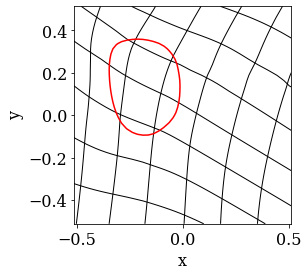

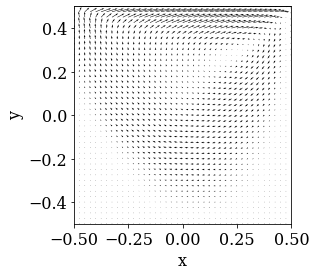

Level Set Advection Time:  0.008214473724365234
------------ Time = 3.1009999999997695 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.018328268081248e-13
Total poisson time : 0.0002963542938232422
Total INS time : 0.0033740997314453125
Max, Min, U   : 2.0, -0.18805337825273694
Max, Min, V   : 0.3460602992933635, -0.5070327781795346
Max, Min, P   : -15.565924567817389, -17.58747409055705
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00434565544128418
------------ Time = 3.1019999999997694 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.02584750428172e-12
Total poisson time : 0.00030303001403808594
Total INS time : 0.005118608474731445
Max, Min, U   : 2.0, -0.18805912267854225
Max, Min, V   : 0.34606040007745525, -0.5070381811478601
Max, Min, P   : -15.593690724768464, -17.615240291086323
Max, Min, DIV : 4.0419056990259605e-15, -4.3298697960381105e

Level Set Advection Time:  0.004920005798339844
------------ Time = 3.124999999999767 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.148851936447789e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.003502368927001953
Max, Min, U   : 2.0, -0.18817849408695583
Max, Min, V   : 0.3460625282907889, -0.5071599170315136
Max, Min, P   : -15.63620994886715, -17.657772936656606
Max, Min, DIV : 4.218847493575595e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004318952560424805
------------ Time = 3.1259999999997667 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.43106054947342e-13
Total poisson time : 0.0002315044403076172
Total INS time : 0.0034072399139404297
Max, Min, U   : 2.0, -0.1881836324980974
Max, Min, V   : 0.34606260831613905, -0.5071650852068579
Max, Min, P   : -15.661623367089696, -17.683186962443084
Max, Min, DIV : 4.440892098500626e-15, -3.3306690738754696e-1

Level Set Advection Time:  0.004393339157104492
------------ Time = 3.148999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.247133963641625e-13
Total poisson time : 0.00023031234741210938
Total INS time : 0.0038776397705078125
Max, Min, U   : 2.0, -0.18830247039176012
Max, Min, V   : 0.34606414525575907, -0.5072809143996183
Max, Min, P   : -15.66440414897178, -17.68597060182156
Max, Min, DIV : 3.858025010572419e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004305839538574219
------------ Time = 3.149999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4727890707008845e-13
Total poisson time : 0.00025463104248046875
Total INS time : 0.0033464431762695312
Max, Min, U   : 2.0, -0.18830765917585532
Max, Min, V   : 0.34606419712352393, -0.5072858092640061
Max, Min, P   : -15.675843886874404, -17.69741067319674
Max, Min, DIV : 4.090477956353311e-15, -3.6637359812630166e-

Level Set Advection Time:  0.0043680667877197266
------------ Time = 3.1729999999997616 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.844805984797083e-13
Total poisson time : 0.0002346038818359375
Total INS time : 0.004125833511352539
Max, Min, U   : 2.0, -0.1884218698057192
Max, Min, V   : 0.3460651587842604, -0.507395352333216
Max, Min, P   : -15.731490404667332, -17.75298400207464
Max, Min, DIV : 3.885780586188048e-15, -3.649858193455202e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004426002502441406
------------ Time = 3.1739999999997615 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.860638491662605e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.0033152103424072266
Max, Min, U   : 2.0, -0.18842589765572826
Max, Min, V   : 0.3460651952721083, -0.507399997284287
Max, Min, P   : -15.736479946041374, -17.757985128401423
Max, Min, DIV : 3.885780586188048e-15, -3.622102617839573e-15
Q

Level Set Advection Time:  0.00451207160949707
------------ Time = 3.195999999999759 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.984475199856572e-13
Total poisson time : 0.0002357959747314453
Total INS time : 0.0040361881256103516
Max, Min, U   : 2.0, -0.18850915435728718
Max, Min, V   : 0.3460655788027458, -0.5074987393341645
Max, Min, P   : -15.92139222730296, -17.942922879200705
Max, Min, DIV : 4.163336342344337e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004341602325439453
------------ Time = 3.196999999999759 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.719682846516976e-13
Total poisson time : 0.0002841949462890625
Total INS time : 0.0034859180450439453
Max, Min, U   : 2.0, -0.1885129658864735
Max, Min, V   : 0.3460655829037288, -0.5075030827078396
Max, Min, P   : -15.934437674875044, -17.955971588983488
Max, Min, DIV : 3.6637359812630166e-15, -3.8441472227646045e-15


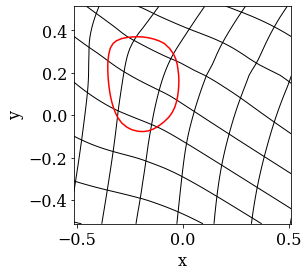

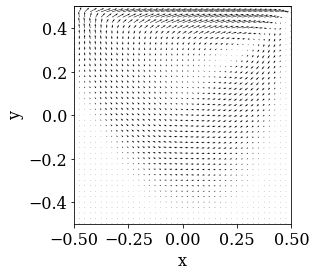

Level Set Advection Time:  0.0044403076171875
------------ Time = 3.2009999999997585 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6034799657023978e-13
Total poisson time : 0.000324249267578125
Total INS time : 0.003551483154296875
Max, Min, U   : 2.0, -0.18852824790938535
Max, Min, V   : 0.3460655845261294, -0.5075203190911125
Max, Min, P   : -15.999892444128177, -18.02143993261303
Max, Min, DIV : 3.816391647148976e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043756961822509766
------------ Time = 3.2019999999997584 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1894387709885904e-13
Total poisson time : 0.0002465248107910156
Total INS time : 0.004053592681884766
Max, Min, U   : 2.0, -0.18853207722713647
Max, Min, V   : 0.3460655813247483, -0.5075245938965491
Max, Min, P   : -15.996756795686156, -18.01830780597727
Max, Min, DIV : 4.107825191113079e-15, -4.274358644806853e-15
Q

Number of poisson iterations    : None
Final poisson residual : 9.728092863098646e-13
Total poisson time : 0.0002429485321044922
Total INS time : 0.0036966800689697266
Max, Min, U   : 2.0, -0.18861701061180638
Max, Min, V   : 0.3460651726218139, -0.5076151472190481
Max, Min, P   : -16.222114079593624, -18.24374862805925
Max, Min, DIV : 4.052314039881821e-15, -3.497202527569243e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044171810150146484
------------ Time = 3.224999999999756 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.893296139699587e-13
Total poisson time : 0.00024771690368652344
Total INS time : 0.0040624141693115234
Max, Min, U   : 2.0, -0.18862090193341427
Max, Min, V   : 0.34606513995614224, -0.5076191051312733
Max, Min, P   : -16.24134414635703, -18.26298298350244
Max, Min, DIV : 4.163336342344337e-15, -3.1363800445660672e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004329681396484375
------------ Time = 3.225

Level Set Advection Time:  0.004369258880615234
------------ Time = 3.2479999999997533 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1416285939667244e-15
Total poisson time : 0.00023746490478515625
Total INS time : 0.004453182220458984
Max, Min, U   : 2.0, -0.1887101771922501
Max, Min, V   : 0.3460640654854435, -0.5077062969668467
Max, Min, P   : -16.462840458528916, -18.484554703216155
Max, Min, DIV : 3.552713678800501e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004329204559326172
------------ Time = 3.248999999999753 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.398365788235208e-14
Total poisson time : 0.00024271011352539062
Total INS time : 0.003353118896484375
Max, Min, U   : 2.0, -0.1887140954698073
Max, Min, V   : 0.34606400370330703, -0.5077099155364097
Max, Min, P   : -16.460636298739406, -18.482444907045835
Max, Min, DIV : 3.552713678800501e-15, -3.2057689836051395e

Level Set Advection Time:  0.004343986511230469
------------ Time = 3.2719999999997507 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.565656079259793e-14
Total poisson time : 0.0002484321594238281
Total INS time : 0.003900766372680664
Max, Min, U   : 2.0, -0.18879556589622648
Max, Min, V   : 0.3460624341971667, -0.5077897481787336
Max, Min, P   : -16.635855200115163, -18.65808170078021
Max, Min, DIV : 3.6637359812630166e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004433870315551758
------------ Time = 3.2729999999997506 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0698963729556995e-13
Total poisson time : 0.00023698806762695312
Total INS time : 0.003762960433959961
Max, Min, U   : 2.0, -0.18879884975748631
Max, Min, V   : 0.34606235397690877, -0.5077930574064189
Max, Min, P   : -16.62725132940584, -18.6494860054691
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15

Level Set Advection Time:  0.004420042037963867
------------ Time = 3.295999999999748 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3093805773269627e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.0040552616119384766
Max, Min, U   : 2.0, -0.18886982357272789
Max, Min, V   : 0.34605960179875983, -0.5078631235851296
Max, Min, P   : -16.716092555109462, -18.73897266796146
Max, Min, DIV : 4.052314039881821e-15, -3.9621084191310274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00435185432434082
------------ Time = 3.296999999999748 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.646554165068337e-14
Total poisson time : 0.00025582313537597656
Total INS time : 0.003346681594848633
Max, Min, U   : 2.0, -0.18887287909950579
Max, Min, V   : 0.3460594556578419, -0.5078659292714903
Max, Min, P   : -16.716548475859376, -18.739572743621537
Max, Min, DIV : 4.246603069191224e-15, -3.774758283725532e-

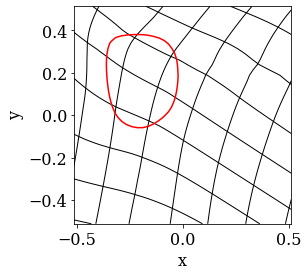

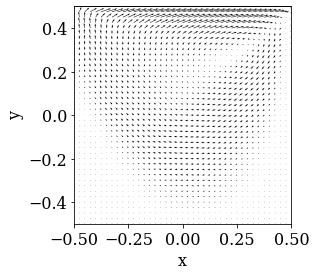

Level Set Advection Time:  0.004372119903564453
------------ Time = 3.3009999999997475 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3664707108479736e-13
Total poisson time : 0.00030612945556640625
Total INS time : 0.0035305023193359375
Max, Min, U   : 2.0, -0.1888851370448988
Max, Min, V   : 0.34605885651846846, -0.5078769680882583
Max, Min, P   : -16.74910656417331, -18.77217499166632
Max, Min, DIV : 3.552713678800501e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004382133483886719
------------ Time = 3.3019999999997474 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.732906852805746e-13
Total poisson time : 0.00023698806762695312
Total INS time : 0.0033600330352783203
Max, Min, U   : 2.0, -0.18888814037608823
Max, Min, V   : 0.34605870324686067, -0.5078796816088129
Max, Min, P   : -16.767100236935185, -18.790170548896366
Max, Min, DIV : 3.774758283725532e-15, -3.996802888650563

Max, Min, V   : 0.34605476557460013, -0.5079340696042048
Max, Min, P   : -16.92986523632546, -18.95340737920611
Max, Min, DIV : 3.885780586188048e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004374265670776367
------------ Time = 3.324999999999745 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.640426018065333e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.0041790008544921875
Max, Min, U   : 2.0, -0.18895834648941648
Max, Min, V   : 0.34605455679406083, -0.5079362785332032
Max, Min, P   : -16.912342964590476, -18.935896057966456
Max, Min, DIV : 3.552713678800501e-15, -4.3298697960381105e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004398822784423828
------------ Time = 3.3259999999997447 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.69008101359761e-13
Total poisson time : 0.0002677440643310547
Total INS time : 0.0034961700439453125
Max, Min, U 

Max, Min, DIV : 4.073130721593543e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004580497741699219
------------ Time = 3.3479999999997423 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5916867705645323e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0037949085235595703
Max, Min, U   : 2.0, -0.1891399210729228
Max, Min, V   : 0.34604936122246427, -0.5079814937942281
Max, Min, P   : -16.920914780258173, -18.944745521661194
Max, Min, DIV : 3.6637359812630166e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004327297210693359
------------ Time = 3.348999999999742 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5695205677385335e-14
Total poisson time : 0.0002434253692626953
Total INS time : 0.003325939178466797
Max, Min, U   : 2.0, -0.18915899764821434
Max, Min, V   : 0.3460491201021539, -0.5079832203637645
Max, Min, P   : -16.921580

Level Set Advection Time:  0.0043299198150634766
------------ Time = 3.36999999999974 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9949527064985215e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.0033044815063476562
Max, Min, U   : 2.0, -0.18955032176962117
Max, Min, V   : 0.3460435950625131, -0.5080143266964987
Max, Min, P   : -16.947840172273253, -18.972049579653966
Max, Min, DIV : 4.163336342344337e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004312038421630859
------------ Time = 3.3709999999997398 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.346879828683761e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.003988742828369141
Max, Min, U   : 2.0, -0.18956850650936735
Max, Min, V   : 0.3460433090178728, -0.5080155569571494
Max, Min, P   : -16.944172520187074, -18.96840219217886
Max, Min, DIV : 3.774758283725532e-15, -4.274358644806853e-

Level Set Advection Time:  0.004347562789916992
------------ Time = 3.3919999999997374 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.289471466077411e-13
Total poisson time : 0.0005896091461181641
Total INS time : 0.003945827484130859
Max, Min, U   : 2.0, -0.18994158810665307
Max, Min, V   : 0.34603695992057404, -0.5080363507790566
Max, Min, P   : -17.035723016692845, -19.06037153725412
Max, Min, DIV : 4.052314039881821e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004314899444580078
------------ Time = 3.3929999999997373 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.25208512519054e-14
Total poisson time : 0.00022864341735839844
Total INS time : 0.003412485122680664
Max, Min, U   : 2.0, -0.18995888033111566
Max, Min, V   : 0.34603663336217494, -0.5080370767278332
Max, Min, P   : -17.034523441923568, -19.059193804076365
Max, Min, DIV : 3.3306690738754696e-15, -3.7192471324942744

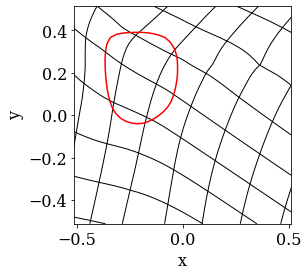

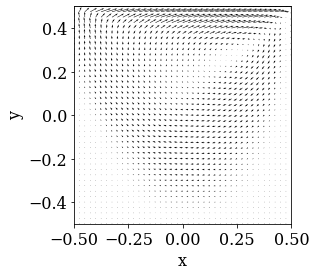

Level Set Advection Time:  0.004370212554931641
------------ Time = 3.4009999999997365 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.510416744448129e-13
Total poisson time : 0.00031113624572753906
Total INS time : 0.0037059783935546875
Max, Min, U   : 2.0, -0.19009567006843764
Max, Min, V   : 0.3460339418981759, -0.5080419907352822
Max, Min, P   : -17.042550265358813, -19.067358513045036
Max, Min, DIV : 4.163336342344337e-15, -3.9065972678997696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004324674606323242
------------ Time = 3.4019999999997363 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.79515499154939e-13
Total poisson time : 0.0002434253692626953
Total INS time : 0.0034339427947998047
Max, Min, U   : 2.0, -0.19011255883423417
Max, Min, V   : 0.3460335943414581, -0.5080424885390371
Max, Min, P   : -17.06841500815114, -19.093245155240655
Max, Min, DIV : 3.6637359812630166e-15, -4.274358644806853e

Level Set Advection Time:  0.0041425228118896484
------------ Time = 3.423999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.352292904249066e-13
Total poisson time : 0.0002219676971435547
Total INS time : 0.004227399826049805
Max, Min, U   : 2.0, -0.1905729833154943
Max, Min, V   : 0.3460251076328021, -0.5080460270499408
Max, Min, P   : -17.300802565527917, -19.32602143624202
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004149675369262695
------------ Time = 3.424999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2780106246271787e-12
Total poisson time : 0.00022077560424804688
Total INS time : 0.0033028125762939453
Max, Min, U   : 2.0, -0.19059386880515766
Max, Min, V   : 0.3460246853527625, -0.508045840114073
Max, Min, P   : -17.334538056116525, -19.3597808620876
Max, Min, DIV : 3.9968028886505635e-15, -2.8935187579293142e-15

Max, Min, U   : 2.0, -0.1910612265465865
Max, Min, V   : 0.3460144610264782, -0.5080340422176693
Max, Min, P   : -17.425538940770235, -19.45142958717316
Max, Min, DIV : 4.440892098500626e-15, -3.1086244689504383e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004133701324462891
------------ Time = 3.448999999999731 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.305490922711583e-13
Total poisson time : 0.0002193450927734375
Total INS time : 0.004151105880737305
Max, Min, U   : 2.0, -0.19108096711736608
Max, Min, V   : 0.3460139862682873, -0.5080331774099487
Max, Min, P   : -17.40410973945455, -19.43003229723725
Max, Min, DIV : 3.677613769070831e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004131317138671875
------------ Time = 3.449999999999731 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.222456905077524e-13
Total poisson time : 0.00021839141845703125
Total INS time

Level Set Advection Time:  0.004836082458496094
------------ Time = 3.4719999999997286 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.077566464750678e-13
Total poisson time : 0.00021886825561523438
Total INS time : 0.003461599349975586
Max, Min, U   : 2.0, -0.19151905502019287
Max, Min, V   : 0.3460022959786813, -0.5080046085219909
Max, Min, P   : -17.534018217857966, -19.56067771124401
Max, Min, DIV : 2.6645352591003757e-15, -3.4416913763379853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004124879837036133
------------ Time = 3.4729999999997285 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7099757657915513e-12
Total poisson time : 0.00022459030151367188
Total INS time : 0.0033986568450927734
Max, Min, U   : 2.0, -0.19153743406242693
Max, Min, V   : 0.346001760131618, -0.5080029982490852
Max, Min, P   : -17.578747472380485, -19.60544227692197
Max, Min, DIV : 3.594347042223944e-15, -3.552713678800501e

Max, Min, U   : 2.0, -0.19194526528890088
Max, Min, V   : 0.34598873523036755, -0.5079571968192105
Max, Min, P   : -17.685009166317414, -19.712424013957712
Max, Min, DIV : 4.107825191113079e-15, -4.215378046623641e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042362213134765625
------------ Time = 3.496999999999726 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.159637021995724e-13
Total poisson time : 0.00022029876708984375
Total INS time : 0.003855466842651367
Max, Min, U   : 2.0, -0.19196233826459963
Max, Min, V   : 0.3459881239694894, -0.5079547806143307
Max, Min, P   : -17.670701416477836, -19.69814865615622
Max, Min, DIV : 4.107825191113079e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004305362701416016
------------ Time = 3.4979999999997258 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.8151607653425725e-13
Total poisson time : 0.00022912025451660156
Total 

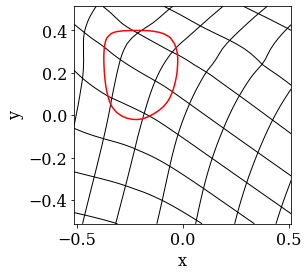

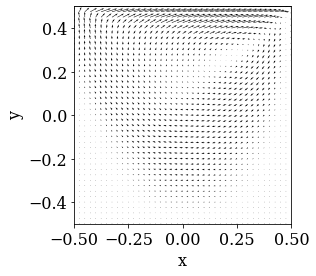

Level Set Advection Time:  0.004400014877319336
------------ Time = 3.5009999999997254 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.71333376496022e-13
Total poisson time : 0.00030112266540527344
Total INS time : 0.003420114517211914
Max, Min, U   : 2.0, -0.19203000033498616
Max, Min, V   : 0.3459856432129299, -0.5079447456000818
Max, Min, P   : -17.645974400326136, -19.673550967369277
Max, Min, DIV : 3.3306690738754696e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004294633865356445
------------ Time = 3.5019999999997253 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.664309202916857e-13
Total poisson time : 0.00023674964904785156
Total INS time : 0.00383758544921875
Max, Min, U   : 2.0, -0.19204675810136843
Max, Min, V   : 0.34598501424836187, -0.5079421441304008
Max, Min, P   : -17.658452521926197, -19.686061305536867
Max, Min, DIV : 4.440892098500626e-15, -4.163336342344337e-

Level Set Advection Time:  0.0043752193450927734
------------ Time = 3.5259999999997227 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.59948633244415e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.004687070846557617
Max, Min, U   : 2.0, -0.19243029081195553
Max, Min, V   : 0.3459689232360921, -0.5078684623651125
Max, Min, P   : -17.722085134406694, -19.75041206797899
Max, Min, DIV : 4.3298697960381105e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004336357116699219
------------ Time = 3.5269999999997226 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.331116201845165e-13
Total poisson time : 0.000232696533203125
Total INS time : 0.003373861312866211
Max, Min, U   : 2.0, -0.19244547339136064
Max, Min, V   : 0.3459682117393946, -0.5078649150945702
Max, Min, P   : -17.725794342160142, -19.754150980242663
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15


Level Set Advection Time:  0.004246711730957031
------------ Time = 3.54999999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.213000366539831e-13
Total poisson time : 0.00024890899658203125
Total INS time : 0.0046198368072509766
Max, Min, U   : 2.0, -0.19277793485341393
Max, Min, V   : 0.3459510638561147, -0.5077728249560077
Max, Min, P   : -17.85517656932385, -19.884063653034424
Max, Min, DIV : 3.774758283725532e-15, -3.70536934468646e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004400491714477539
------------ Time = 3.55099999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.317769410262305e-13
Total poisson time : 0.00022268295288085938
Total INS time : 0.0037817955017089844
Max, Min, U   : 2.0, -0.19279169231272633
Max, Min, V   : 0.3459502868463826, -0.5077683688627481
Max, Min, P   : -17.869570869706163, -19.89848544175255
Max, Min, DIV : 3.247402347028583e-15, -3.552713678800501e-15
Qi

Level Set Advection Time:  0.005268096923828125
------------ Time = 3.5739999999997174 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.066100648937247e-13
Total poisson time : 0.00022125244140625
Total INS time : 0.0036880970001220703
Max, Min, U   : 2.0, -0.19308983892487913
Max, Min, V   : 0.34593149217218444, -0.5076546800774223
Max, Min, P   : -18.09988607991251, -20.130427142655837
Max, Min, DIV : 3.7192471324942744e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004251956939697266
------------ Time = 3.5749999999997173 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.287454703030856e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.003514528274536133
Max, Min, U   : 2.0, -0.19310192321714237
Max, Min, V   : 0.3459306048114977, -0.5076491485615549
Max, Min, P   : -18.1168467327864, -20.14742238219625
Max, Min, DIV : 4.3298697960381105e-15, -3.941291737419306e-15


Level Set Advection Time:  0.00533294677734375
------------ Time = 3.5979999999997148 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.667166576478721e-13
Total poisson time : 0.00022220611572265625
Total INS time : 0.0038323402404785156
Max, Min, U   : 2.0, -0.19335676898839993
Max, Min, V   : 0.3459082904921632, -0.507505963835936
Max, Min, P   : -18.237068769033066, -20.268607548590513
Max, Min, DIV : 3.913536161803677e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004386186599731445
------------ Time = 3.5989999999997146 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2048714711353608e-13
Total poisson time : 0.0002319812774658203
Total INS time : 0.004082679748535156
Max, Min, U   : 2.0, -0.19336695638272258
Max, Min, V   : 0.3459072708056776, -0.5074991187969341
Max, Min, P   : -18.23385079149001, -20.265406500383932
Max, Min, DIV : 3.552713678800501e-15, -3.3306690738754696e-1

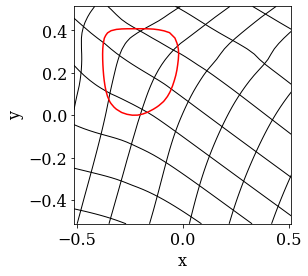

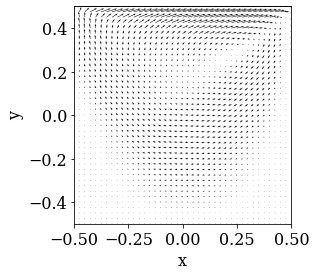

Level Set Advection Time:  0.0043163299560546875
------------ Time = 3.6009999999997144 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1090439587496523e-13
Total poisson time : 0.0003077983856201172
Total INS time : 0.003541231155395508
Max, Min, U   : 2.0, -0.19338710648388846
Max, Min, V   : 0.3459052216140598, -0.5074852819317223
Max, Min, P   : -18.282403306713086, -20.313992256788882
Max, Min, DIV : 3.83026943495679e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042438507080078125
------------ Time = 3.6019999999997143 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7750954494568032e-13
Total poisson time : 0.0002307891845703125
Total INS time : 0.003394603729248047
Max, Min, U   : 2.0, -0.1933970691417082
Max, Min, V   : 0.34590419212107315, -0.5074782901199906
Max, Min, P   : -18.287148264703443, -20.318753548574097
Max, Min, DIV : 4.440892098500626e-15, -3.9968028886505635

Level Set Advection Time:  0.005341291427612305
------------ Time = 3.624999999999712 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3048793077624402e-13
Total poisson time : 0.00022149085998535156
Total INS time : 0.0032672882080078125
Max, Min, U   : 2.0, -0.19360207885818193
Max, Min, V   : 0.3458791171257015, -0.5073020624845842
Max, Min, P   : -18.420218468827688, -20.45215072311189
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004422426223754883
------------ Time = 3.6259999999997117 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.301114037176719e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.0033812522888183594
Max, Min, U   : 2.0, -0.19360999857205755
Max, Min, V   : 0.3458779708719337, -0.5072937360528413
Max, Min, P   : -18.441002487357395, -20.472948405299515
Max, Min, DIV : 3.6637359812630166e-15, -3.774758283725532e

Level Set Advection Time:  0.0052835941314697266
------------ Time = 3.6479999999997093 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3058835354832643e-13
Total poisson time : 0.0002219676971435547
Total INS time : 0.0035262107849121094
Max, Min, U   : 2.0, -0.19384246423100657
Max, Min, V   : 0.3458515023020807, -0.5070959046423422
Max, Min, P   : -18.552662635993098, -20.58494260445211
Max, Min, DIV : 3.6637359812630166e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00419926643371582
------------ Time = 3.648999999999709 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3558681405981887e-13
Total poisson time : 0.00022554397583007812
Total INS time : 0.003489255905151367
Max, Min, U   : 2.0, -0.19385248969539703
Max, Min, V   : 0.3458502414547752, -0.5070862383193836
Max, Min, P   : -18.55646605793579, -20.58876564512022
Max, Min, DIV : 3.774758283725532e-15, -3.3306690738754696e-

Level Set Advection Time:  0.005150556564331055
------------ Time = 3.6719999999997066 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.794123327855894e-13
Total poisson time : 0.00022149085998535156
Total INS time : 0.0034139156341552734
Max, Min, U   : 2.0, -0.19406178889555592
Max, Min, V   : 0.34582013564534014, -0.5068481308350411
Max, Min, P   : -18.749672404871454, -20.782426728245454
Max, Min, DIV : 3.941291737419306e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004238128662109375
------------ Time = 3.6729999999997065 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.301037351302133e-14
Total poisson time : 0.00022530555725097656
Total INS time : 0.003239154815673828
Max, Min, U   : 2.0, -0.19406995236898442
Max, Min, V   : 0.3458187653342559, -0.5068370559462072
Max, Min, P   : -18.74797013304673, -20.780746629397445
Max, Min, DIV : 2.7200464103316335e-15, -3.136380044566067

Level Set Advection Time:  0.004644632339477539
------------ Time = 3.695999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.652286802296523e-13
Total poisson time : 0.00021982192993164062
Total INS time : 0.0038819313049316406
Max, Min, U   : 2.0, -0.19423471443634277
Max, Min, V   : 0.3457856364561508, -0.5065642273511519
Max, Min, P   : -18.899676110296866, -20.93359654551236
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043201446533203125
------------ Time = 3.696999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.408450803599328e-13
Total poisson time : 0.000240325927734375
Total INS time : 0.0032498836517333984
Max, Min, U   : 2.0, -0.19424087361678744
Max, Min, V   : 0.3457841356051825, -0.5065515915030762
Max, Min, P   : -18.908878868133055, -20.942833014832686
Max, Min, DIV : 3.858025010572419e-15, -3.885780586188048e-1

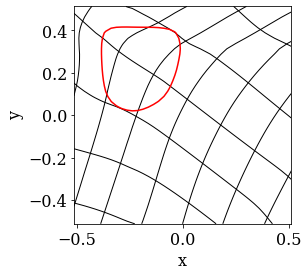

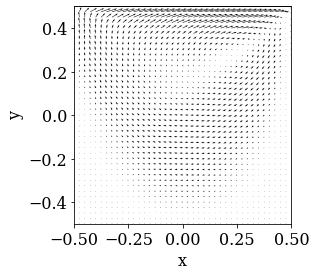

Level Set Advection Time:  0.004377126693725586
------------ Time = 3.7009999999997034 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0381484875729178e-13
Total poisson time : 0.00030803680419921875
Total INS time : 0.0034601688385009766
Max, Min, U   : 2.0, -0.19426468258728108
Max, Min, V   : 0.3457780970295554, -0.506500441075201
Max, Min, P   : -18.92335435566976, -20.95766308482312
Max, Min, DIV : 3.552713678800501e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042607784271240234
------------ Time = 3.7019999999997033 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3353511230909558e-12
Total poisson time : 0.000232696533203125
Total INS time : 0.003505229949951172
Max, Min, U   : 2.0, -0.19427041827006555
Max, Min, V   : 0.3457765742481891, -0.5064874884859116
Max, Min, P   : -18.88618152456175, -20.92052672583954
Max, Min, DIV : 3.7192471324942744e-15, -3.885780586188048e-1

Level Set Advection Time:  0.005377292633056641
------------ Time = 3.7249999999997008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5110224796142784e-13
Total poisson time : 0.00021982192993164062
Total INS time : 0.003225564956665039
Max, Min, U   : 2.0, -0.1943818404755728
Max, Min, V   : 0.34574028464724477, -0.5061719217847204
Max, Min, P   : -19.109653084529217, -21.145098520200015
Max, Min, DIV : 4.107825191113079e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004341840744018555
------------ Time = 3.7259999999997007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.226826735682445e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0033392906188964844
Max, Min, U   : 2.0, -0.19438567243459365
Max, Min, V   : 0.34573862629117313, -0.5061573416840894
Max, Min, P   : -19.10094901705354, -21.136448739559448
Max, Min, DIV : 3.774758283725532e-15, -3.73225755856410

Level Set Advection Time:  0.005072355270385742
------------ Time = 3.7479999999996982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2094382613958883e-12
Total poisson time : 0.00021958351135253906
Total INS time : 0.0032422542572021484
Max, Min, U   : 2.0, -0.19444677662693458
Max, Min, V   : 0.3457004813281554, -0.5058175925449805
Max, Min, P   : -19.1931059808751, -21.229739485578328
Max, Min, DIV : 3.83026943495679e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044405460357666016
------------ Time = 3.748999999999698 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0140568188636098e-13
Total poisson time : 0.000476837158203125
Total INS time : 0.007861614227294922
Max, Min, U   : 2.0, -0.1944485007567892
Max, Min, V   : 0.34569867390796716, -0.5058012749702399
Max, Min, P   : -19.19059815977716, -21.2272817684815
Max, Min, DIV : 4.310787837802366e-15, -4.246603069191224e-15
Q

Level Set Advection Time:  0.0042095184326171875
------------ Time = 3.7719999999996956 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4123016454173184e-13
Total poisson time : 0.00022292137145996094
Total INS time : 0.004248142242431641
Max, Min, U   : 2.0, -0.19446201430647686
Max, Min, V   : 0.34565499250066284, -0.5054033028256593
Max, Min, P   : -19.259983485021383, -21.29783176780627
Max, Min, DIV : 3.6637359812630166e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004330635070800781
------------ Time = 3.7729999999996955 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.57116116185594e-13
Total poisson time : 0.0002200603485107422
Total INS time : 0.0038175582885742188
Max, Min, U   : 2.0, -0.19446136883023224
Max, Min, V   : 0.3456529739103309, -0.505384897620043
Max, Min, P   : -19.267161470436783, -21.305056020443057
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501

Level Set Advection Time:  0.004876852035522461
------------ Time = 3.795999999999693 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7080453998249449e-13
Total poisson time : 0.00022101402282714844
Total INS time : 0.0034945011138916016
Max, Min, U   : 2.0, -0.194428718876195
Max, Min, V   : 0.34560477908048065, -0.5049369611129556
Max, Min, P   : -19.41885363631158, -21.45807158297426
Max, Min, DIV : 3.802513859341161e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004228353500366211
------------ Time = 3.796999999999693 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.9939769663996966e-15
Total poisson time : 0.00022935867309570312
Total INS time : 0.0032269954681396484
Max, Min, U   : 2.0, -0.19442944098598586
Max, Min, V   : 0.3456025886463408, -0.5049163843962261
Max, Min, P   : -19.418769295842438, -21.45803362707125
Max, Min, DIV : 3.885780586188048e-15, -3.6637359812630166e-1

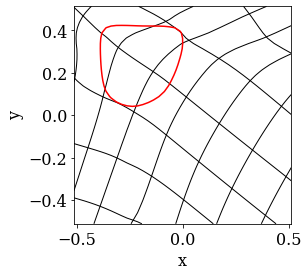

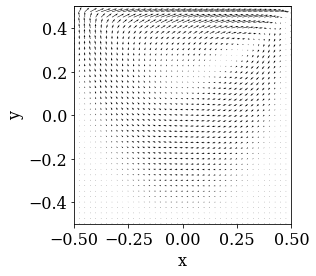

Level Set Advection Time:  0.004309654235839844
------------ Time = 3.8009999999996924 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.900580815872047e-13
Total poisson time : 0.00030493736267089844
Total INS time : 0.003478527069091797
Max, Min, U   : 2.0, -0.19443151261294744
Max, Min, V   : 0.34559372615232, -0.5048330978100547
Max, Min, P   : -19.401752451995858, -21.441195176526804
Max, Min, DIV : 4.3021142204224816e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004275798797607422
------------ Time = 3.8019999999996923 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.462622180001364e-13
Total poisson time : 0.00023484230041503906
Total INS time : 0.004141569137573242
Max, Min, U   : 2.0, -0.19443184210485562
Max, Min, V   : 0.3455914870627831, -0.5048120345446468
Max, Min, P   : -19.386629201492685, -21.426120095272758
Max, Min, DIV : 4.246603069191224e-15, -2.886579864025407e-1

Level Set Advection Time:  0.0042726993560791016
------------ Time = 3.8249999999996898 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6840146188157078e-12
Total poisson time : 0.00028014183044433594
Total INS time : 0.00459742546081543
Max, Min, U   : 2.0, -0.1944160374006589
Max, Min, V   : 0.3455375963977232, -0.5043007477301003
Max, Min, P   : -19.616065467981304, -21.656398407861534
Max, Min, DIV : 3.83026943495679e-15, -3.497202527569243e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043218135833740234
------------ Time = 3.8259999999996896 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1151332722170697e-13
Total poisson time : 0.00022459030151367188
Total INS time : 0.003381490707397461
Max, Min, U   : 2.0, -0.19441433927347723
Max, Min, V   : 0.34553516100389736, -0.5042773643701906
Max, Min, P   : -19.613128544039867, -21.653521651335684
Max, Min, DIV : 3.9968028886505635e-15, -3.55271367880050

Level Set Advection Time:  0.004288673400878906
------------ Time = 3.8479999999996872 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.169629229710868e-13
Total poisson time : 0.00023317337036132812
Total INS time : 0.0039386749267578125
Max, Min, U   : 2.0, -0.19435501814689213
Max, Min, V   : 0.34547848959111294, -0.5037341598892282
Max, Min, P   : -19.779343203165073, -21.820294314578447
Max, Min, DIV : 3.913536161803677e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004162311553955078
------------ Time = 3.848999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.887435991877964e-13
Total poisson time : 0.00022029876708984375
Total INS time : 0.0032088756561279297
Max, Min, U   : 2.0, -0.1943512838403853
Max, Min, V   : 0.345475806590267, -0.5037082104531844
Max, Min, P   : -19.751892040954683, -21.792863131460066
Max, Min, DIV : 3.552713678800501e-15, -4.440892098500626e-

Level Set Advection Time:  0.00502467155456543
------------ Time = 3.8719999999996846 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.518591948976497e-13
Total poisson time : 0.00021767616271972656
Total INS time : 0.003904104232788086
Max, Min, U   : 2.0, -0.19424020665456534
Max, Min, V   : 0.34541206336044167, -0.5030820086396655
Max, Min, P   : -19.908281878272703, -21.949553860319973
Max, Min, DIV : 3.2890357104520263e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004196643829345703
------------ Time = 3.8729999999996845 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.060643264569449e-14
Total poisson time : 0.00022101402282714844
Total INS time : 0.0033304691314697266
Max, Min, U   : 2.0, -0.19423427295718987
Max, Min, V   : 0.3454091916197146, -0.5030534584192498
Max, Min, P   : -19.91031486638284, -21.951607937223436
Max, Min, DIV : 4.3298697960381105e-15, -3.330669073875469

Level Set Advection Time:  0.0043184757232666016
------------ Time = 3.895999999999682 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.033517865227114e-13
Total poisson time : 0.00022339820861816406
Total INS time : 0.004000663757324219
Max, Min, U   : 2.0, -0.19406978329990515
Max, Min, V   : 0.3453439467055893, -0.5023741813052841
Max, Min, P   : -20.064162819442185, -22.10507061214687
Max, Min, DIV : 3.7192471324942744e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042743682861328125
------------ Time = 3.896999999999682 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5137334619926288e-14
Total poisson time : 0.0002307891845703125
Total INS time : 0.00328826904296875
Max, Min, U   : 2.0, -0.194061531521677
Max, Min, V   : 0.3453410264006178, -0.5023434530952017
Max, Min, P   : -20.064640725429655, -22.105538932175115
Max, Min, DIV : 3.164135620181696e-15, -3.83026943495679e-15


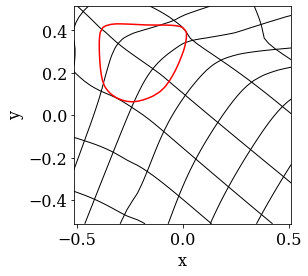

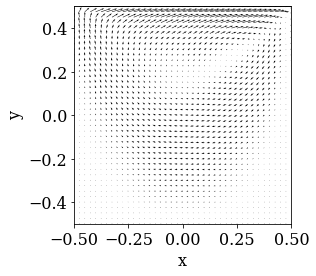

Level Set Advection Time:  0.0044422149658203125
------------ Time = 3.9009999999996814 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.879212648433126e-13
Total poisson time : 0.00032210350036621094
Total INS time : 0.003469705581665039
Max, Min, U   : 2.0, -0.19402755061543267
Max, Min, V   : 0.3453291416214591, -0.5022191495318105
Max, Min, P   : -20.121412571827296, -22.162265433087125
Max, Min, DIV : 3.982925100842749e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004312753677368164
------------ Time = 3.9019999999996813 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9775833205861027e-13
Total poisson time : 0.0002391338348388672
Total INS time : 0.003606557846069336
Max, Min, U   : 2.0, -0.19401873216115673
Max, Min, V   : 0.34532608263362785, -0.5021876022169701
Max, Min, P   : -20.126550806417022, -22.167389821588984
Max, Min, DIV : 3.774758283725532e-15, -3.996802888650563

Level Set Advection Time:  0.0041882991790771484
------------ Time = 3.9249999999996787 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.160377091638508e-13
Total poisson time : 0.00021910667419433594
Total INS time : 0.0042231082916259766
Max, Min, U   : 2.0, -0.193786278372017
Max, Min, V   : 0.34525139784194486, -0.5014234106171356
Max, Min, P   : -20.34732190070876, -22.38908445513011
Max, Min, DIV : 3.774758283725532e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004173755645751953
------------ Time = 3.9259999999996786 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.06479669495104e-13
Total poisson time : 0.00022125244140625
Total INS time : 0.0032165050506591797
Max, Min, U   : 2.0, -0.1937749974074242
Max, Min, V   : 0.3452479641436162, -0.501388480877548
Max, Min, P   : -20.331031403310718, -22.372757244134597
Max, Min, DIV : 3.95516952522712e-15, -3.885780586188048e-15
Qin,

Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00417637825012207
------------ Time = 3.949999999999676 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.746437000736898e-13
Total poisson time : 0.0002276897430419922
Total INS time : 0.003911018371582031
Max, Min, U   : 2.0, -0.1935577947908441
Max, Min, V   : 0.34516009585753477, -0.5005027708181286
Max, Min, P   : -20.42277201689021, -22.464043794172124
Max, Min, DIV : 4.052314039881821e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004169940948486328
------------ Time = 3.950999999999676 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5541487941001896e-13
Total poisson time : 0.0002193450927734375
Total INS time : 0.0032269954681396484
Max, Min, U   : 2.0, -0.19354903057361222
Max, Min, V   : 0.3451562286126226, -0.5004638853888118
Max, Min, P   : -20.432495548761736, -22.473700613315607
Max, Min, DIV : 4.121702978920894e-1

Level Set Advection Time:  0.004761695861816406
------------ Time = 3.9729999999996735 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.383661710642747e-13
Total poisson time : 0.0002181529998779297
Total INS time : 0.003326892852783203
Max, Min, U   : 2.0, -0.1933378952557448
Max, Min, V   : 0.34506786076239115, -0.49956900553099
Max, Min, P   : -20.661272008362875, -22.701041823686698
Max, Min, DIV : 3.774758283725532e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004176139831542969
------------ Time = 3.9739999999996733 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.893111263612089e-14
Total poisson time : 0.0002205371856689453
Total INS time : 0.0032384395599365234
Max, Min, U   : 2.0, -0.1933274261813188
Max, Min, V   : 0.3450637450515731, -0.4995266664361384
Max, Min, P   : -20.663225240261372, -22.702928145751258
Max, Min, DIV : 4.3298697960381105e-15, -3.885780586188048e-15

Level Set Advection Time:  0.004754066467285156
------------ Time = 3.996999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.768291061311763e-13
Total poisson time : 0.00022268295288085938
Total INS time : 0.0034439563751220703
Max, Min, U   : 2.0, -0.19305485925430393
Max, Min, V   : 0.34497241405750495, -0.49856136667954415
Max, Min, P   : -20.883870318349057, -22.92225190837298
Max, Min, DIV : 3.552713678800501e-15, -3.3861802251067274e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004168272018432617
------------ Time = 3.9979999999996707 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.83468128216101e-14
Total poisson time : 0.00022411346435546875
Total INS time : 0.003482818603515625
Max, Min, U   : 2.0, -0.19304207029435783
Max, Min, V   : 0.34496833268645505, -0.4985261362362339
Max, Min, P   : -20.885021990078098, -22.923332113371885
Max, Min, DIV : 3.3306690738754696e-15, -3.88578058618804

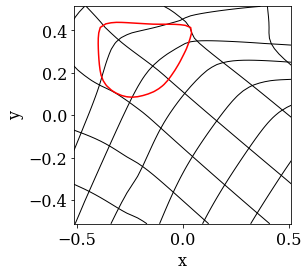

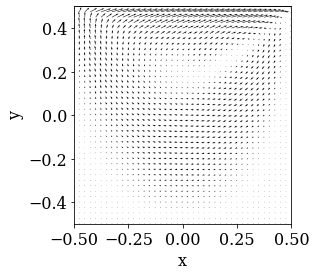

Level Set Advection Time:  0.004332065582275391
------------ Time = 4.000999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.179559555783838e-13
Total poisson time : 0.00030493736267089844
Total INS time : 0.003434419631958008
Max, Min, U   : 2.0, -0.19300335931501358
Max, Min, V   : 0.3449558973357961, -0.4984195323133864
Max, Min, P   : -20.920510815754593, -22.958642446374636
Max, Min, DIV : 4.440892098500626e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042724609375
------------ Time = 4.001999999999671 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1800712208412675e-13
Total poisson time : 0.0002429485321044922
Total INS time : 0.0034074783325195312
Max, Min, U   : 2.0, -0.1929903479651034
Max, Min, V   : 0.3449516898936813, -0.4983836917217842
Max, Min, P   : -20.92635777104835, -22.964381830502923
Max, Min, DIV : 3.885780586188048e-15, -3.774758283725532e-15
Qin,



Level Set Advection Time:  0.004164934158325195
------------ Time = 4.025999999999679 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2279055434215169e-13
Total poisson time : 0.0002243518829345703
Total INS time : 0.003714323043823242
Max, Min, U   : 2.0, -0.1926602692192577
Max, Min, V   : 0.3448422314281395, -0.4974760614418336
Max, Min, P   : -21.091727324178926, -23.12811787419539
Max, Min, DIV : 3.95516952522712e-15, -3.9343528435153985e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00417780876159668
------------ Time = 4.0269999999996795 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2253576044769393e-12
Total poisson time : 0.0002186298370361328
Total INS time : 0.003208637237548828
Max, Min, U   : 2.0, -0.19264576284761611
Max, Min, V   : 0.34483734485436995, -0.49743621350920486
Max, Min, P   : -21.124694693301436, -23.16101849506791
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e-1

Level Set Advection Time:  0.0047795772552490234
------------ Time = 4.048999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.025674685143404e-13
Total poisson time : 0.00021791458129882812
Total INS time : 0.0033948421478271484
Max, Min, U   : 2.0, -0.19230947707959953
Max, Min, V   : 0.3447248031437527, -0.49651903153383636
Max, Min, P   : -21.161834681644734, -23.19679580518794
Max, Min, DIV : 4.218847493575595e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042607784271240234
------------ Time = 4.049999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5901946006680767e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0034804344177246094
Max, Min, U   : 2.0, -0.19229329876086984
Max, Min, V   : 0.3447195554818437, -0.4964757112592469
Max, Min, P   : -21.16884711493231, -23.20373995747842
Max, Min, DIV : 3.83026943495679e-15, -3.885780586188048e-

Level Set Advection Time:  0.004831552505493164
------------ Time = 4.072999999999695 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0718123623608079e-14
Total poisson time : 0.00021767616271972656
Total INS time : 0.0032927989959716797
Max, Min, U   : 2.0, -0.19189138200728606
Max, Min, V   : 0.3446063888819778, -0.4954646028452026
Max, Min, P   : -21.247489800171042, -23.280770702523697
Max, Min, DIV : 4.121702978920894e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041961669921875
------------ Time = 4.073999999999695 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.165037938852973e-14
Total poisson time : 0.0002205371856689453
Total INS time : 0.003199338912963867
Max, Min, U   : 2.0, -0.1918729576678795
Max, Min, V   : 0.3446011778529244, -0.4954189089249757
Max, Min, P   : -21.24844814842111, -23.28165382650246
Max, Min, DIV : 3.816391647148976e-15, -3.774758283725532e-15
Qin

Level Set Advection Time:  0.004746437072753906
------------ Time = 4.096999999999703 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.137875035167045e-14
Total poisson time : 0.00022983551025390625
Total INS time : 0.003365039825439453
Max, Min, U   : 2.0, -0.19143529844648083
Max, Min, V   : 0.34447262443335486, -0.49431784456522715
Max, Min, P   : -21.38415584325473, -23.41555497841803
Max, Min, DIV : 3.816391647148976e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041620731353759766
------------ Time = 4.097999999999703 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5136286203665894e-13
Total poisson time : 0.00021910667419433594
Total INS time : 0.0037801265716552734
Max, Min, U   : 2.0, -0.19141670451571066
Max, Min, V   : 0.344467062165761, -0.4942688073812696
Max, Min, P   : -21.377495760369204, -23.40880243409595
Max, Min, DIV : 2.7755575615628914e-15, -3.552713678800501e

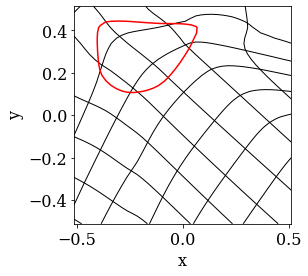

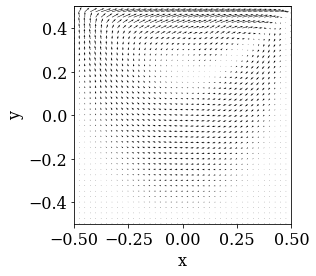

Level Set Advection Time:  0.004309177398681641
------------ Time = 4.100999999999704 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.751926516254193e-13
Total poisson time : 0.0003070831298828125
Total INS time : 0.003418445587158203
Max, Min, U   : 2.0, -0.19138037731824678
Max, Min, V   : 0.34445004103769516, -0.49412033377297543
Max, Min, P   : -21.401204793340952, -23.432235286100934
Max, Min, DIV : 4.218847493575595e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00432133674621582
------------ Time = 4.1019999999997045 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2497974068525858e-12
Total poisson time : 0.00023746490478515625
Total INS time : 0.0033996105194091797
Max, Min, U   : 2.0, -0.19136823767115096
Max, Min, V   : 0.3444442619630458, -0.49407039244934947
Max, Min, P   : -21.43431128665475, -23.465263727334865
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e

Level Set Advection Time:  0.0048367977142333984
------------ Time = 4.124999999999712 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.064165799279888e-13
Total poisson time : 0.00022721290588378906
Total INS time : 0.003679513931274414
Max, Min, U   : 2.0, -0.1910800193082448
Max, Min, V   : 0.3443000224208651, -0.4928610887841954
Max, Min, P   : -21.528001231472164, -23.556776988991118
Max, Min, DIV : 3.164135620181696e-15, -3.802513859341161e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041964054107666016
------------ Time = 4.125999999999713 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2044756066061249e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.0032701492309570312
Max, Min, U   : 2.0, -0.19106709506344804
Max, Min, V   : 0.3442934154527119, -0.4928060998439642
Max, Min, P   : -21.524898718850384, -23.553578773828754
Max, Min, DIV : 4.052314039881821e-15, -3.6637359812630166e

Level Set Advection Time:  0.004790544509887695
------------ Time = 4.14899999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.07034475662405e-13
Total poisson time : 0.00022554397583007812
Total INS time : 0.0033311843872070312
Max, Min, U   : 2.0, -0.1907551030722982
Max, Min, V   : 0.3441516738988769, -0.4915206815514718
Max, Min, P   : -21.607806813172914, -23.63466827992186
Max, Min, DIV : 3.858025010572419e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041980743408203125
------------ Time = 4.149999999999721 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.29680986556428e-13
Total poisson time : 0.00022149085998535156
Total INS time : 0.003309011459350586
Max, Min, U   : 2.0, -0.19074041579119028
Max, Min, V   : 0.3441472601095511, -0.4914670904799819
Max, Min, P   : -21.61936299363361, -23.646082931252707
Max, Min, DIV : 3.2751579226442118e-15, -3.552713678800501e-15
Qi

Level Set Advection Time:  0.004780769348144531
------------ Time = 4.172999999999728 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.430229523565534e-13
Total poisson time : 0.0002238750457763672
Total INS time : 0.0033736228942871094
Max, Min, U   : 2.0, -0.1903977581296098
Max, Min, V   : 0.3440072705910921, -0.4901350923028228
Max, Min, P   : -21.850058721358653, -23.87397648313578
Max, Min, DIV : 4.052314039881821e-15, -4.3298697960381105e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00427699089050293
------------ Time = 4.173999999999729 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.77643384379247e-14
Total poisson time : 0.0002353191375732422
Total INS time : 0.003313302993774414
Max, Min, U   : 2.0, -0.19038256922799568
Max, Min, V   : 0.34399993050378114, -0.49007314380016687
Max, Min, P   : -21.85261582050615, -23.876416736047883
Max, Min, DIV : 4.218847493575595e-15, -4.218847493575595e-15
Qi

Level Set Advection Time:  0.004894733428955078
------------ Time = 4.196999999999736 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2701679495672125e-12
Total poisson time : 0.00023746490478515625
Total INS time : 0.0033905506134033203
Max, Min, U   : 2.0, -0.1900241108419691
Max, Min, V   : 0.34382434090391784, -0.4885905505249416
Max, Min, P   : -21.93643814413511, -23.958468938922316
Max, Min, DIV : 4.440892098500626e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004181623458862305
------------ Time = 4.197999999999737 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.861302220785564e-14
Total poisson time : 0.00023412704467773438
Total INS time : 0.003356456756591797
Max, Min, U   : 2.0, -0.19000782860874002
Max, Min, V   : 0.34381689870047083, -0.4885249224520808
Max, Min, P   : -21.938125771056512, -23.960058752587145
Max, Min, DIV : 3.4416913763379853e-15, -4.218847493575595e

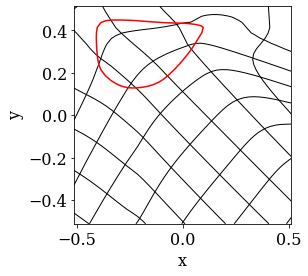

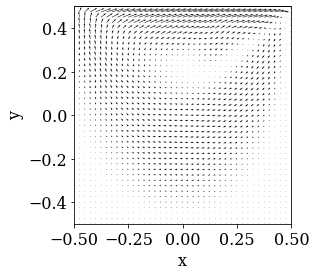

Level Set Advection Time:  0.004486560821533203
------------ Time = 4.200999999999738 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8436325128040513e-13
Total poisson time : 0.00030612945556640625
Total INS time : 0.0035152435302734375
Max, Min, U   : 2.0, -0.18995887585370622
Max, Min, V   : 0.3437942988727918, -0.48832662161080725
Max, Min, P   : -21.911957671834248, -23.933549004561563
Max, Min, DIV : 3.774758283725532e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004414081573486328
------------ Time = 4.201999999999738 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0228567482876052e-12
Total poisson time : 0.00024175643920898438
Total INS time : 0.0033850669860839844
Max, Min, U   : 2.0, -0.18994251626883302
Max, Min, V   : 0.3437866858427263, -0.4882600651843822
Max, Min, P   : -21.88497708161188, -23.906470351781383
Max, Min, DIV : 3.95516952522712e-15, -3.552713678800501e

Level Set Advection Time:  0.004776477813720703
------------ Time = 4.224999999999746 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5772136593776165e-13
Total poisson time : 0.00021910667419433594
Total INS time : 0.0033435821533203125
Max, Min, U   : 2.0, -0.18955973751880348
Max, Min, V   : 0.3453685135007726, -0.4866747089753633
Max, Min, P   : -21.928330437722153, -23.947572755354386
Max, Min, DIV : 4.1772141301521515e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004225969314575195
------------ Time = 4.225999999999746 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.495258038614482e-13
Total poisson time : 0.00022220611572265625
Total INS time : 0.003282308578491211
Max, Min, U   : 2.0, -0.18954270828129924
Max, Min, V   : 0.34549852636916684, -0.48660312057504906
Max, Min, P   : -21.94514922708635, -23.964310676972083
Max, Min, DIV : 3.885780586188048e-15, -3.941291737419306

Level Set Advection Time:  0.004961967468261719
------------ Time = 4.247999999999753 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6640406490042187e-13
Total poisson time : 0.00022268295288085938
Total INS time : 0.003328561782836914
Max, Min, U   : 2.0, -0.18914605047988775
Max, Min, V   : 0.34818506719213865, -0.4851530799298781
Max, Min, P   : -22.004373654825134, -24.02163501553954
Max, Min, DIV : 3.552713678800501e-15, -3.1502578323738817e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00423741340637207
------------ Time = 4.248999999999754 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.596056952460362e-14
Total poisson time : 0.00023055076599121094
Total INS time : 0.0034165382385253906
Max, Min, U   : 2.0, -0.18912779803076415
Max, Min, V   : 0.3482999445340715, -0.48508455215828117
Max, Min, P   : -22.005501405230163, -24.023216770178962
Max, Min, DIV : 4.163336342344337e-15, -4.052314039881821e

Level Set Advection Time:  0.004314899444580078
------------ Time = 4.271999999999761 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.007447317150035e-14
Total poisson time : 0.00023555755615234375
Total INS time : 0.00475311279296875
Max, Min, U   : 2.0, -0.18870453391345257
Max, Min, V   : 0.35124821517513977, -0.48338158856589175
Max, Min, P   : -22.173277247561458, -24.188516101405227
Max, Min, DIV : 3.6637359812630166e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004248857498168945
------------ Time = 4.272999999999762 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0651932163092762e-13
Total poisson time : 0.0002231597900390625
Total INS time : 0.003358125686645508
Max, Min, U   : 2.0, -0.18868586611108107
Max, Min, V   : 0.3514001954192747, -0.48330282007667347
Max, Min, P   : -22.170529007865806, -24.185652348929906
Max, Min, DIV : 3.9968028886505635e-15, -3.663735981263016

Level Set Advection Time:  0.005217790603637695
------------ Time = 4.295999999999769 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1166622698243001e-12
Total poisson time : 0.0002238750457763672
Total INS time : 0.0033423900604248047
Max, Min, U   : 2.0, -0.18824701913238923
Max, Min, V   : 0.35466765823241336, -0.4814482309455749
Max, Min, P   : -22.18339842647059, -24.1968072105458
Max, Min, DIV : 3.913536161803677e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043370723724365234
------------ Time = 4.29699999999977 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.77728128662118e-13
Total poisson time : 0.00023126602172851562
Total INS time : 0.0033669471740722656
Max, Min, U   : 2.0, -0.1882272562237649
Max, Min, V   : 0.35479980244795273, -0.4813686249274735
Max, Min, P   : -22.191127224095325, -24.204476994768978
Max, Min, DIV : 4.066191827689636e-15, -4.142519660632615e-15


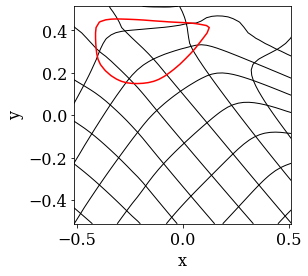

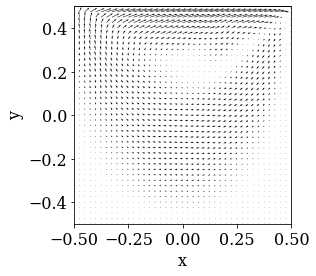

Level Set Advection Time:  0.0044498443603515625
------------ Time = 4.300999999999771 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.004496415309599e-13
Total poisson time : 0.00030994415283203125
Total INS time : 0.0034945011138916016
Max, Min, U   : 2.0, -0.18814800243405413
Max, Min, V   : 0.3553203427276831, -0.4810488198453476
Max, Min, P   : -22.24044404028757, -24.253460255520118
Max, Min, DIV : 4.163336342344337e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004398822784423828
------------ Time = 4.301999999999771 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.395793269514545e-13
Total poisson time : 0.0002396106719970703
Total INS time : 0.003396272659301758
Max, Min, U   : 2.0, -0.18812813714899196
Max, Min, V   : 0.3554484596815355, -0.4809685351037835
Max, Min, P   : -22.255398449141865, -24.268328612074207
Max, Min, DIV : 4.107825191113079e-15, -4.0245584642661925e-1

Max, Min, DIV : 3.608224830031759e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00425410270690918
------------ Time = 4.324999999999779 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.258226310015989e-13
Total poisson time : 0.00022983551025390625
Total INS time : 0.0035872459411621094
Max, Min, U   : 2.0, -0.1876657775441349
Max, Min, V   : 0.35852362826752815, -0.4790876666694423
Max, Min, P   : -22.3735323539871, -24.384377968362855
Max, Min, DIV : 4.218847493575595e-15, -3.608224830031759e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004300117492675781
------------ Time = 4.325999999999779 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2671691343652718e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.0033452510833740234
Max, Min, U   : 2.0, -0.1876454057728517
Max, Min, V   : 0.35863104068097135, -0.47900456310353634
Max, Min, P   : -22.37037473

Level Set Advection Time:  0.004216432571411133
------------ Time = 4.348999999999787 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.501758864284613e-13
Total poisson time : 0.0002231597900390625
Total INS time : 0.004595518112182617
Max, Min, U   : 2.0, -0.18715873246621037
Max, Min, V   : 0.36095391802072563, -0.4773364180687987
Max, Min, P   : -22.32687561738642, -24.334866823531303
Max, Min, DIV : 4.385380947269368e-15, -3.83026943495679e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004221200942993164
------------ Time = 4.349999999999787 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.802628622374257e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.0036416053771972656
Max, Min, U   : 2.0, -0.18713767940245063
Max, Min, V   : 0.3610456802244189, -0.4772558748783676
Max, Min, P   : -22.3082698654531, -24.31604954308713
Max, Min, DIV : 4.3298697960381105e-15, -4.3298697960381105e-15
Q

Level Set Advection Time:  0.004261016845703125
------------ Time = 4.372999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1911307157935753e-13
Total poisson time : 0.0002269744873046875
Total INS time : 0.003987789154052734
Max, Min, U   : 2.0, -0.18665120490280185
Max, Min, V   : 0.362917419576481, -0.4752546749438053
Max, Min, P   : -22.40770009887193, -24.41113411053417
Max, Min, DIV : 4.107825191113079e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00424957275390625
------------ Time = 4.373999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.008481989948427e-13
Total poisson time : 0.00022411346435546875
Total INS time : 0.0033283233642578125
Max, Min, U   : 2.0, -0.18662972406261671
Max, Min, V   : 0.36298843711815115, -0.47516292165126084
Max, Min, P   : -22.421351728189713, -24.424596881464048
Max, Min, DIV : 3.608224830031759e-15, -3.913536161803677e-15

Level Set Advection Time:  0.004879474639892578
------------ Time = 4.396999999999803 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.041169858459171e-14
Total poisson time : 0.00021791458129882812
Total INS time : 0.003930330276489258
Max, Min, U   : 2.0, -0.1861876337751704
Max, Min, V   : 0.36526141414347546, -0.47301963118212786
Max, Min, P   : -22.482273267873815, -24.48244379120856
Max, Min, DIV : 3.885780586188048e-15, -4.163336342344337e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004281759262084961
------------ Time = 4.397999999999803 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5963692361904755e-13
Total poisson time : 0.00021839141845703125
Total INS time : 0.0033969879150390625
Max, Min, U   : 2.0, -0.18616881828357032
Max, Min, V   : 0.3653672131626707, -0.4729284659523262
Max, Min, P   : -22.486575827002767, -24.486594832809573
Max, Min, DIV : 3.9968028886505635e-15, -3.552713678800501e

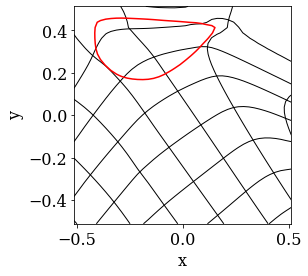

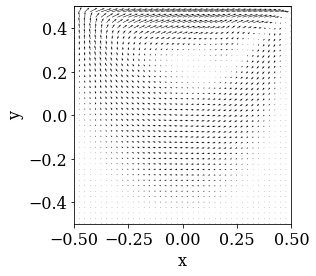

Level Set Advection Time:  0.004537820816040039
------------ Time = 4.400999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.867830830274724e-13
Total poisson time : 0.0003180503845214844
Total INS time : 0.003592252731323242
Max, Min, U   : 2.0, -0.1861120736763808
Max, Min, V   : 0.3656709663425439, -0.47265457977321756
Max, Min, P   : -22.51602311118013, -24.51562417012475
Max, Min, DIV : 3.7192471324942744e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004417896270751953
------------ Time = 4.401999999999805 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.540348046835517e-13
Total poisson time : 0.0002410411834716797
Total INS time : 0.0034940242767333984
Max, Min, U   : 2.0, -0.18609312631679797
Max, Min, V   : 0.3657734463845715, -0.47256315098749224
Max, Min, P   : -22.52285320517722, -24.522298001593644
Max, Min, DIV : 3.6637359812630166e-15, -3.573530360512223e-15


Level Set Advection Time:  0.005399465560913086
------------ Time = 4.423999999999812 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.705190495756092e-14
Total poisson time : 0.00021886825561523438
Total INS time : 0.0033490657806396484
Max, Min, U   : 2.0, -0.18567171152481063
Max, Min, V   : 0.3677116864047996, -0.47053190911534304
Max, Min, P   : -22.70666286033695, -24.70236803259525
Max, Min, DIV : 3.9968028886505635e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004231452941894531
------------ Time = 4.424999999999812 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9797186665610295e-13
Total poisson time : 0.00022649765014648438
Total INS time : 0.0033533573150634766
Max, Min, U   : 2.0, -0.1856523081974846
Max, Min, V   : 0.36778767990504213, -0.47043849991209535
Max, Min, P   : -22.71188534422524, -24.707404700504057
Max, Min, DIV : 3.9968028886505635e-15, -4.392319841173275

Level Set Advection Time:  0.004503726959228516
------------ Time = 4.44799999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.761228179380445e-13
Total poisson time : 0.0007843971252441406
Total INS time : 0.004827022552490234
Max, Min, U   : 2.0, -0.18519870391391594
Max, Min, V   : 0.369328371829982, -0.4686203294847483
Max, Min, P   : -22.826272464691492, -24.81787312228557
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004276752471923828
------------ Time = 4.44899999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1764807105093737e-14
Total poisson time : 0.0002238750457763672
Total INS time : 0.0034050941467285156
Max, Min, U   : 2.0, -0.18517906319331548
Max, Min, V   : 0.36938576374797605, -0.46853356239962496
Max, Min, P   : -22.827011040422093, -24.818331469445518
Max, Min, DIV : 3.9968028886505635e-15, -4.440892098500626e-15


Level Set Advection Time:  0.004242658615112305
------------ Time = 4.471999999999828 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.128576606963186e-13
Total poisson time : 0.0007114410400390625
Total INS time : 0.003952503204345703
Max, Min, U   : 2.0, -0.18472747167058481
Max, Min, V   : 0.3704843568821066, -0.46633779608905146
Max, Min, P   : -22.94144998551489, -24.927172274012978
Max, Min, DIV : 3.774758283725532e-15, -4.218847493575595e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042684078216552734
------------ Time = 4.4729999999998284 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.102535421503437e-13
Total poisson time : 0.00022101402282714844
Total INS time : 0.0035223960876464844
Max, Min, U   : 2.0, -0.18470773168236576
Max, Min, V   : 0.37052277262904476, -0.46623482777088016
Max, Min, P   : -22.931142151586563, -24.916645804571452
Max, Min, DIV : 4.3021142204224816e-15, -4.10782519111307

Level Set Advection Time:  0.00494837760925293
------------ Time = 4.495999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6833325426438754e-13
Total poisson time : 0.00021886825561523438
Total INS time : 0.0033674240112304688
Max, Min, U   : 2.0, -0.18418598737473613
Max, Min, V   : 0.37132601507822877, -0.4637573656936968
Max, Min, P   : -22.907088204857956, -24.889408517805155
Max, Min, DIV : 3.9968028886505635e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042493343353271484
------------ Time = 4.4969999999998365 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.305434767673609e-13
Total poisson time : 0.00022482872009277344
Total INS time : 0.0034253597259521484
Max, Min, U   : 2.0, -0.1841624246210761
Max, Min, V   : 0.3713462391762139, -0.46365251301722576
Max, Min, P   : -22.923613121017237, -24.90588913083486
Max, Min, DIV : 3.885780586188048e-15, -3.8857805861880

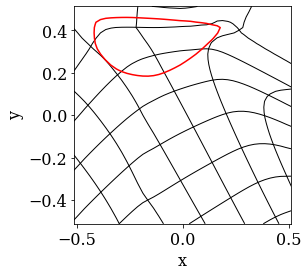

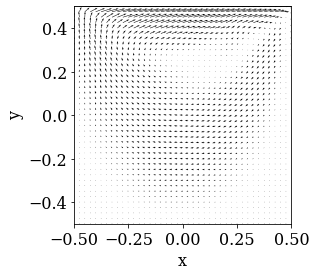

Level Set Advection Time:  0.004487514495849609
------------ Time = 4.500999999999838 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.619599369714046e-13
Total poisson time : 0.0003063678741455078
Total INS time : 0.003548860549926758
Max, Min, U   : 2.0, -0.1840685551900088
Max, Min, V   : 0.3714281135047214, -0.4632330886741625
Max, Min, P   : -22.924450508041094, -24.906344006072818
Max, Min, DIV : 3.913536161803677e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004450321197509766
------------ Time = 4.501999999999838 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.444011507934883e-13
Total poisson time : 0.00023984909057617188
Total INS time : 0.003924131393432617
Max, Min, U   : 2.0, -0.18404516124439133
Max, Min, V   : 0.3714482616898954, -0.4631282721286166
Max, Min, P   : -22.94199139697741, -24.923739738880457
Max, Min, DIV : 4.107825191113079e-15, -3.552713678800501e-15
Qi

Level Set Advection Time:  0.004253864288330078
------------ Time = 4.524999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.667311725752463e-13
Total poisson time : 0.000225067138671875
Total INS time : 0.003968715667724609
Max, Min, U   : 2.0, -0.18350726325102315
Max, Min, V   : 0.3712116422119142, -0.46071895969325355
Max, Min, P   : -23.140175045654104, -25.117748366792025
Max, Min, DIV : 4.052314039881821e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.00428318977355957
------------ Time = 4.525999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.768678949323037e-15
Total poisson time : 0.00022339820861816406
Total INS time : 0.0032494068145751953
Max, Min, U   : 2.0, -0.18348397578097325
Max, Min, V   : 0.37118518983761534, -0.46061377799279835
Max, Min, P   : -23.140415568153873, -25.117718742383925
Max, Min, DIV : 3.937822290467352e-15, -4.191091917959966e-1

Level Set Advection Time:  0.004981279373168945
------------ Time = 4.5479999999998535 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.970592767746754e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.003693103790283203
Max, Min, U   : 2.0, -0.18298603667129176
Max, Min, V   : 0.3704527942400091, -0.45853820220853586
Max, Min, P   : -23.236194615937453, -25.211581041055894
Max, Min, DIV : 4.274358644806853e-15, -3.989863994746656e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004306793212890625
------------ Time = 4.548999999999854 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4381849042643245e-13
Total poisson time : 0.0002300739288330078
Total INS time : 0.0033032894134521484
Max, Min, U   : 2.0, -0.1829632586944964
Max, Min, V   : 0.37042529506439625, -0.4584573462485842
Max, Min, P   : -23.24035414405338, -25.21534710080388
Max, Min, DIV : 4.218847493575595e-15, -3.747002708109903e-1

Level Set Advection Time:  0.004332304000854492
------------ Time = 4.5719999999998615 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.382915998569645e-13
Total poisson time : 0.0002334117889404297
Total INS time : 0.0038933753967285156
Max, Min, U   : 2.0, -0.18246557515596176
Max, Min, V   : 0.3695119244452035, -0.4562012627677687
Max, Min, P   : -23.372341287462643, -25.341132253330596
Max, Min, DIV : 3.552713678800501e-15, -3.9968028886505635e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004300355911254883
------------ Time = 4.572999999999862 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.456680456606305e-14
Total poisson time : 0.00022673606872558594
Total INS time : 0.003335714340209961
Max, Min, U   : 2.0, -0.18244659767600013
Max, Min, V   : 0.36945762723073255, -0.4560902035386177
Max, Min, P   : -23.37130832221962, -25.33984339546752
Max, Min, DIV : 3.774758283725532e-15, -4.440892098500626e-1

Level Set Advection Time:  0.0043790340423583984
------------ Time = 4.5959999999998695 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.227859640325858e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.0042994022369384766
Max, Min, U   : 2.0, -0.18200578950543092
Max, Min, V   : 0.36794108224868777, -0.4533641156478249
Max, Min, P   : -23.383254745364706, -25.34662942953207
Max, Min, DIV : 3.552713678800501e-15, -3.3306690738754696e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004299163818359375
------------ Time = 4.59699999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6589673606507786e-13
Total poisson time : 0.00022482872009277344
Total INS time : 0.003450632095336914
Max, Min, U   : 2.0, -0.18198666576392813
Max, Min, V   : 0.3678733935160947, -0.4532384799519477
Max, Min, P   : -23.375974858407808, -25.339202833118815
Max, Min, DIV : 3.747002708109903e-15, -4.163336342344337

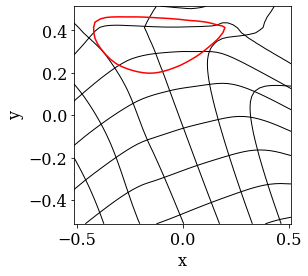

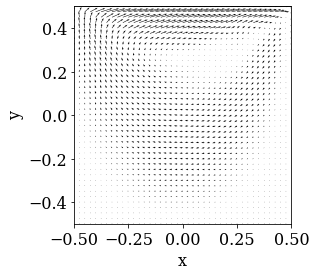

Level Set Advection Time:  0.004460334777832031
------------ Time = 4.600999999999871 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.551780862152951e-13
Total poisson time : 0.0003082752227783203
Total INS time : 0.0035429000854492188
Max, Min, U   : 2.0, -0.1819101658256849
Max, Min, V   : 0.3676076623913681, -0.45273096833677967
Max, Min, P   : -23.372718180451965, -25.335431922244453
Max, Min, DIV : 3.6637359812630166e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004403591156005859
------------ Time = 4.6019999999998715 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.637712337404996e-13
Total poisson time : 0.00023984909057617188
Total INS time : 0.003524303436279297
Max, Min, U   : 2.0, -0.18189103492739642
Max, Min, V   : 0.36754238700101816, -0.4526030202876511
Max, Min, P   : -23.377396308500472, -25.339997982120174
Max, Min, DIV : 3.885780586188048e-15, -3.608224830031759e

Level Set Advection Time:  0.004879474639892578
------------ Time = 4.623999999999879 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.926695602099942e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.003449678421020508
Max, Min, U   : 2.0, -0.18146093848584063
Max, Min, V   : 0.36527062562055657, -0.4500154343598635
Max, Min, P   : -23.48179397333054, -25.44369327586619
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004292964935302734
------------ Time = 4.624999999999879 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1768829368018945e-13
Total poisson time : 0.00022792816162109375
Total INS time : 0.0034444332122802734
Max, Min, U   : 2.0, -0.1814412348445119
Max, Min, V   : 0.3651703129806972, -0.4498980404171842
Max, Min, P   : -23.485152794776663, -25.446999240677947
Max, Min, DIV : 3.774758283725532e-15, -3.1086244689504383e-15

Level Set Advection Time:  0.004355907440185547
------------ Time = 4.6469999999998866 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.463955375492699e-13
Total poisson time : 0.00023221969604492188
Total INS time : 0.0040628910064697266
Max, Min, U   : 2.0, -0.18102563288833975
Max, Min, V   : 0.36319689098994035, -0.44716706488049224
Max, Min, P   : -23.436715343736957, -25.396597348151303
Max, Min, DIV : 3.608224830031759e-15, -3.747002708109903e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043544769287109375
------------ Time = 4.647999999999887 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1312768149452798e-12
Total poisson time : 0.0002334117889404297
Total INS time : 0.0033440589904785156
Max, Min, U   : 2.0, -0.18100671083162873
Max, Min, V   : 0.3631166757492008, -0.44704252966961167
Max, Min, P   : -23.46764352274734, -25.42752964222547
Max, Min, DIV : 4.440892098500626e-15, -3.40005801291454

Level Set Advection Time:  0.004919767379760742
------------ Time = 4.669999999999894 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0827927838834576e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.003788471221923828
Max, Min, U   : 2.0, -0.18058700697510902
Max, Min, V   : 0.361383082500649, -0.445215693160155
Max, Min, P   : -23.62255243253053, -25.583116331058115
Max, Min, DIV : 4.107825191113079e-15, -4.274358644806853e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004354953765869141
------------ Time = 4.670999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.805276635144027e-13
Total poisson time : 0.00022912025451660156
Total INS time : 0.0033864974975585938
Max, Min, U   : 2.0, -0.18056748168077175
Max, Min, V   : 0.36130842621282006, -0.4451726168321941
Max, Min, P   : -23.60968346119786, -25.570292571176875
Max, Min, DIV : 3.885780586188048e-15, -2.886579864025407e-15


Level Set Advection Time:  0.0048961639404296875
------------ Time = 4.692999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6040889814919246e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.0036628246307373047
Max, Min, U   : 2.0, -0.18015140674196653
Max, Min, V   : 0.35964051312136003, -0.4446146733217283
Max, Min, P   : -23.68141424873007, -25.641217126280885
Max, Min, DIV : 3.774758283725532e-15, -2.7755575615628914e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043642520904541016
------------ Time = 4.693999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.44003555448931e-13
Total poisson time : 0.0002281665802001953
Total INS time : 0.003384113311767578
Max, Min, U   : 2.0, -0.18013220990231077
Max, Min, V   : 0.35954670082145185, -0.4445797574723803
Max, Min, P   : -23.664860841556802, -25.625140849468213
Max, Min, DIV : 3.3306690738754696e-15, -3.55271367880050

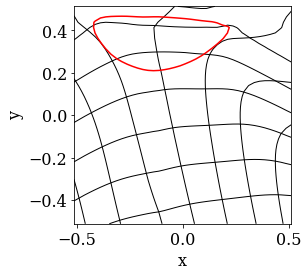

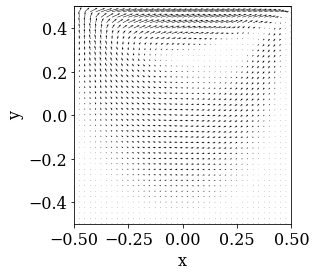

Level Set Advection Time:  0.004440784454345703
------------ Time = 4.700999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5694872971481307e-13
Total poisson time : 0.00030517578125
Total INS time : 0.0035228729248046875
Max, Min, U   : 2.0, -0.1799967217028663
Max, Min, V   : 0.35878993083417704, -0.4443118778300801
Max, Min, P   : -23.696960925331112, -25.653181551328235
Max, Min, DIV : 3.677613769070831e-15, -3.1363800445660672e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.005957365036010742
------------ Time = 4.701999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.252429290962924e-13
Total poisson time : 0.0004093647003173828
Total INS time : 0.0056629180908203125
Max, Min, U   : 2.0, -0.17997873223381233
Max, Min, V   : 0.35868386116987194, -0.44427030236824805
Max, Min, P   : -23.702939267749382, -25.65906607819047
Max, Min, DIV : 3.608224830031759e-15, -4.08006961549745e-15
Qi

Level Set Advection Time:  0.0049974918365478516
------------ Time = 4.722999999999912 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.104285007423882e-13
Total poisson time : 0.00023412704467773438
Total INS time : 0.003400087356567383
Max, Min, U   : 2.0, -0.17959656142962538
Max, Min, V   : 0.3566524322552558, -0.44324159849615324
Max, Min, P   : -23.675306607764657, -25.631515910168474
Max, Min, DIV : 3.6637359812630166e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004424571990966797
------------ Time = 4.723999999999912 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.098520890008989e-13
Total poisson time : 0.0002295970916748047
Total INS time : 0.003428220748901367
Max, Min, U   : 2.0, -0.17957831170542468
Max, Min, V   : 0.3565694535087246, -0.4431933425788502
Max, Min, P   : -23.694667169153828, -25.650915037871503
Max, Min, DIV : 4.3021142204224816e-15, -4.343747583845925e

Level Set Advection Time:  0.0043222904205322266
------------ Time = 4.74599999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.995410141309028e-13
Total poisson time : 0.00023102760314941406
Total INS time : 0.004228115081787109
Max, Min, U   : 2.0, -0.1791786807923675
Max, Min, V   : 0.3548338656053834, -0.44209693230935093
Max, Min, P   : -23.64721287562205, -25.604635900451086
Max, Min, DIV : 3.164135620181696e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004396677017211914
------------ Time = 4.74699999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3434432571949202e-12
Total poisson time : 0.0002295970916748047
Total INS time : 0.0033311843872070312
Max, Min, U   : 2.0, -0.17916073120557044
Max, Min, V   : 0.3547471099383595, -0.4420460131864154
Max, Min, P   : -23.609086110679073, -25.56693225379591
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15


Max, Min, V   : 0.3526612243816809, -0.44092099744087765
Max, Min, P   : -23.67382842788958, -25.635787006436768
Max, Min, DIV : 3.469446951953614e-15, -3.774758283725532e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004388093948364258
------------ Time = 4.769999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.386221014093674e-13
Total poisson time : 0.00023365020751953125
Total INS time : 0.004022836685180664
Max, Min, U   : 2.0, -0.17875028748137023
Max, Min, V   : 0.3525904037599221, -0.44087039990404475
Max, Min, P   : -23.648645712088133, -25.610676088754644
Max, Min, DIV : 3.8719027983802334e-15, -3.191891195797325e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004383563995361328
------------ Time = 4.770999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.68216621802991e-13
Total poisson time : 0.00023818016052246094
Total INS time : 0.0034971237182617188
Max, Min, U 

Final poisson residual : 1.0773369947309583e-13
Total poisson time : 0.00022649765014648438
Total INS time : 0.0034742355346679688
Max, Min, U   : 2.0, -0.17835663952672676
Max, Min, V   : 0.3513948720886858, -0.43982393793824975
Max, Min, P   : -23.53435475137268, -25.497756825327272
Max, Min, DIV : 3.2578106878844437e-15, -4.440892098500626e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043752193450927734
------------ Time = 4.792999999999935 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4271025010035073e-13
Total poisson time : 0.00022935867309570312
Total INS time : 0.004042148590087891
Max, Min, U   : 2.0, -0.17833867878338097
Max, Min, V   : 0.3513495734503421, -0.4397806865026487
Max, Min, P   : -23.524850688880885, -25.48829759097858
Max, Min, DIV : 3.802513859341161e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004354715347290039
------------ Time = 4.793999999999936 ---------------
Number 

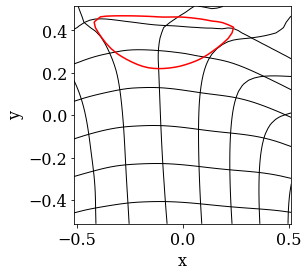

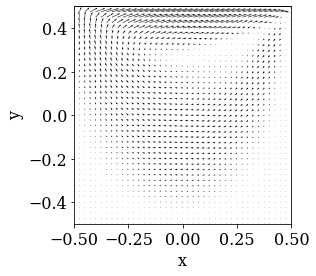

Level Set Advection Time:  0.004450559616088867
------------ Time = 4.800999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2275802750650675e-13
Total poisson time : 0.0003037452697753906
Total INS time : 0.0035812854766845703
Max, Min, U   : 2.0, -0.1781941278056264
Max, Min, V   : 0.35102558309730914, -0.4394502621557905
Max, Min, P   : -23.52672736037016, -25.49029461109823
Max, Min, DIV : 3.552713678800501e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0044476985931396484
------------ Time = 4.801999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.824387692524123e-14
Total poisson time : 0.0002605915069580078
Total INS time : 0.003566265106201172
Max, Min, U   : 2.0, -0.17817601438094968
Max, Min, V   : 0.35098963804062033, -0.43941102002709426
Max, Min, P   : -23.52517700483043, -25.488757162468417
Max, Min, DIV : 3.1086244689504383e-15, -4.274358644806853e-1

Level Set Advection Time:  0.004294872283935547
------------ Time = 4.822999999999945 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.240750940518916e-14
Total poisson time : 0.00023221969604492188
Total INS time : 0.0045130252838134766
Max, Min, U   : 2.0, -0.1778001282812555
Max, Min, V   : 0.3506235504714125, -0.43876928119220276
Max, Min, P   : -23.490916640238503, -25.450377244307695
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041964054107666016
------------ Time = 4.823999999999946 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.470478327867469e-15
Total poisson time : 0.00025177001953125
Total INS time : 0.00417017936706543
Max, Min, U   : 2.0, -0.17778268282604903
Max, Min, V   : 0.3506339446670092, -0.43874098789916927
Max, Min, P   : -23.491187168990983, -25.450410001315287
Max, Min, DIV : 3.9968028886505635e-15, -4.440892098500626e-1

Level Set Advection Time:  0.004203319549560547
------------ Time = 4.846999999999953 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6991879093678394e-13
Total poisson time : 0.00028443336486816406
Total INS time : 0.003993511199951172
Max, Min, U   : 2.0, -0.17738147871267898
Max, Min, V   : 0.35103204532429405, -0.43793782089202105
Max, Min, P   : -23.478618611008553, -25.431750606977126
Max, Min, DIV : 4.107825191113079e-15, -3.9794556538907955e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004189491271972656
------------ Time = 4.847999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.842060473632806e-13
Total poisson time : 0.0002269744873046875
Total INS time : 0.0036220550537109375
Max, Min, U   : 2.0, -0.1773641109604636
Max, Min, V   : 0.35104888705171317, -0.4378964414698292
Max, Min, P   : -23.454996621055972, -25.407932142458197
Max, Min, DIV : 4.107825191113079e-15, -3.885780586188048

Level Set Advection Time:  0.004209756851196289
------------ Time = 4.870999999999961 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.51316279593956e-13
Total poisson time : 0.00022482872009277344
Total INS time : 0.004483938217163086
Max, Min, U   : 2.0, -0.17696584431524764
Max, Min, V   : 0.3514081238444111, -0.436938450217043
Max, Min, P   : -23.387342650888005, -25.33722659788628
Max, Min, DIV : 4.107825191113079e-15, -3.7192471324942744e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004228353500366211
------------ Time = 4.871999999999962 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.307234660628164e-13
Total poisson time : 0.00022339820861816406
Total INS time : 0.0032362937927246094
Max, Min, U   : 2.0, -0.17694872771506864
Max, Min, V   : 0.35142203654174936, -0.436896924185977
Max, Min, P   : -23.401410191398707, -25.35113070783512
Max, Min, DIV : 3.7192471324942744e-15, -3.774758283725532e-15


Level Set Advection Time:  0.004219532012939453
------------ Time = 4.894999999999969 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.872301719814234e-13
Total poisson time : 0.00022125244140625
Total INS time : 0.003682851791381836
Max, Min, U   : 2.0, -0.17655899232983424
Max, Min, V   : 0.35180547484353714, -0.4359190561491248
Max, Min, P   : -23.39880412661668, -25.34407440444471
Max, Min, DIV : 3.4416913763379853e-15, -3.802513859341161e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0042726993560791016
------------ Time = 4.89599999999997 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.62794126352724e-13
Total poisson time : 0.00022864341735839844
Total INS time : 0.0040056705474853516
Max, Min, U   : 2.0, -0.17654272124412881
Max, Min, V   : 0.35192446491693197, -0.4358753344010084
Max, Min, P   : -23.380689609850172, -25.325695062261087
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15
Q

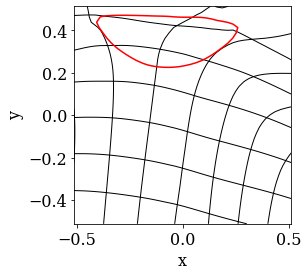

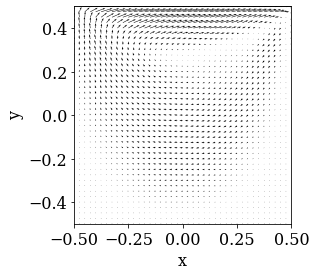

Level Set Advection Time:  0.004408121109008789
------------ Time = 4.900999999999971 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.720187704730871e-13
Total poisson time : 0.0003142356872558594
Total INS time : 0.003518342971801758
Max, Min, U   : 2.0, -0.17646224896165397
Max, Min, V   : 0.352503398169095, -0.43565538481893035
Max, Min, P   : -23.359606388143952, -25.303009625238428
Max, Min, DIV : 4.163336342344337e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0043506622314453125
------------ Time = 4.901999999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.123145609561122e-13
Total poisson time : 0.0002601146697998047
Total INS time : 0.003965616226196289
Max, Min, U   : 2.0, -0.1764463493799567
Max, Min, V   : 0.3526161296961065, -0.43561127346902745
Max, Min, P   : -23.35429110353078, -25.297381133772536
Max, Min, DIV : 3.4416913763379853e-15, -3.9968028886505635e-15

Level Set Advection Time:  0.004861354827880859
------------ Time = 4.924999999999979 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.841257738387348e-13
Total poisson time : 0.0002243518829345703
Total INS time : 0.003955364227294922
Max, Min, U   : 2.0, -0.17609719983273223
Max, Min, V   : 0.3549924950224068, -0.4345942010098185
Max, Min, P   : -23.46386944343875, -25.39935193693124
Max, Min, DIV : 3.622102617839573e-15, -3.913536161803677e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.0041904449462890625
------------ Time = 4.92599999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1539706230869936e-13
Total poisson time : 0.00022649765014648438
Total INS time : 0.0036246776580810547
Max, Min, U   : 2.0, -0.17608277320607327
Max, Min, V   : 0.35508884104099486, -0.4345508177410147
Max, Min, P   : -23.455462598293447, -25.39060814380583
Max, Min, DIV : 3.9968028886505635e-15, -3.774758283725532e-15

Level Set Advection Time:  0.0048143863677978516
------------ Time = 4.948999999999987 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.922776726983144e-13
Total poisson time : 0.00022149085998535156
Total INS time : 0.003983736038208008
Max, Min, U   : 2.0, -0.1757680650487737
Max, Min, V   : 0.3573545792514289, -0.4336512699237003
Max, Min, P   : -23.528892974155184, -25.454716979659935
Max, Min, DIV : 3.941291737419306e-15, -3.885780586188048e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004152536392211914
------------ Time = 4.949999999999988 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0696069506065217e-12
Total poisson time : 0.0002269744873046875
Total INS time : 0.0034189224243164062
Max, Min, U   : 2.0, -0.17575502111963942
Max, Min, V   : 0.35746084556704, -0.4336221106934584
Max, Min, P   : -23.499740445895338, -25.425211054105592
Max, Min, DIV : 3.9968028886505635e-15, -4.107825191113079e-15

Level Set Advection Time:  0.0047719478607177734
------------ Time = 4.972999999999995 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.75986154377812e-13
Total poisson time : 0.00021958351135253906
Total INS time : 0.0034067630767822266
Max, Min, U   : 2.0, -0.17550537931552662
Max, Min, V   : 0.35966646510544525, -0.4327959283607991
Max, Min, P   : -23.46818210802075, -25.38623690474418
Max, Min, DIV : 3.9968028886505635e-15, -4.052314039881821e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004221916198730469
------------ Time = 4.973999999999996 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.132735579128605e-13
Total poisson time : 0.00022339820861816406
Total INS time : 0.003466367721557617
Max, Min, U   : 2.0, -0.17549509665481383
Max, Min, V   : 0.35974845658869425, -0.43275219430427186
Max, Min, P   : -23.454534591258486, -25.372253566308807
Max, Min, DIV : 3.1086244689504383e-15, -4.08006961549745e

Total INS time : 0.0034275054931640625
Max, Min, U   : 2.0, -0.17527625443083053
Max, Min, V   : 0.3615705574878526, -0.43160070544705237
Max, Min, P   : -23.373154408733477, -25.28152595662664
Max, Min, DIV : 3.774758283725532e-15, -3.6637359812630166e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004216909408569336
------------ Time = 4.998000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7043080411278545e-14
Total poisson time : 0.00022101402282714844
Total INS time : 0.0039255619049072266
Max, Min, U   : 2.0, -0.17526759605580688
Max, Min, V   : 0.36164745194904946, -0.43154390124788156
Max, Min, P   : -23.3725419096253, -25.280511418613013
Max, Min, DIV : 3.6637359812630166e-15, -3.552713678800501e-15
Qin, Qout     : 0.0, 0.0


Level Set Advection Time:  0.004239559173583984
------------ Time = 4.999000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.929431014486898e-14
Total poiss

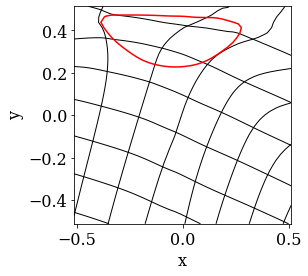

In [4]:
while scalars.time <= scalars.tmax:
    
    ins.advance()
    
    imbound.advect()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Advection Time: ",imbound._advection_time)
        flowx.io.display_stats(scalars) 
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_vector(gridx,gridy,'velc')
        flowx.io.plot_contour_zero(gridc, scalars, 'ibmf', 'ibmx', 'ibmy')


    scalars.advance()

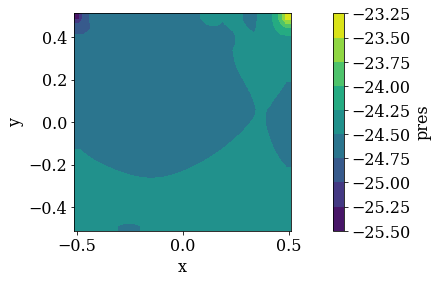

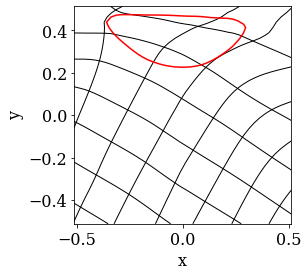

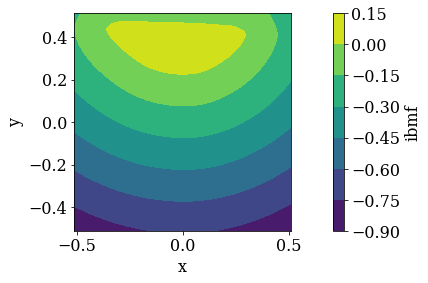

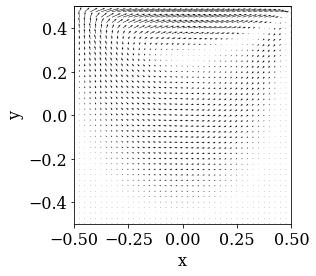

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour_zero(gridc, scalars, 'ibmf', 'ibmx', 'ibmy')
flowx.io.plot_contour(gridc, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')